In [19]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import logging
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import re

train_path = "C://Users//gugap//Downloads//archive (3)//Genre Classification Dataset//train_data.txt"

In [20]:
movies=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])

test_path="C://Users//gugap//Downloads//archive (3)//Genre Classification Dataset//test_data_solution.txt"
movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])

C:\Users\gugap\AppData\Local\Temp\ipykernel_23164\3158489772.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])
C:\Users\gugap\AppData\Local\Temp\ipykernel_23164\3158489772.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])


In [21]:
movies.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


There are movies of 27 genres in the database
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64


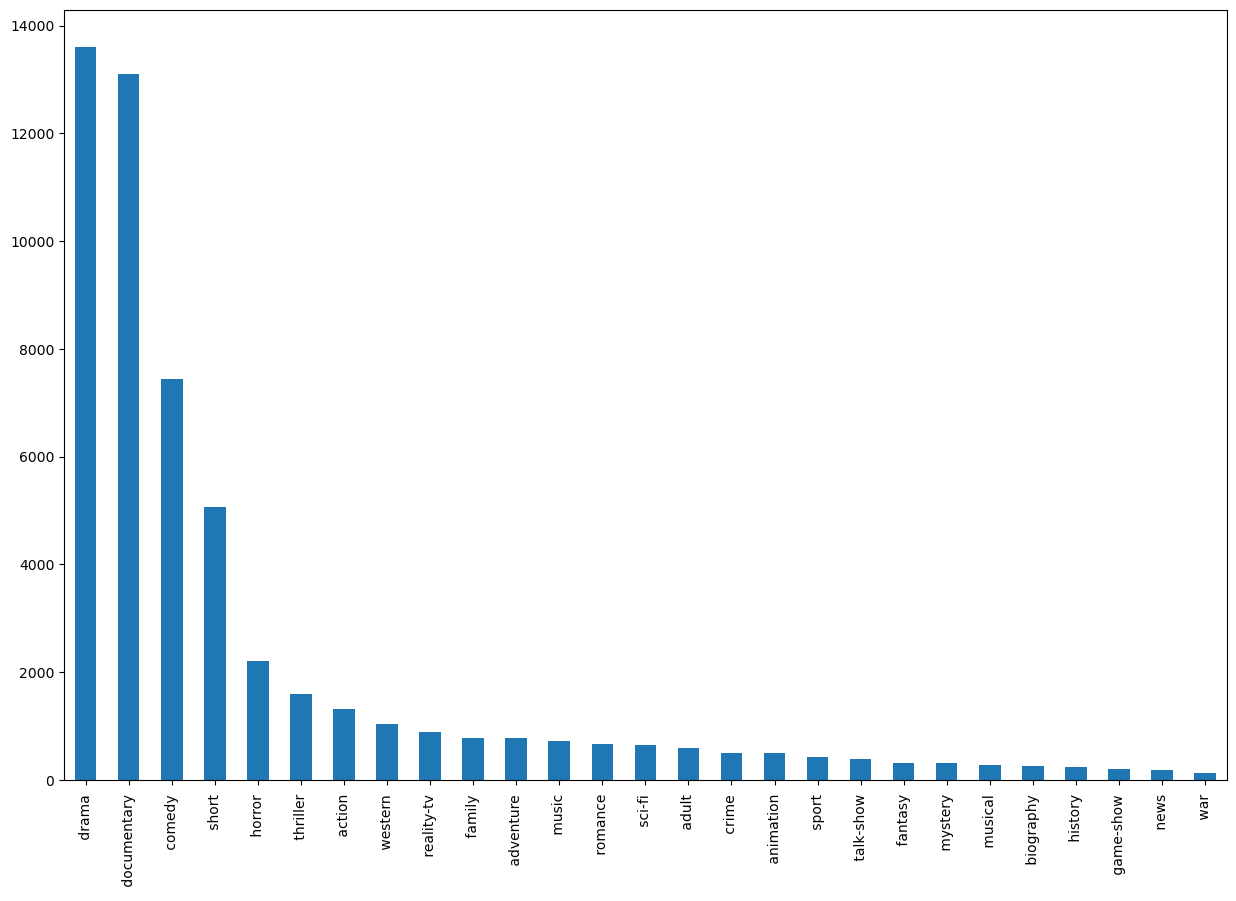

In [22]:
print("There are movies of {} genres in the database".format(movies.loc[:,"genre"].nunique()))
plt.figure(figsize=(15,10))
movies.loc[:,"genre"].value_counts().plot.bar()
print(movies.genre.value_counts())

In [23]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) 
    text = symbols.sub('', text)  
    text = re.sub(r'[0-9]+','',text) #delete one or more digit ocurrences
    text = ' '.join(word for word in text.split() if word not in stopwords) # delete stopwords from text
    return text

In [24]:
movies['description'].apply(lambda x: len(x.split(' '))).sum()

5578969

In [25]:
movies['description'] = movies['description'].apply(clean_text)

In [26]:
movies['description'].apply(lambda x: len(x.split(' '))).sum()

3085742

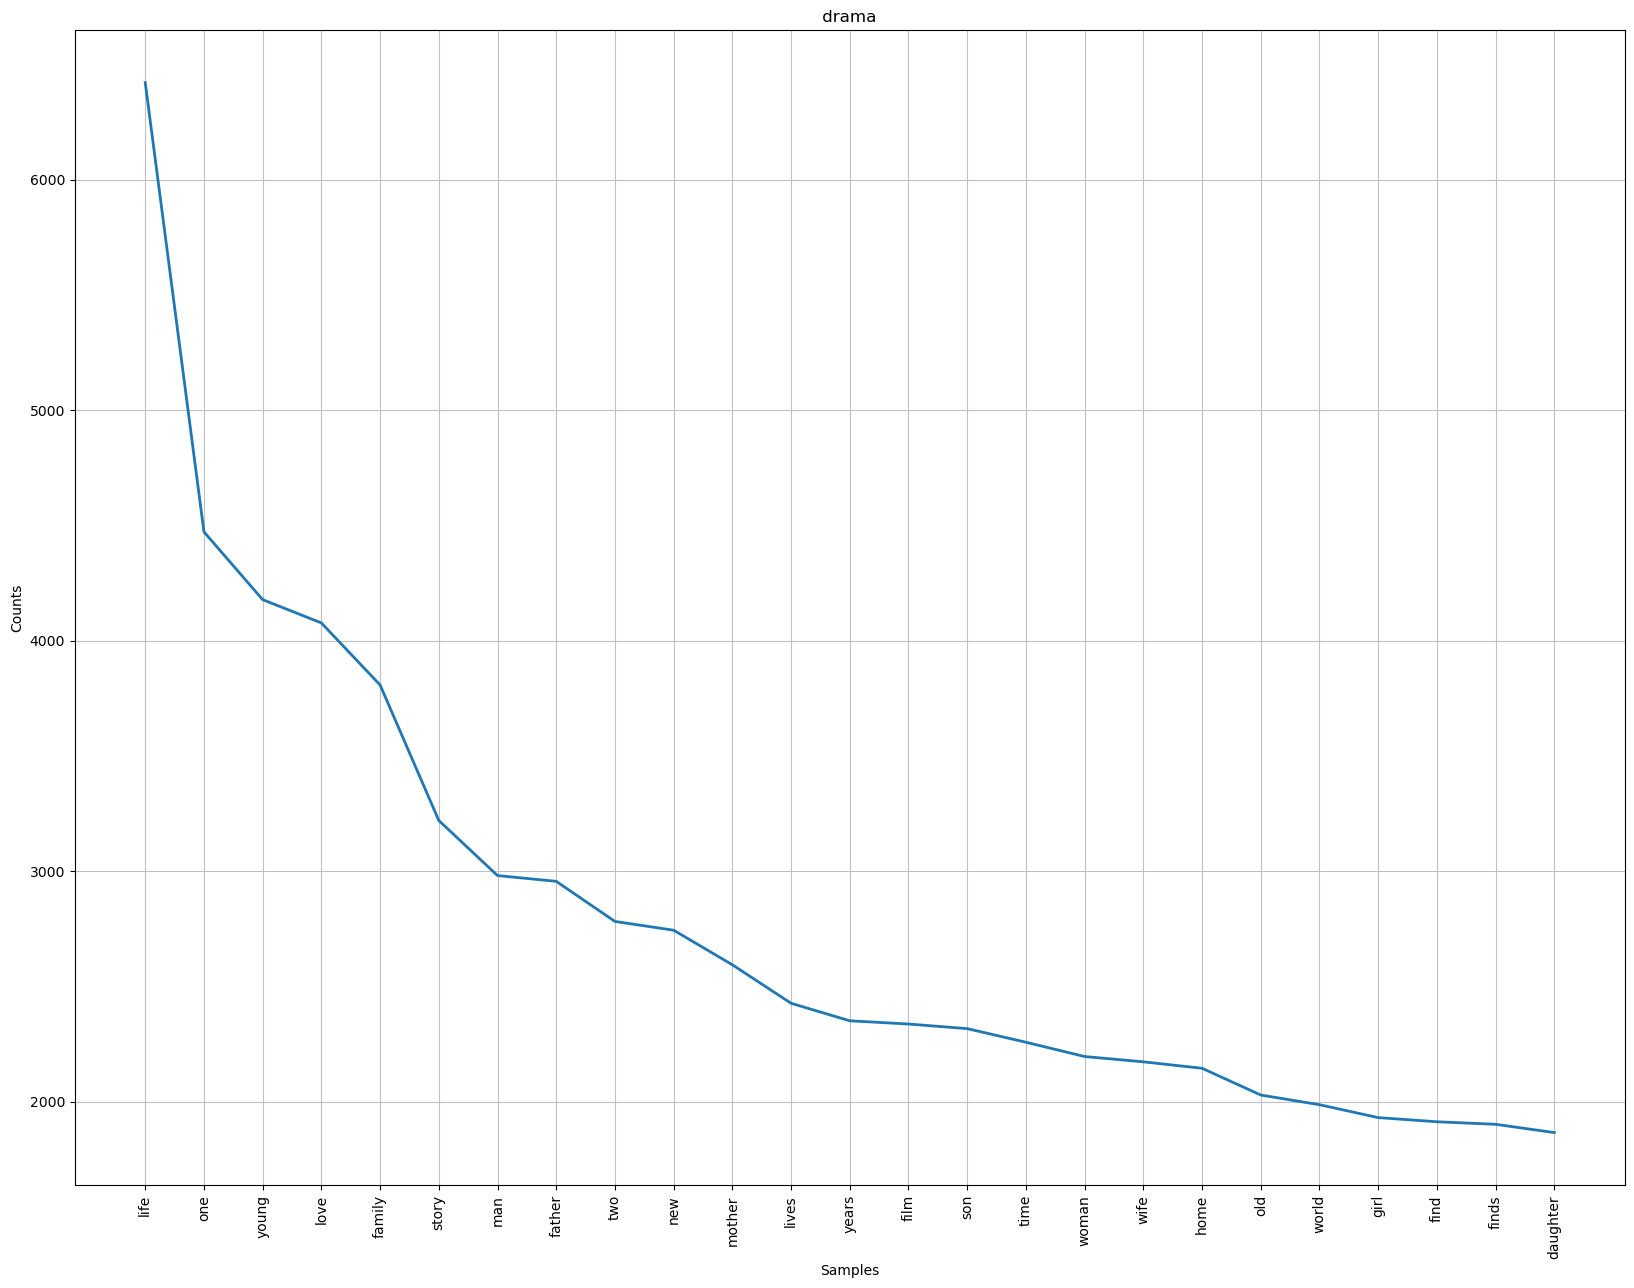

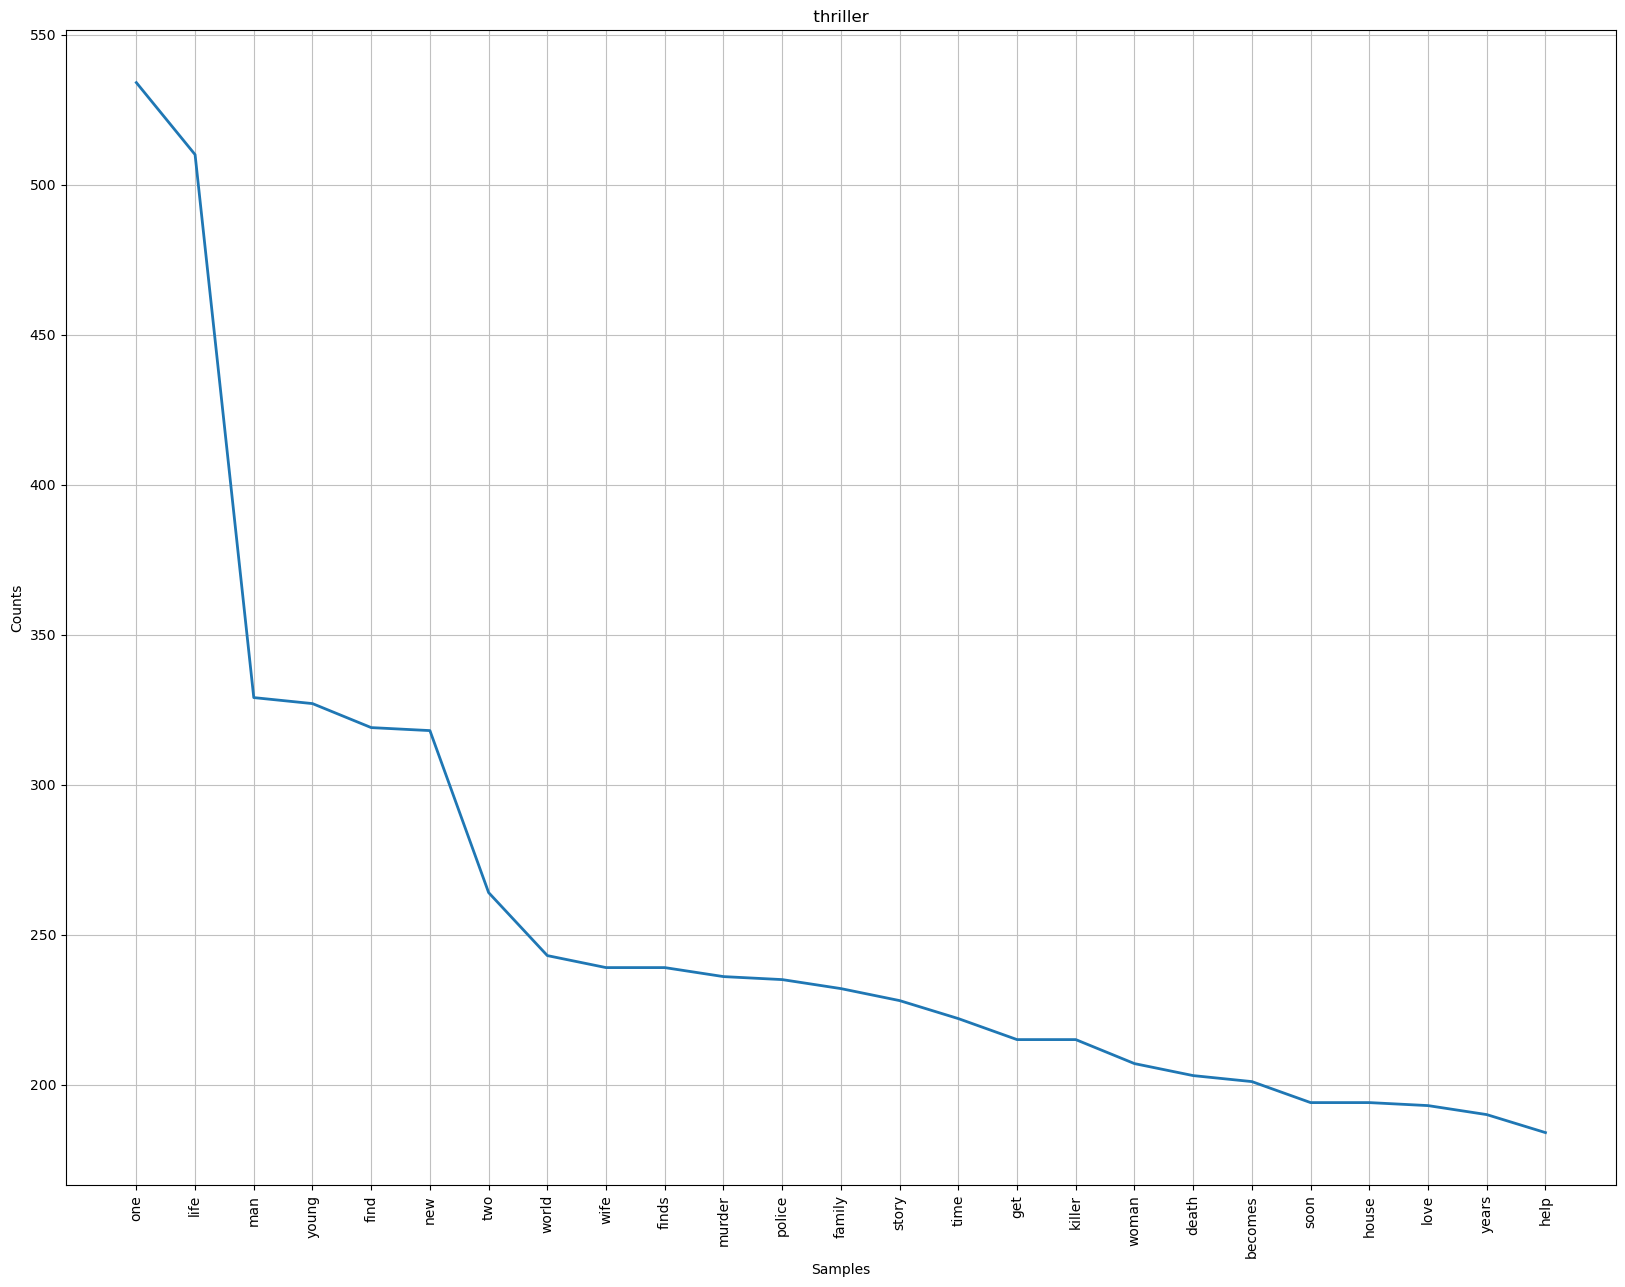

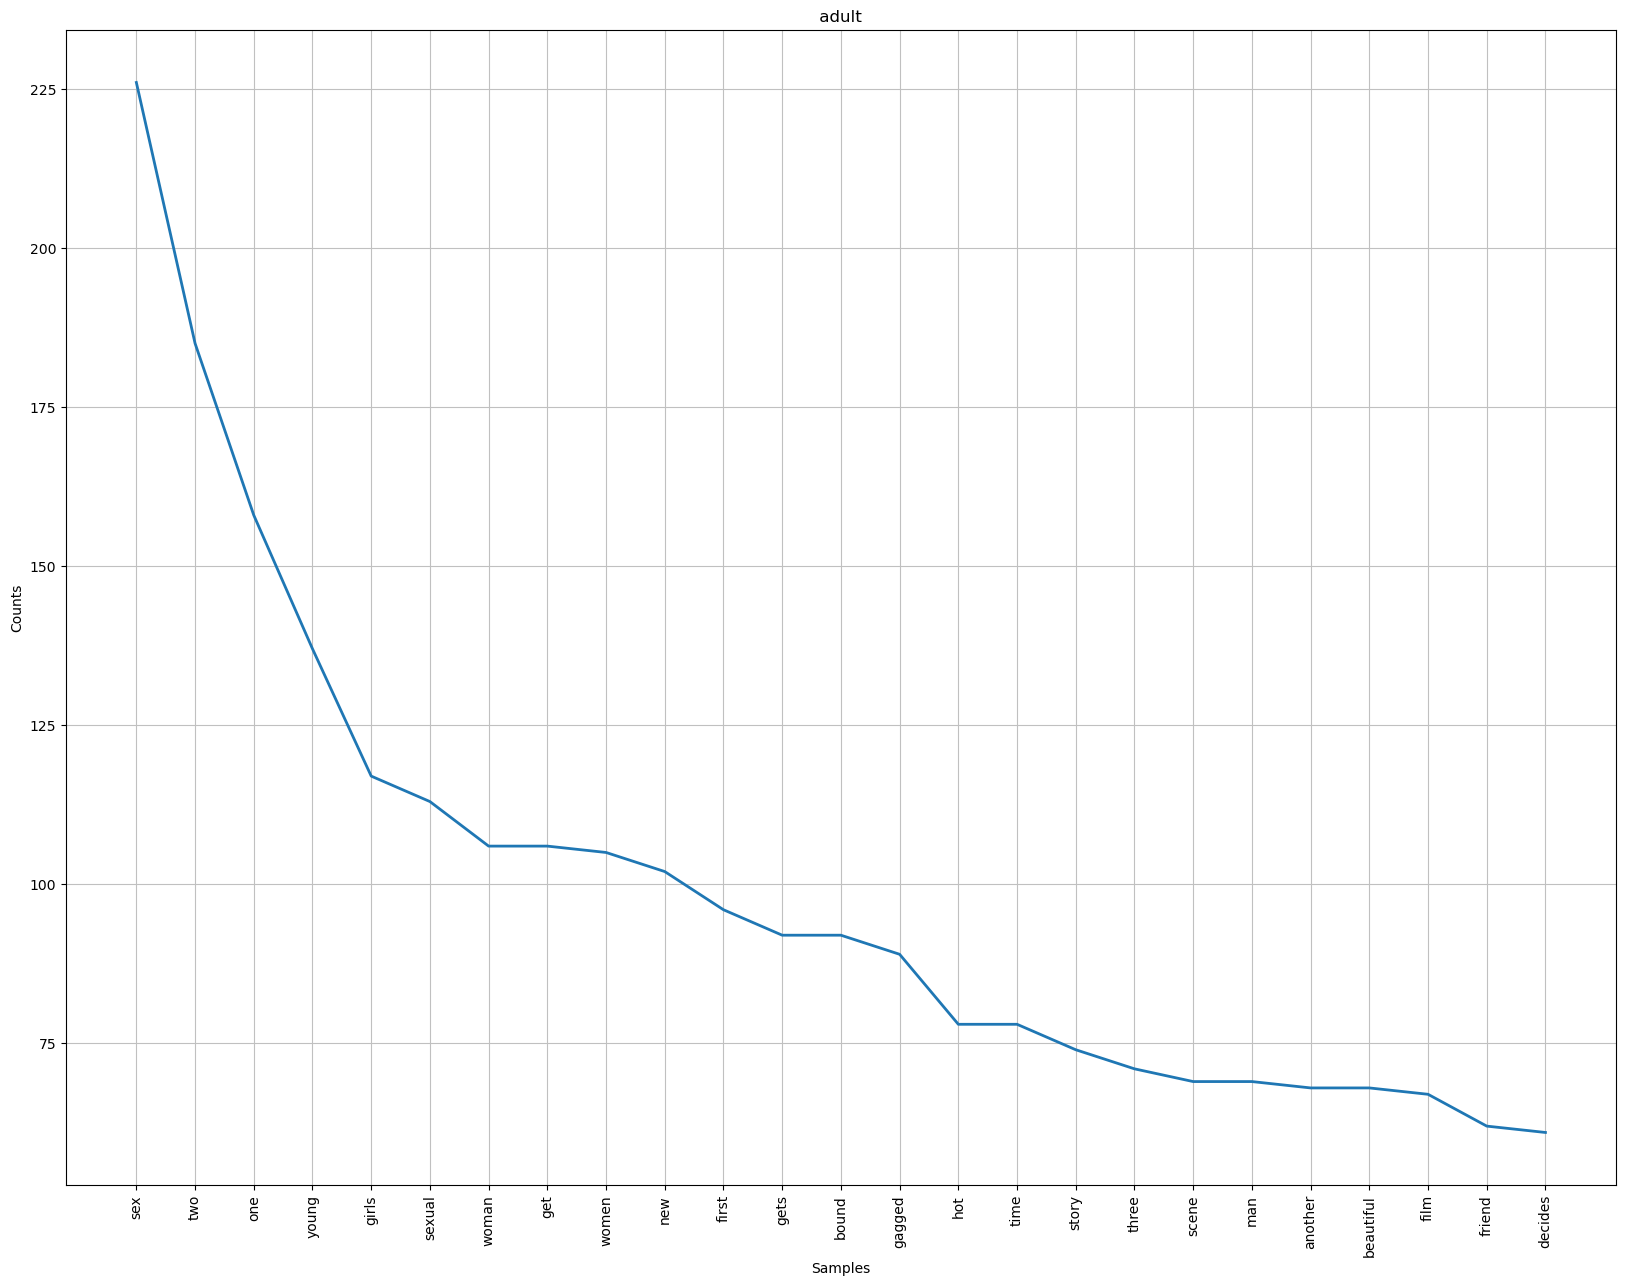

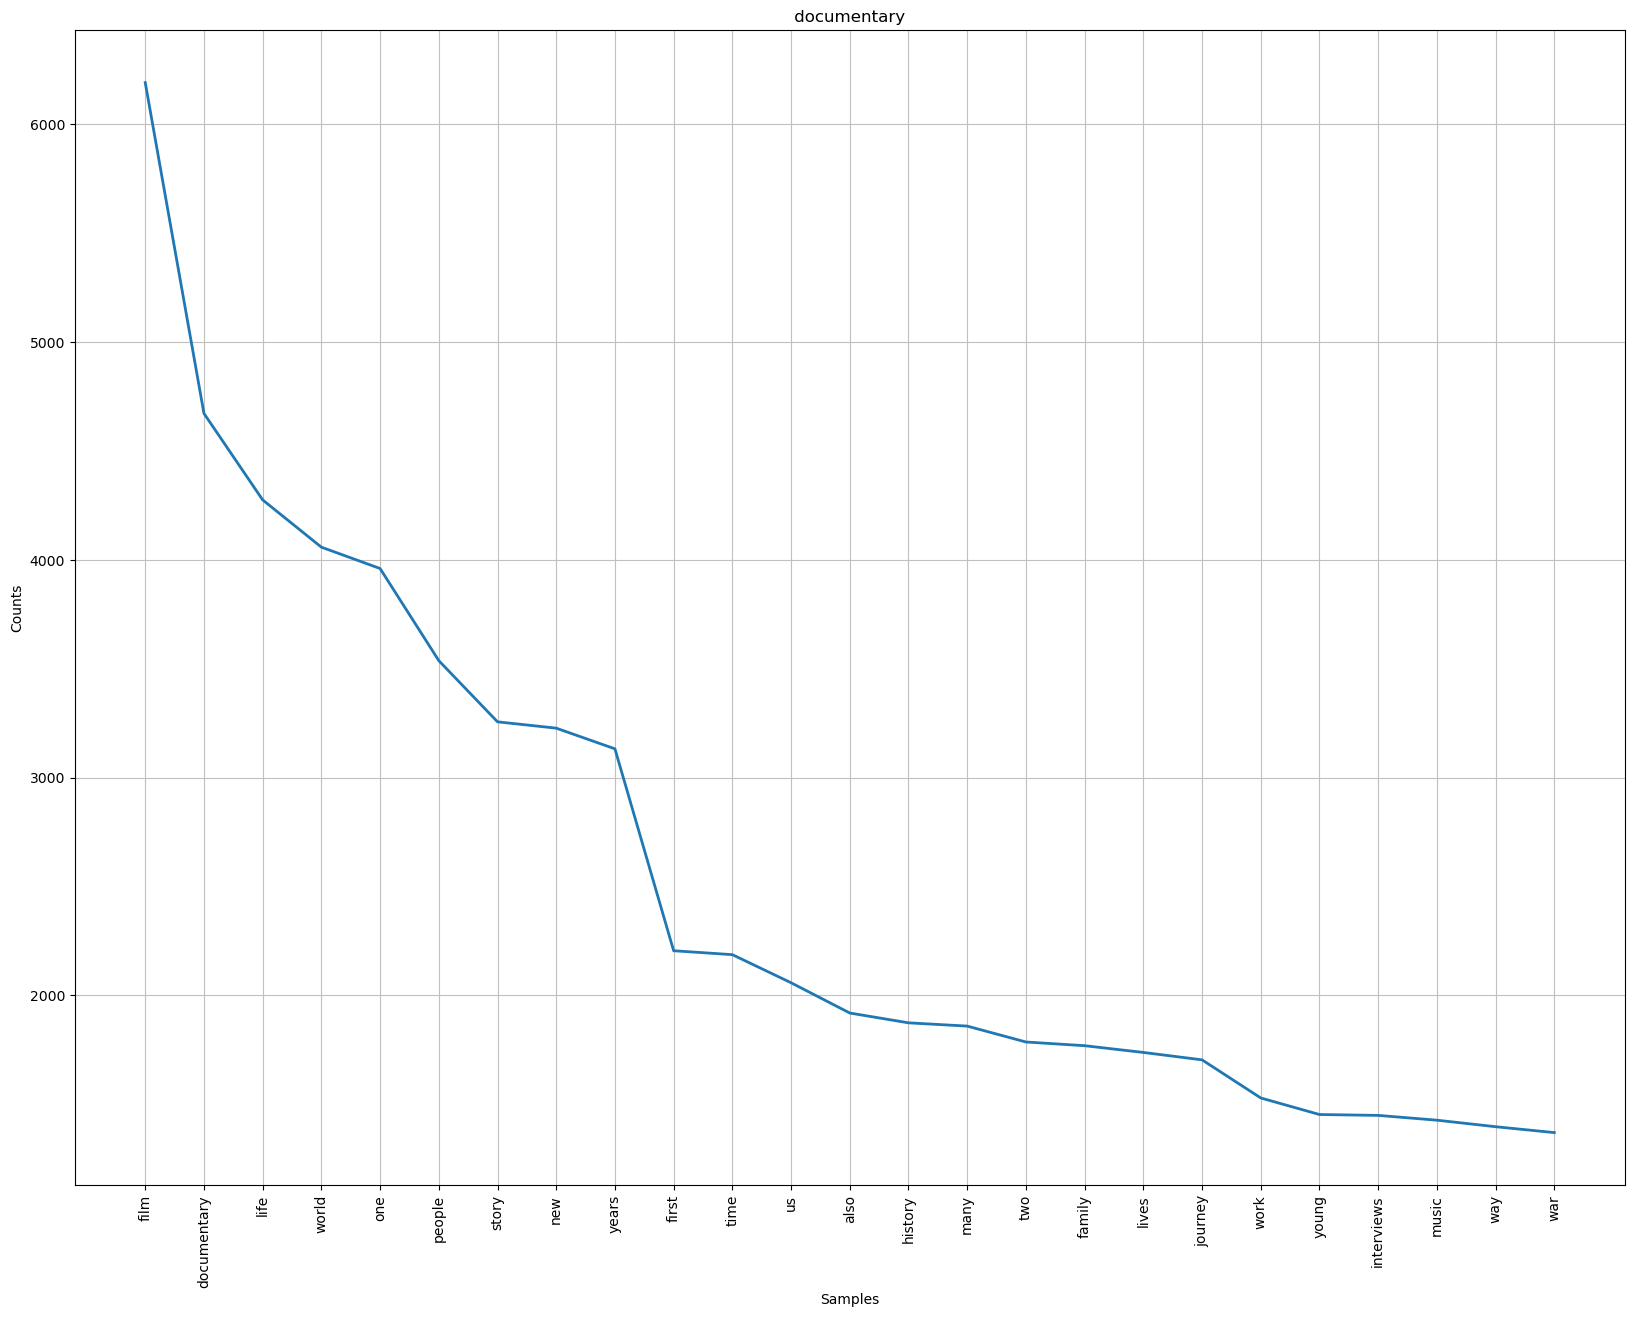

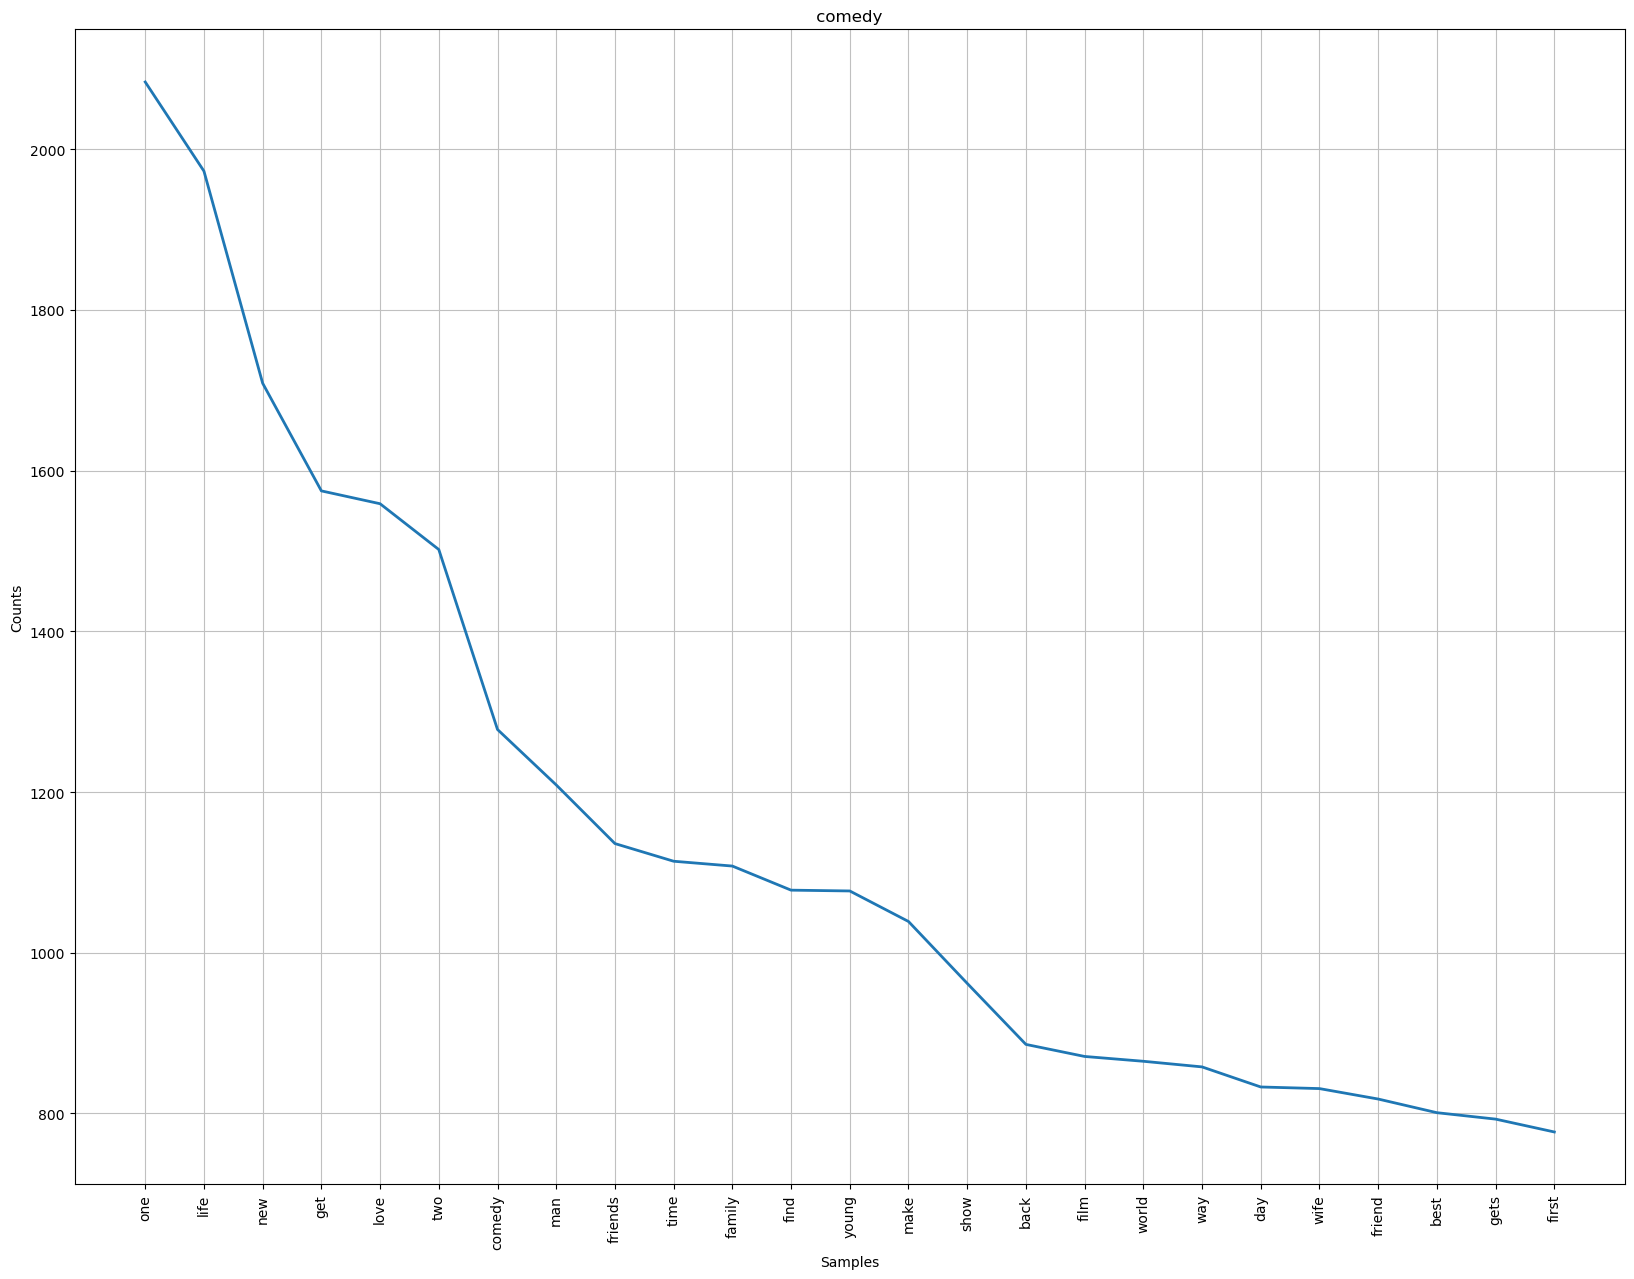

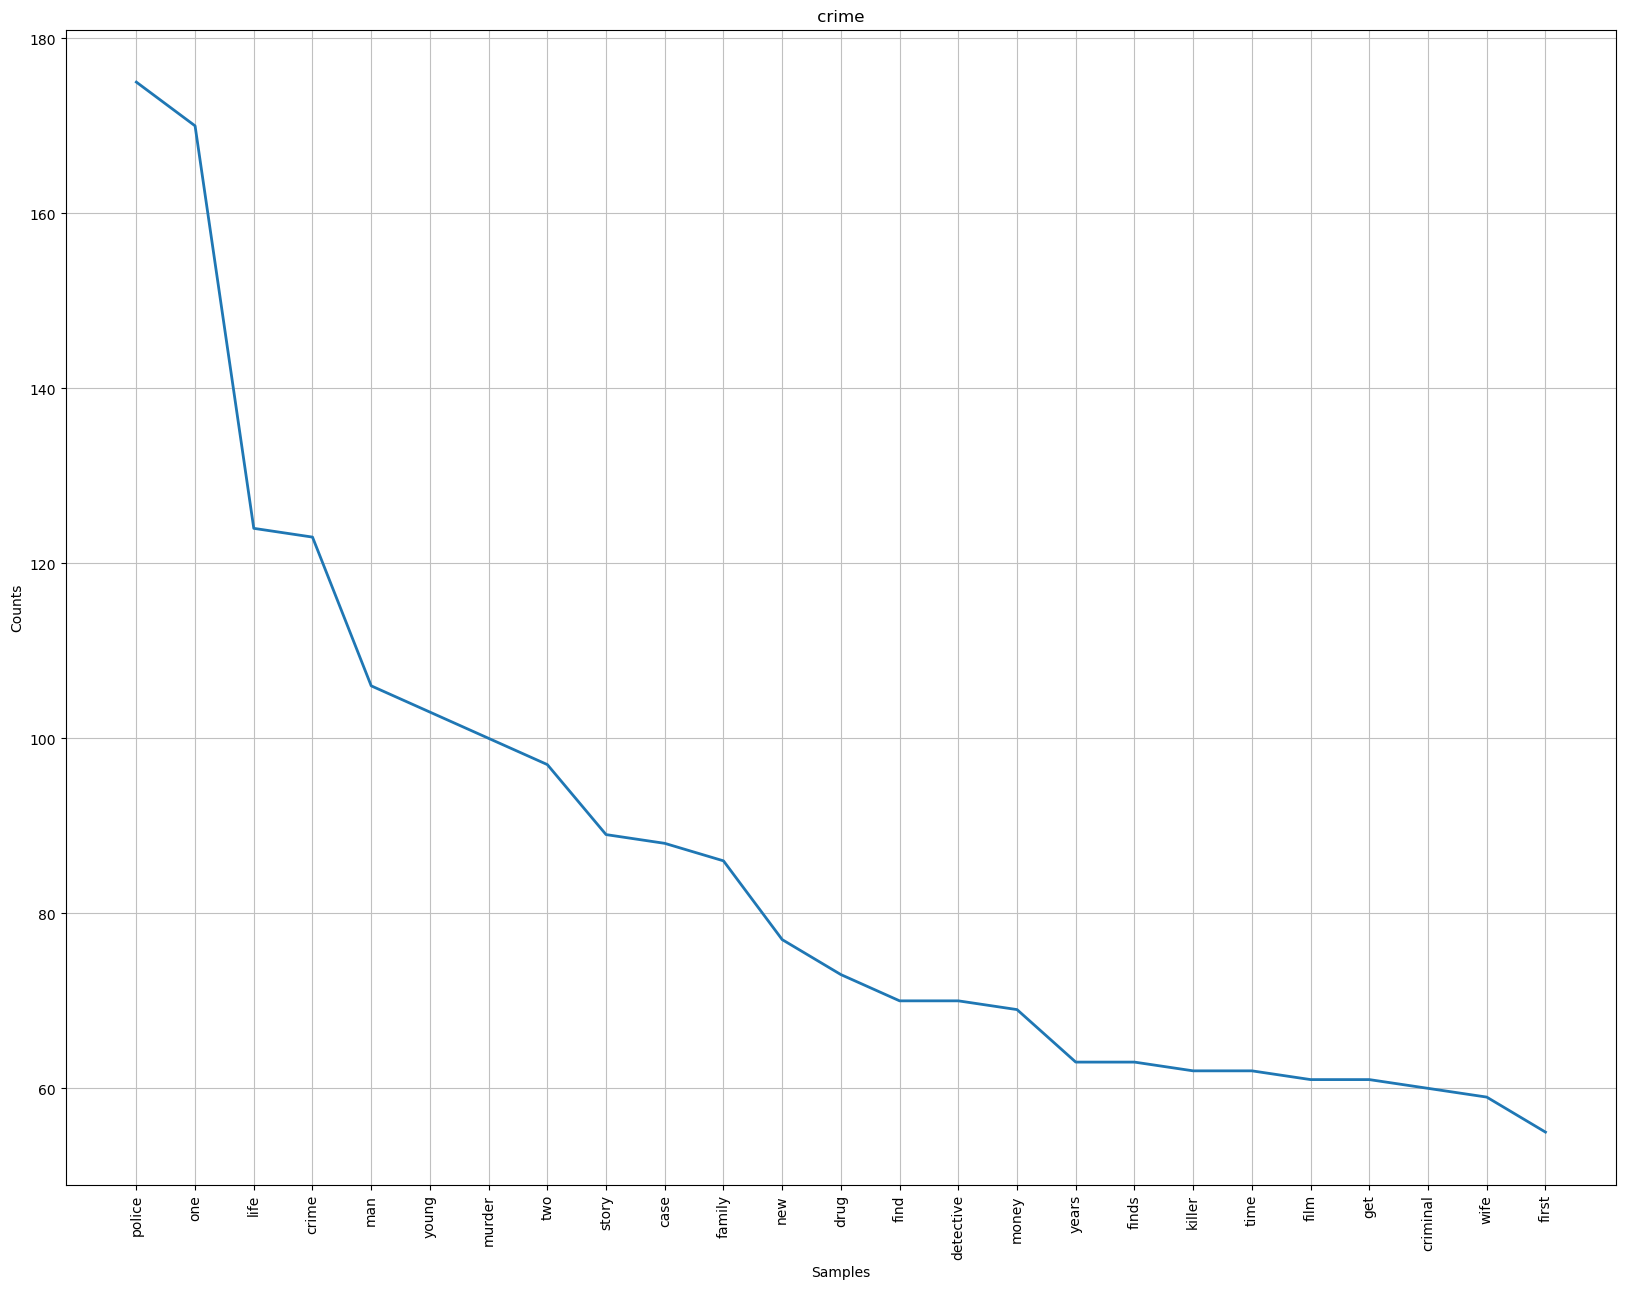

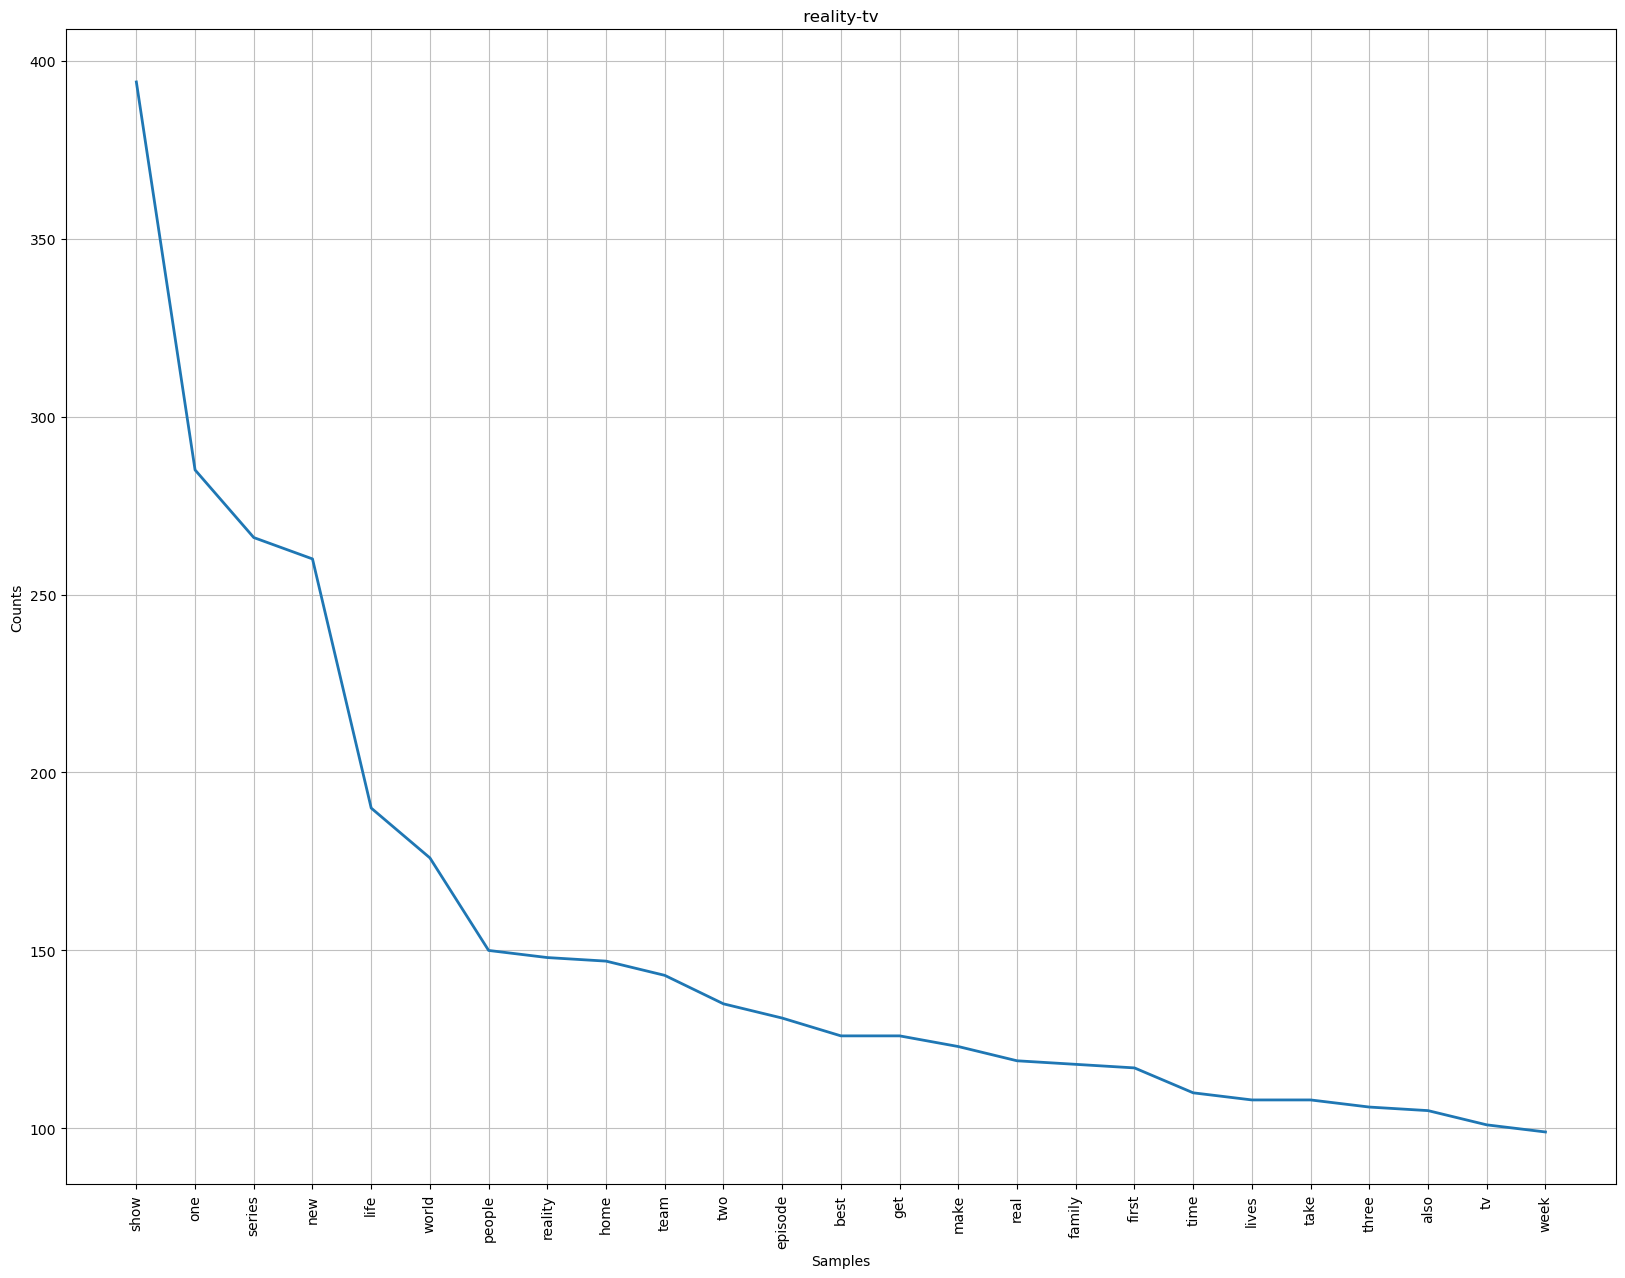

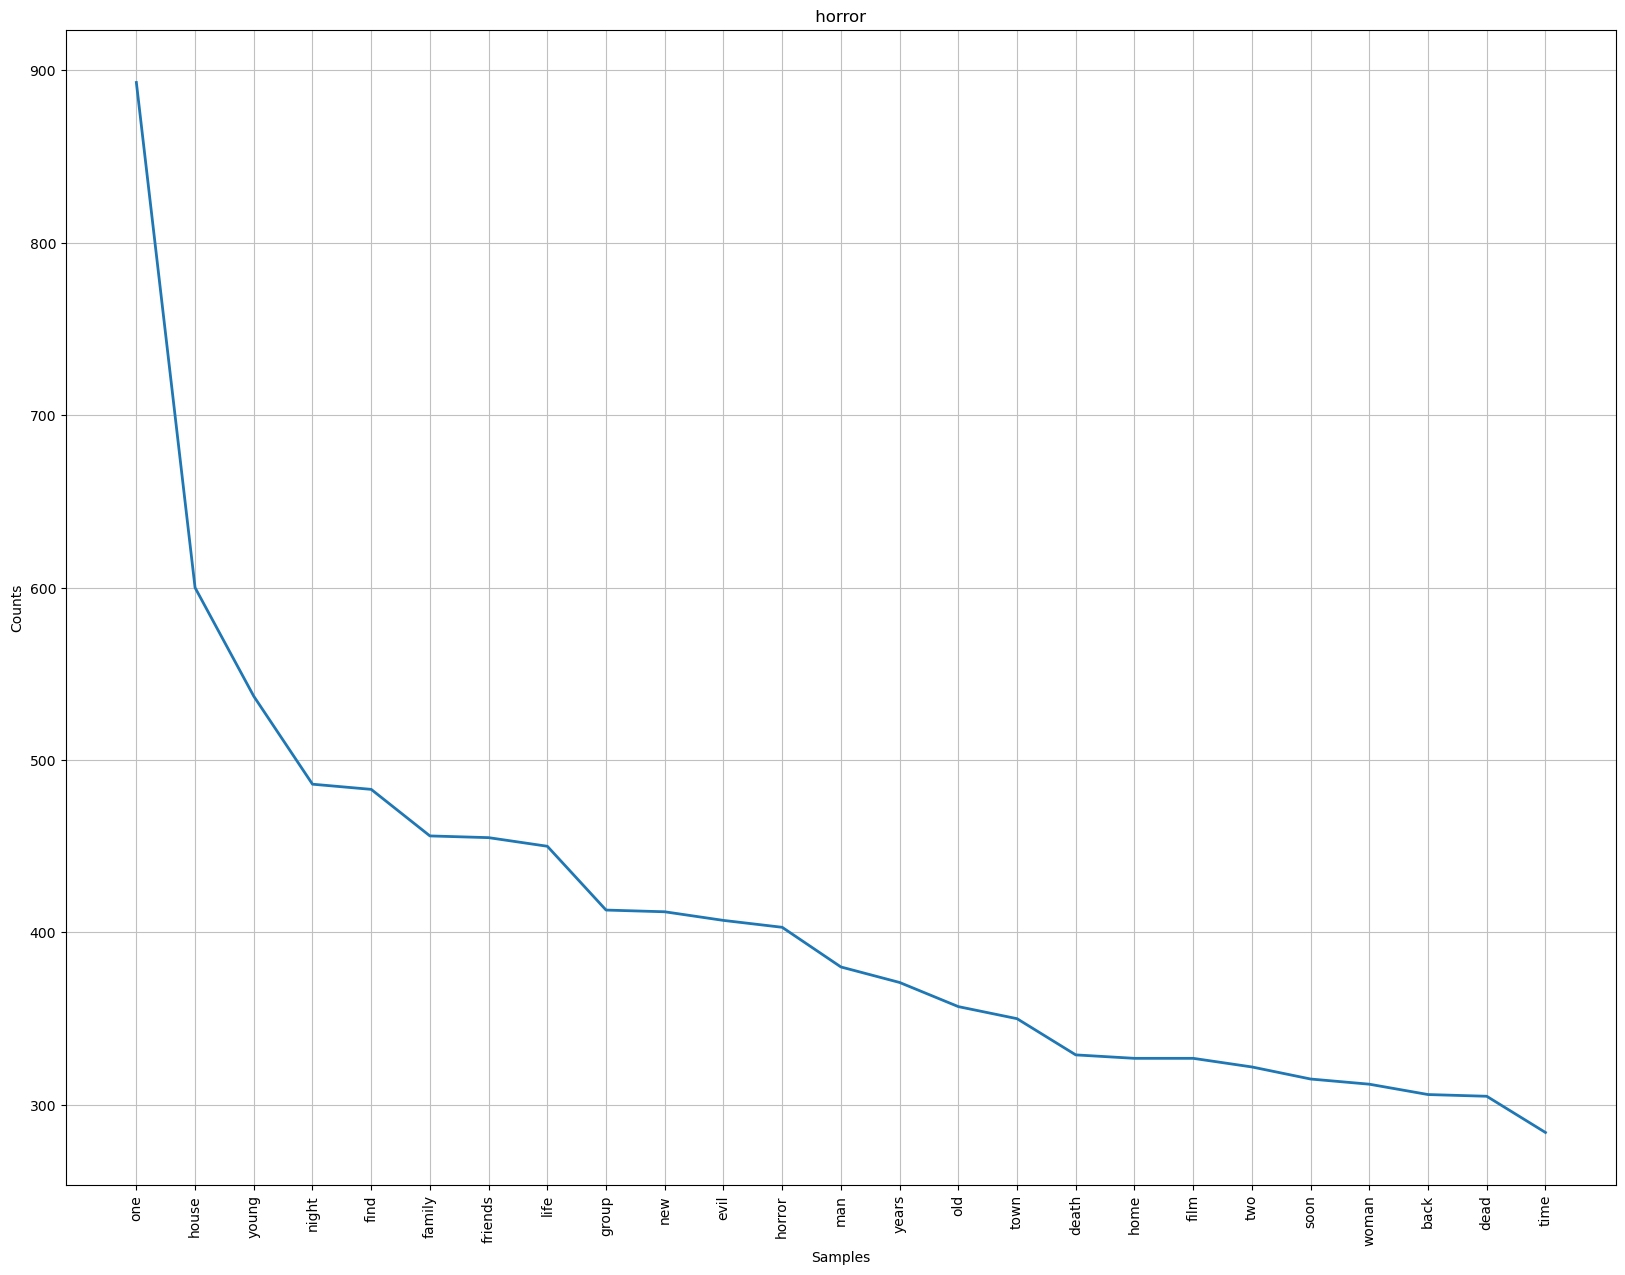

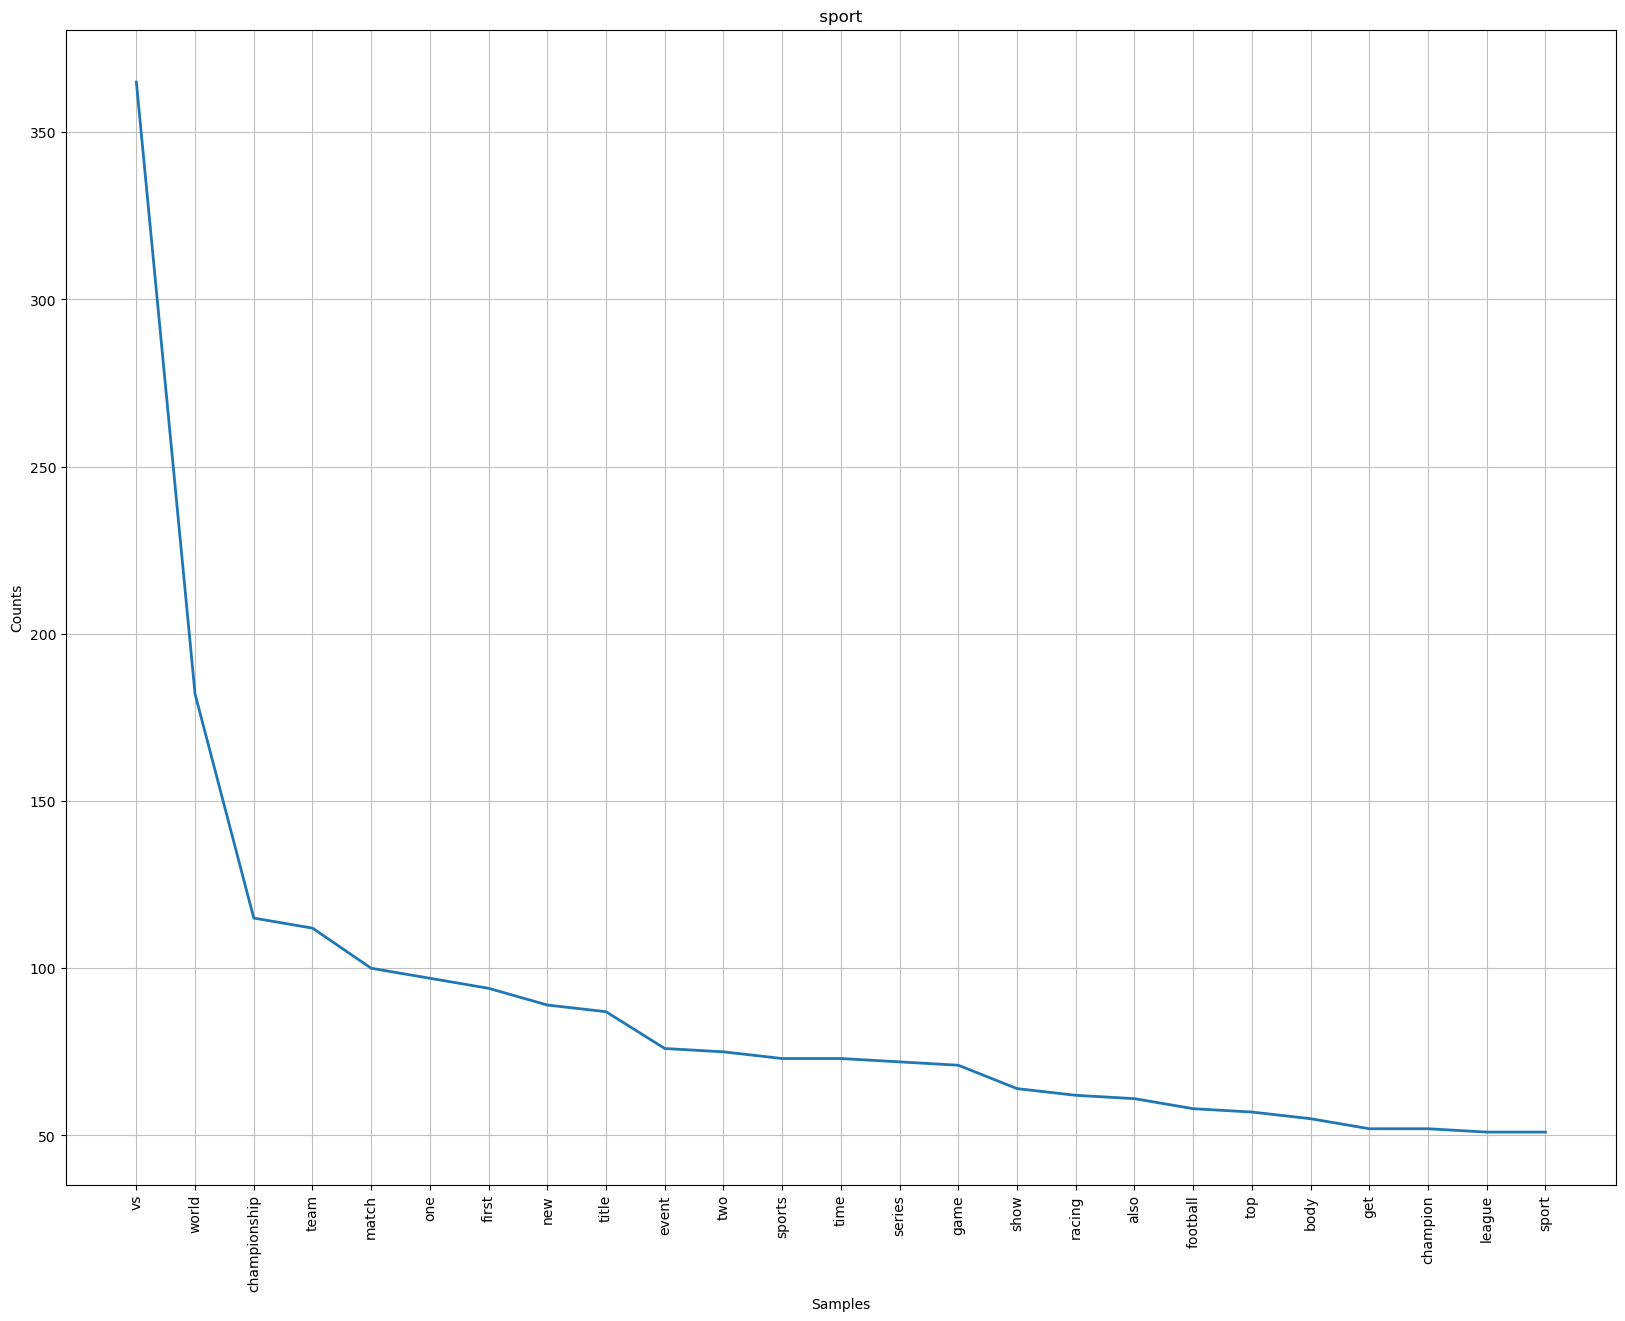

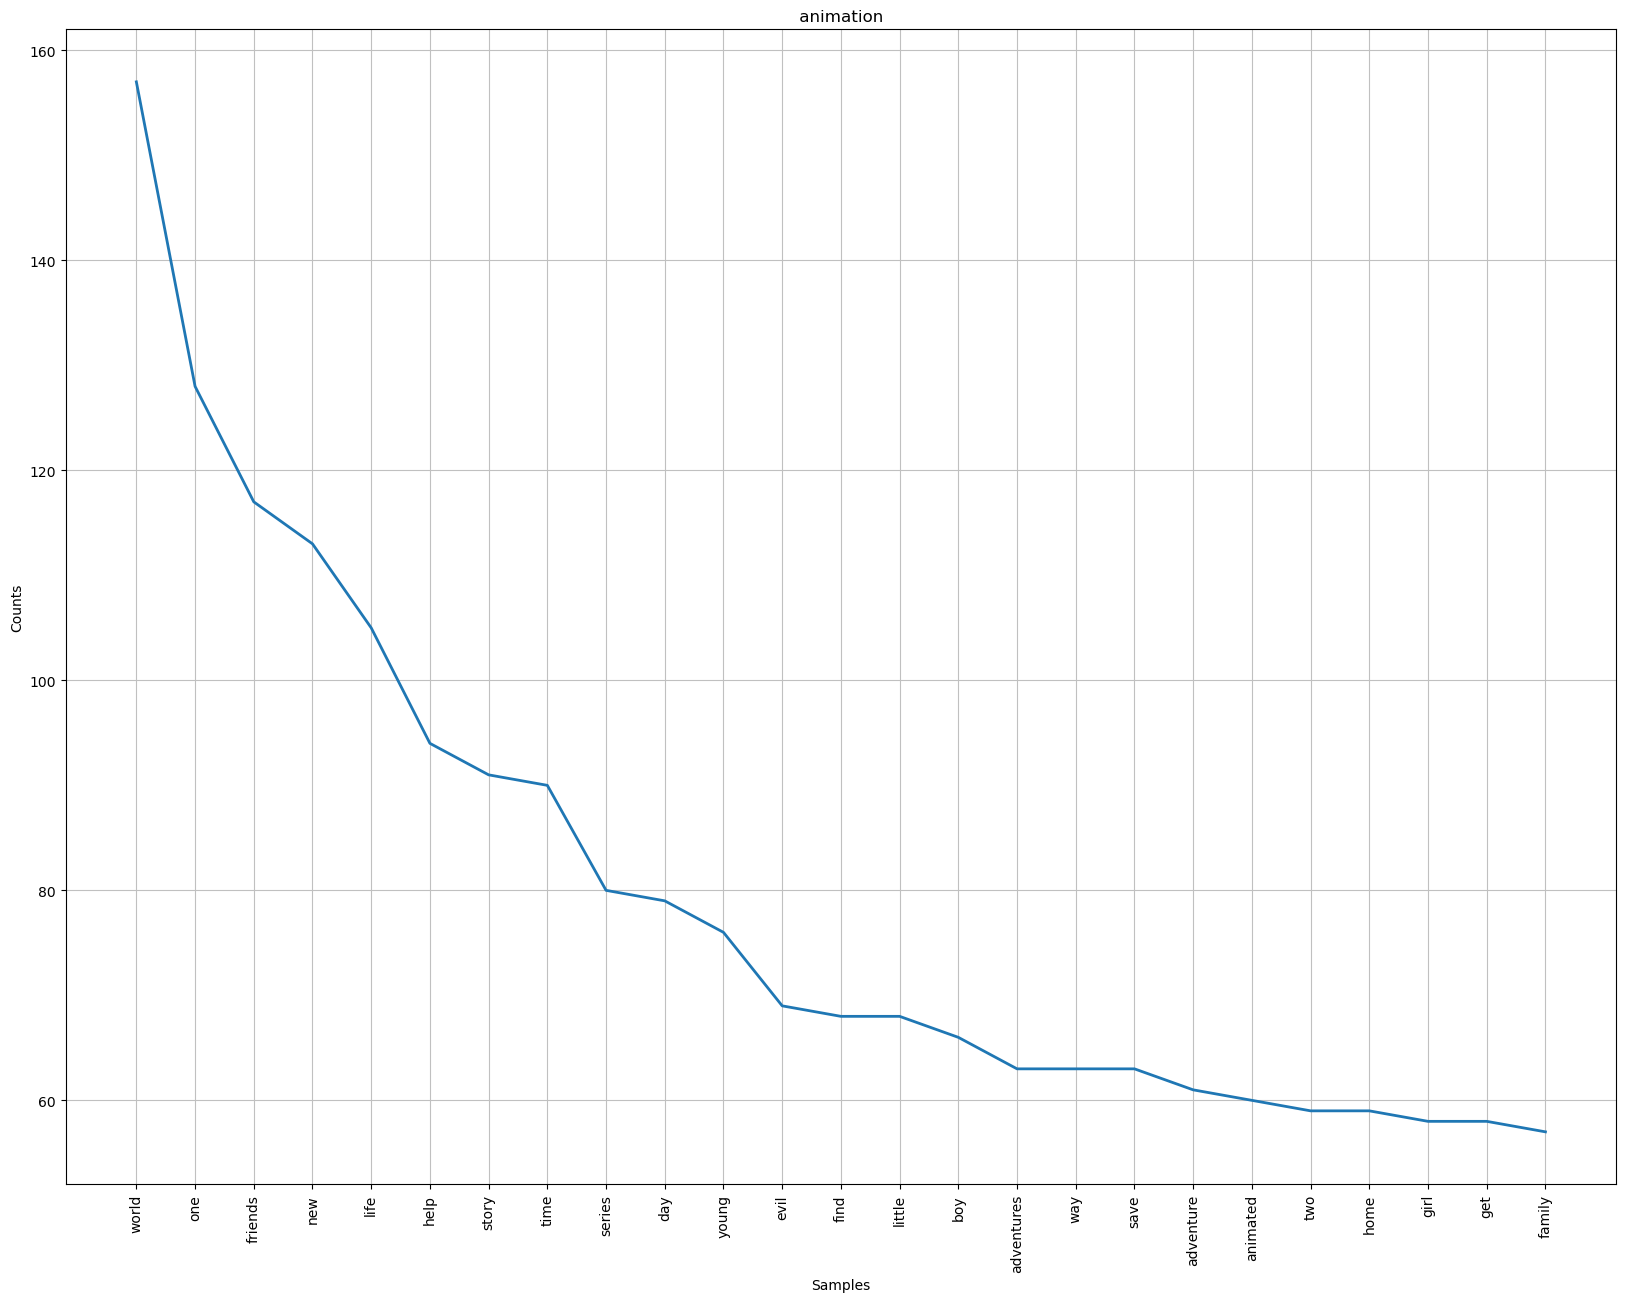

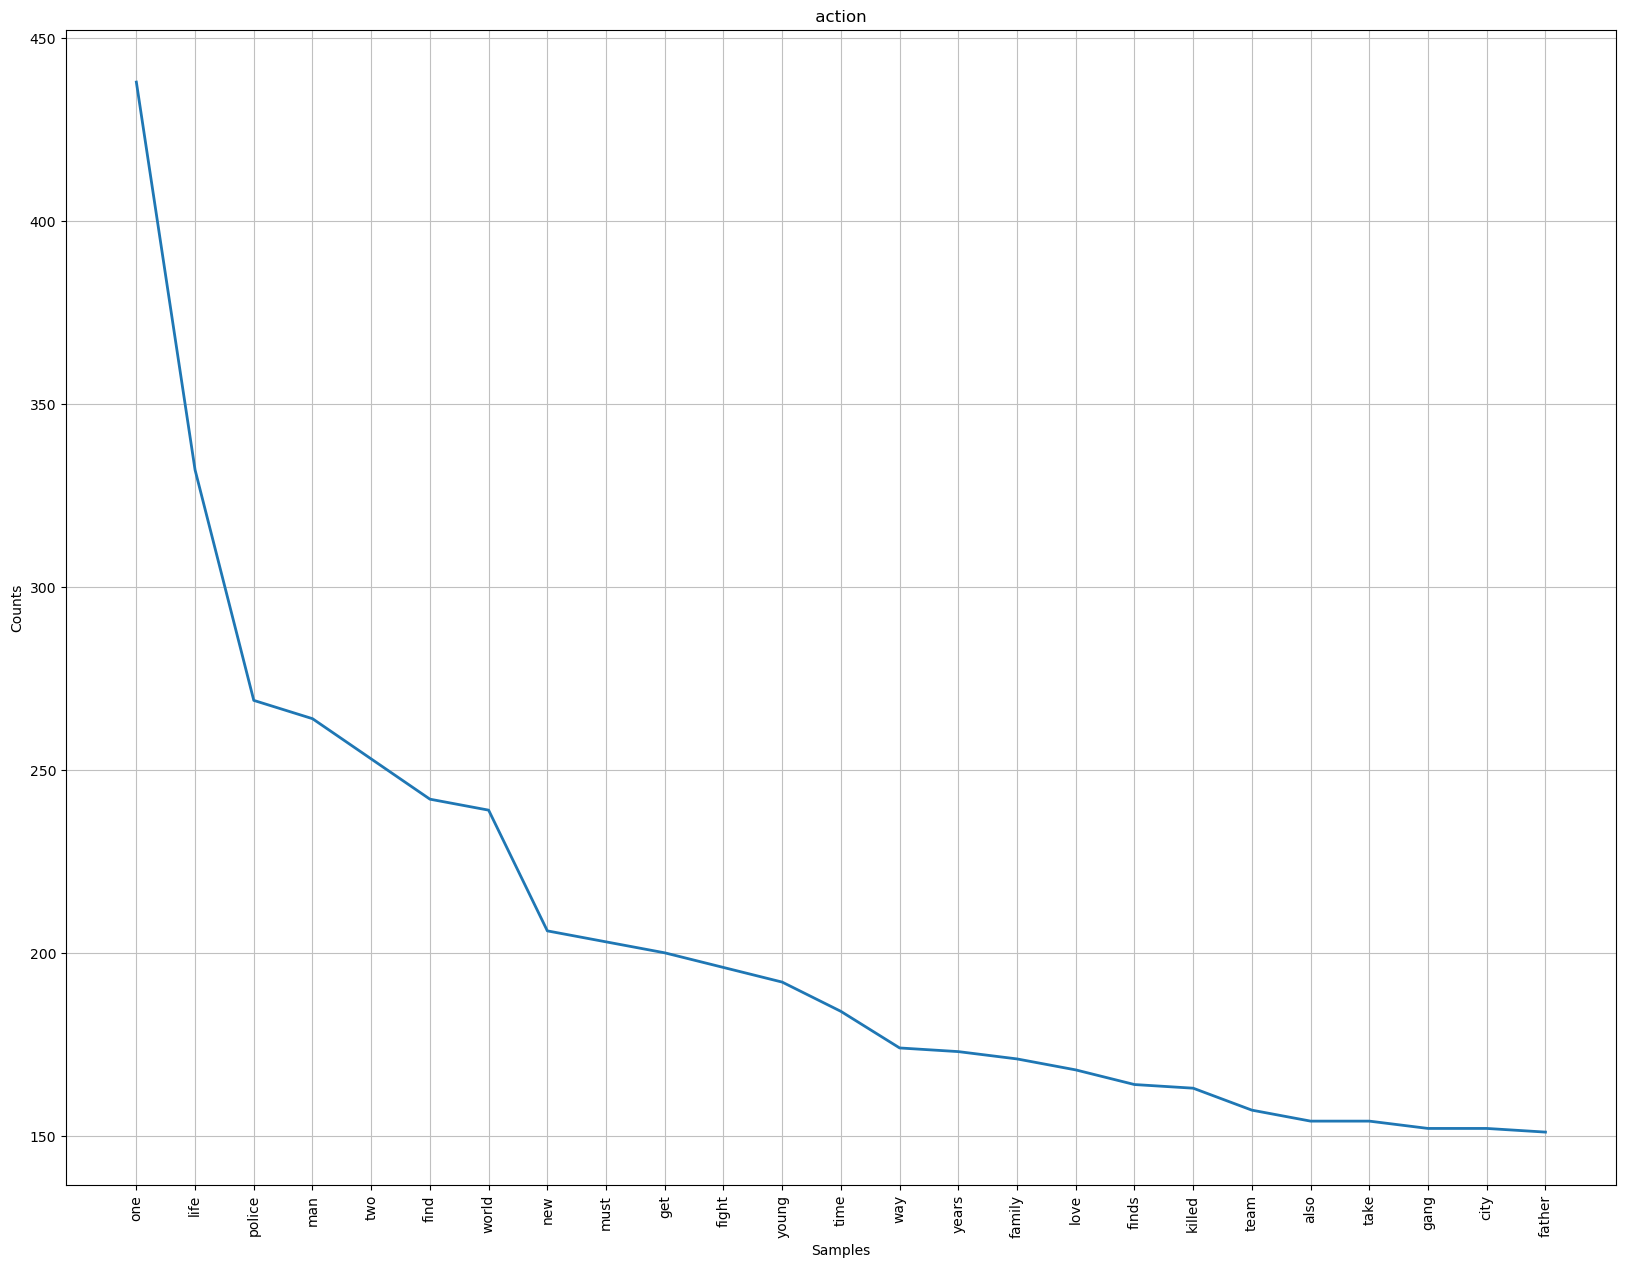

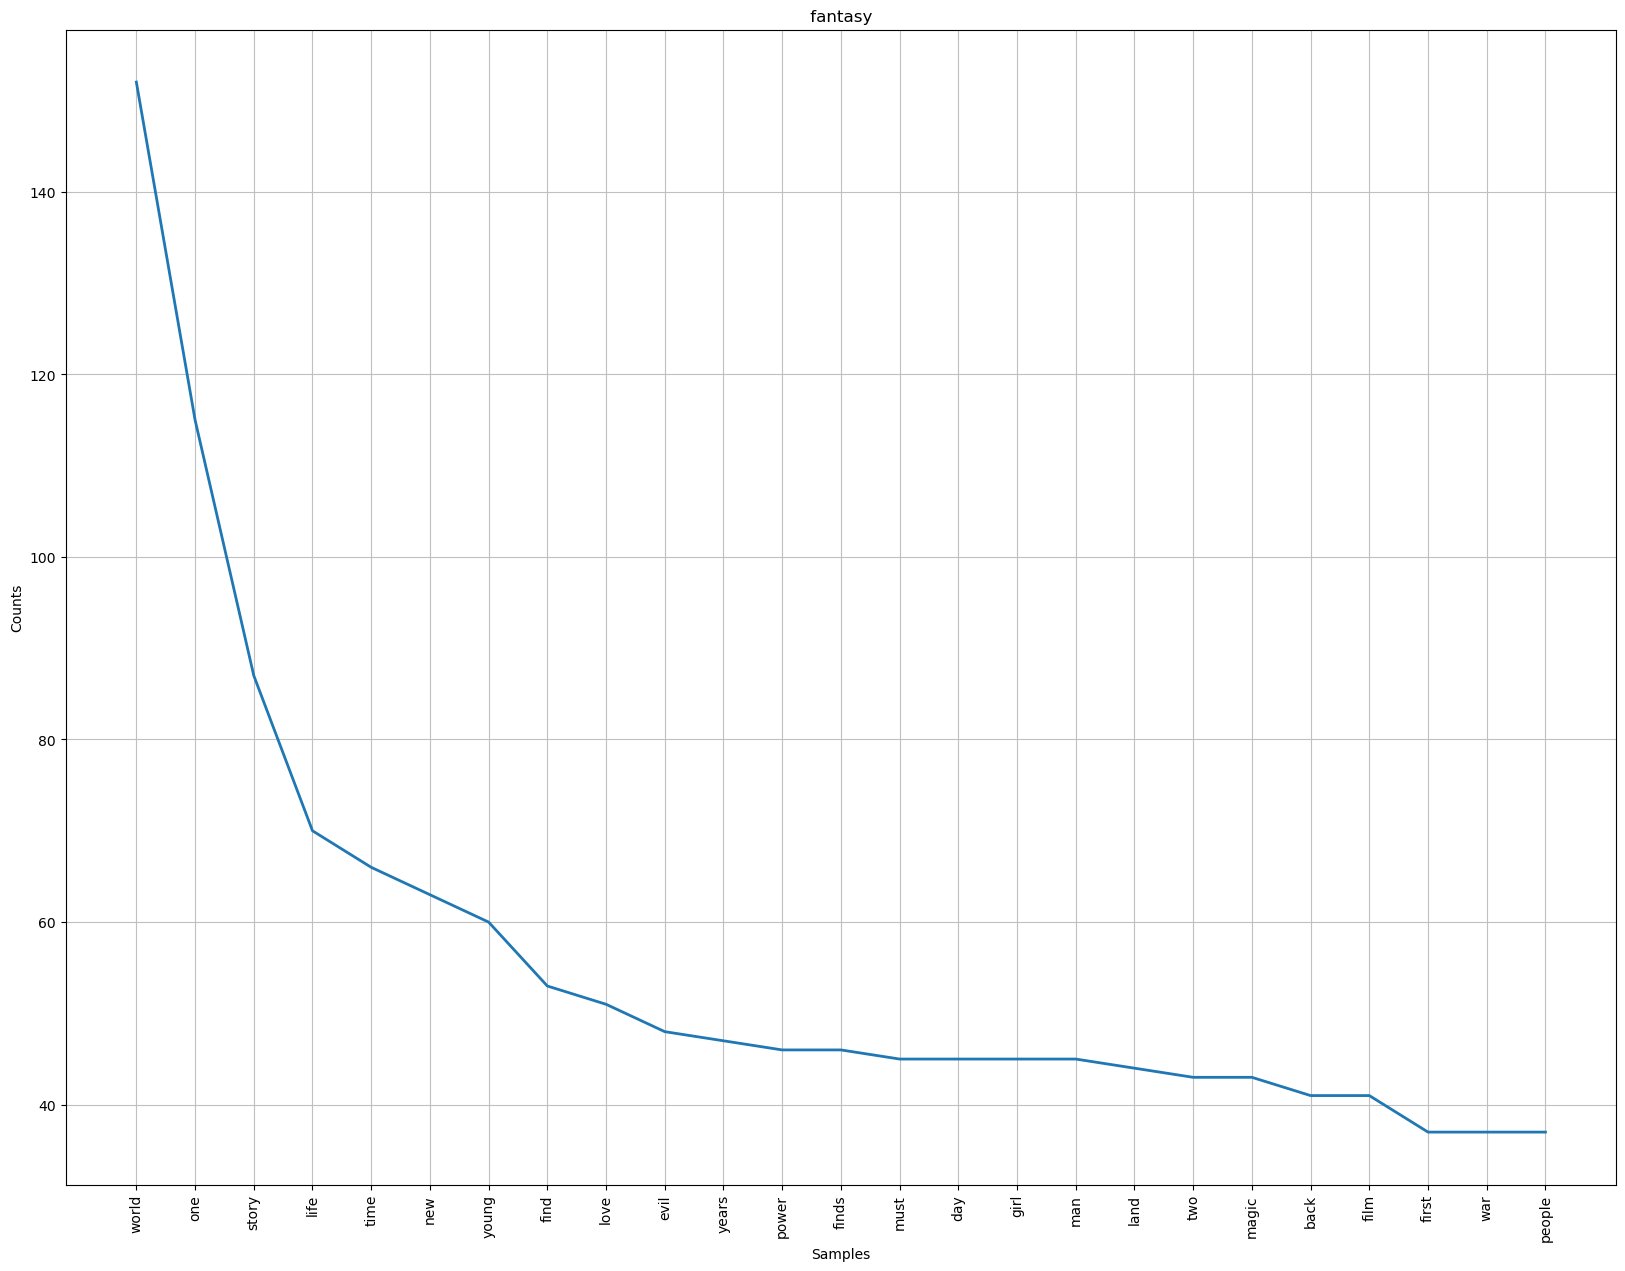

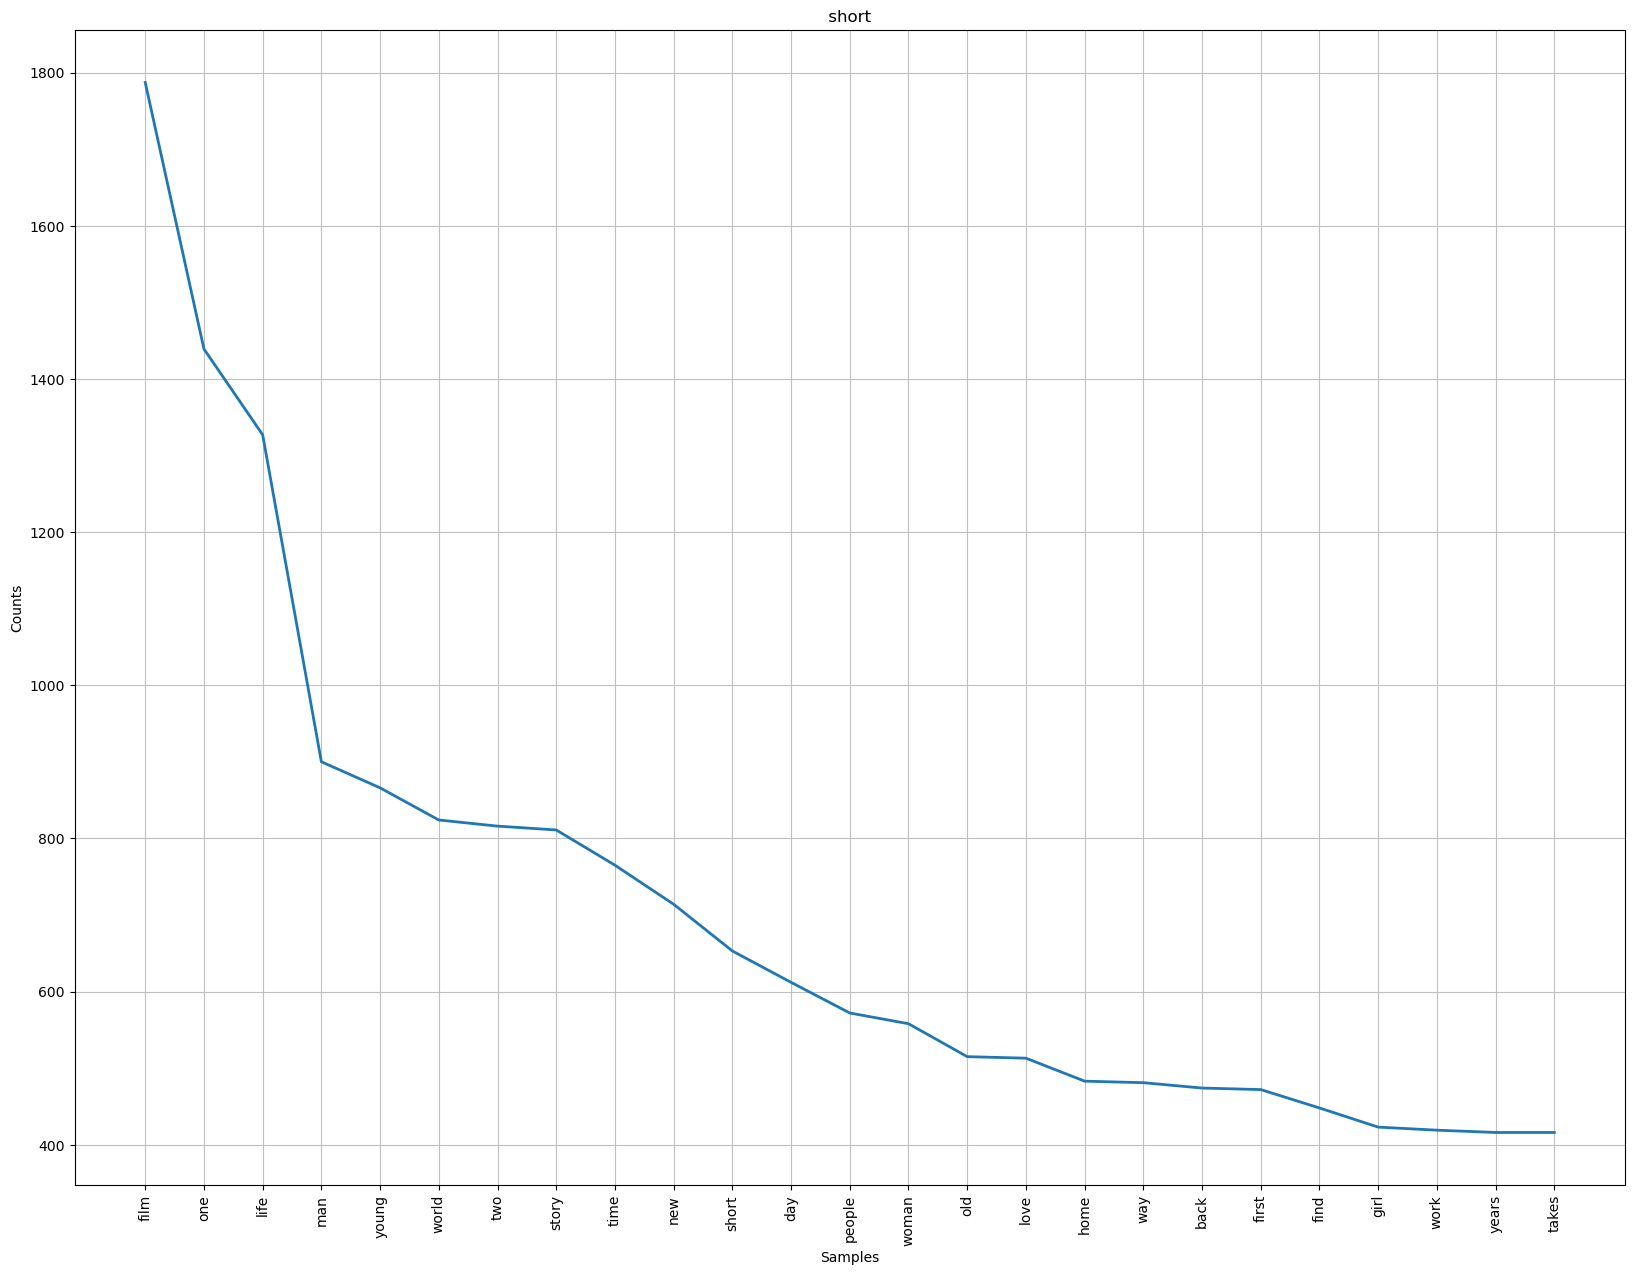

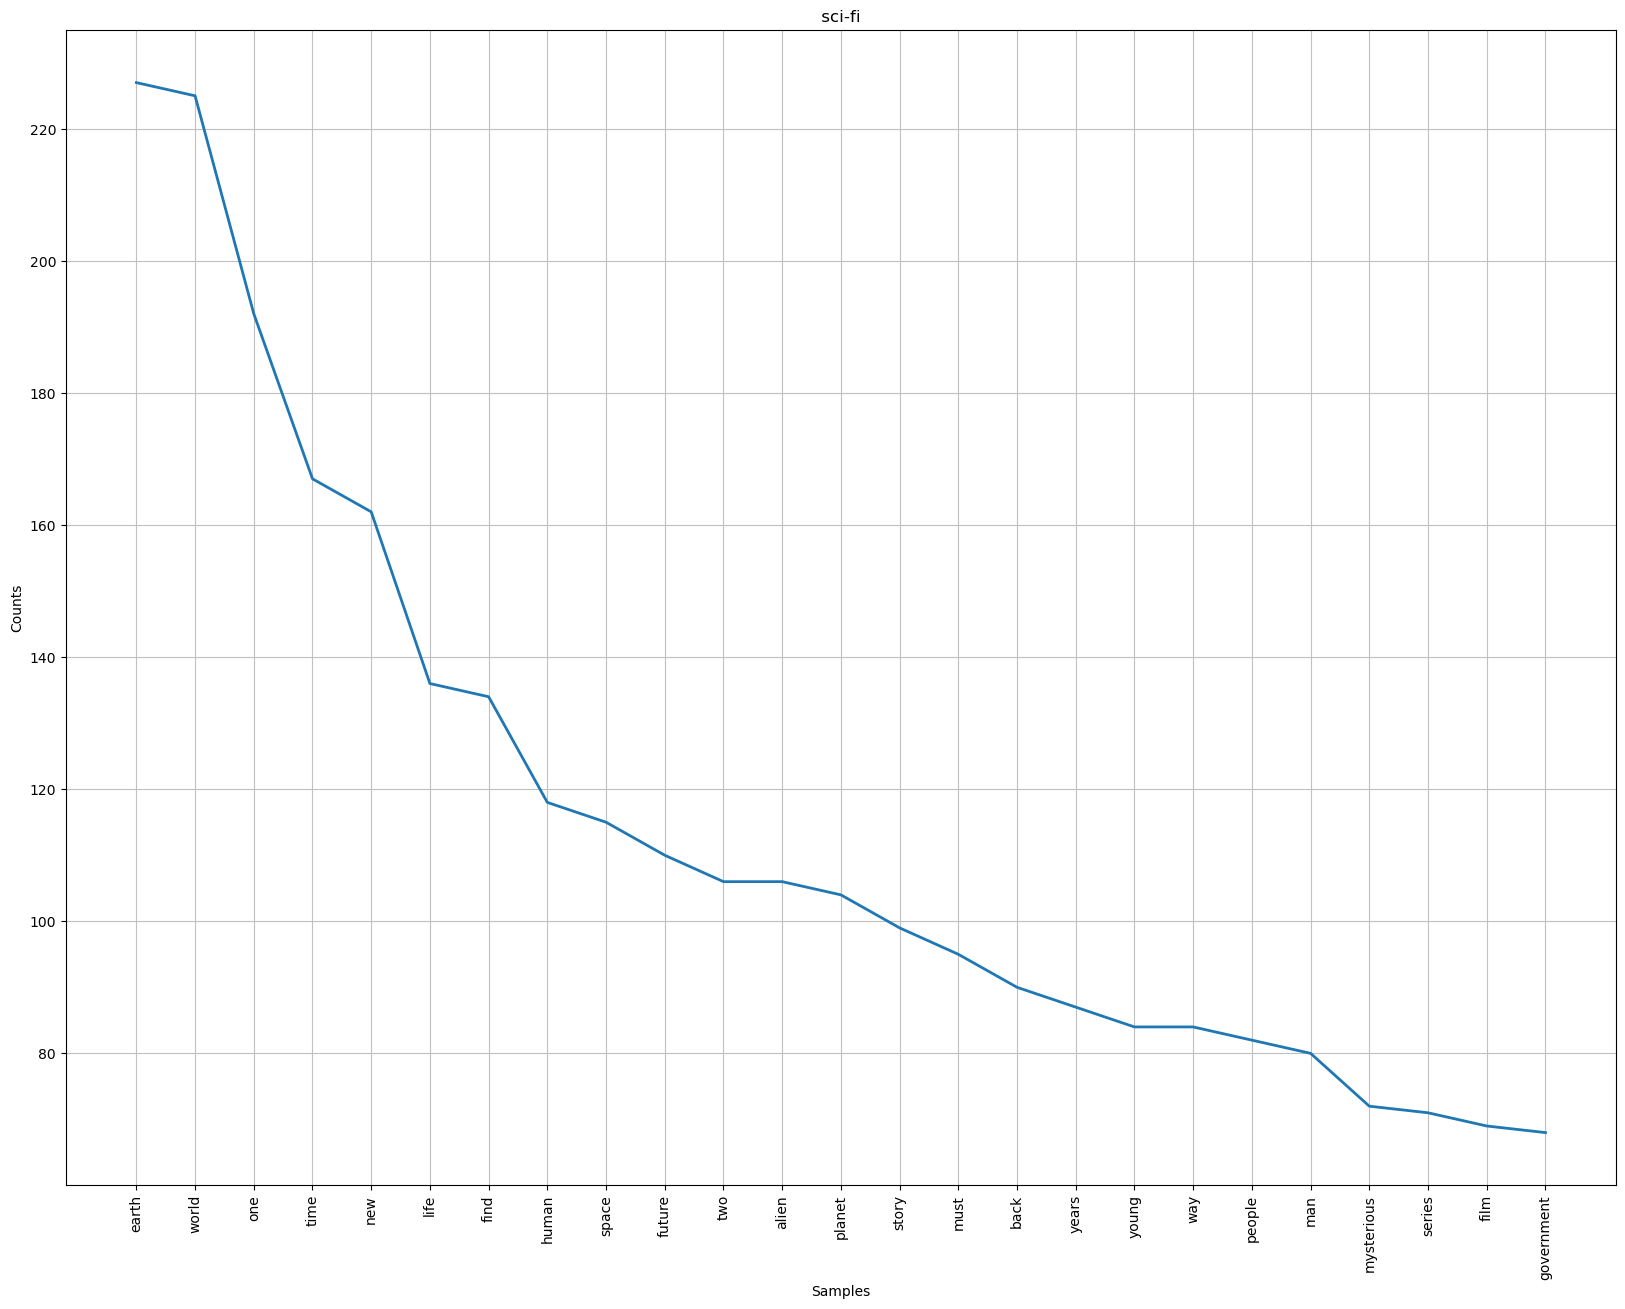

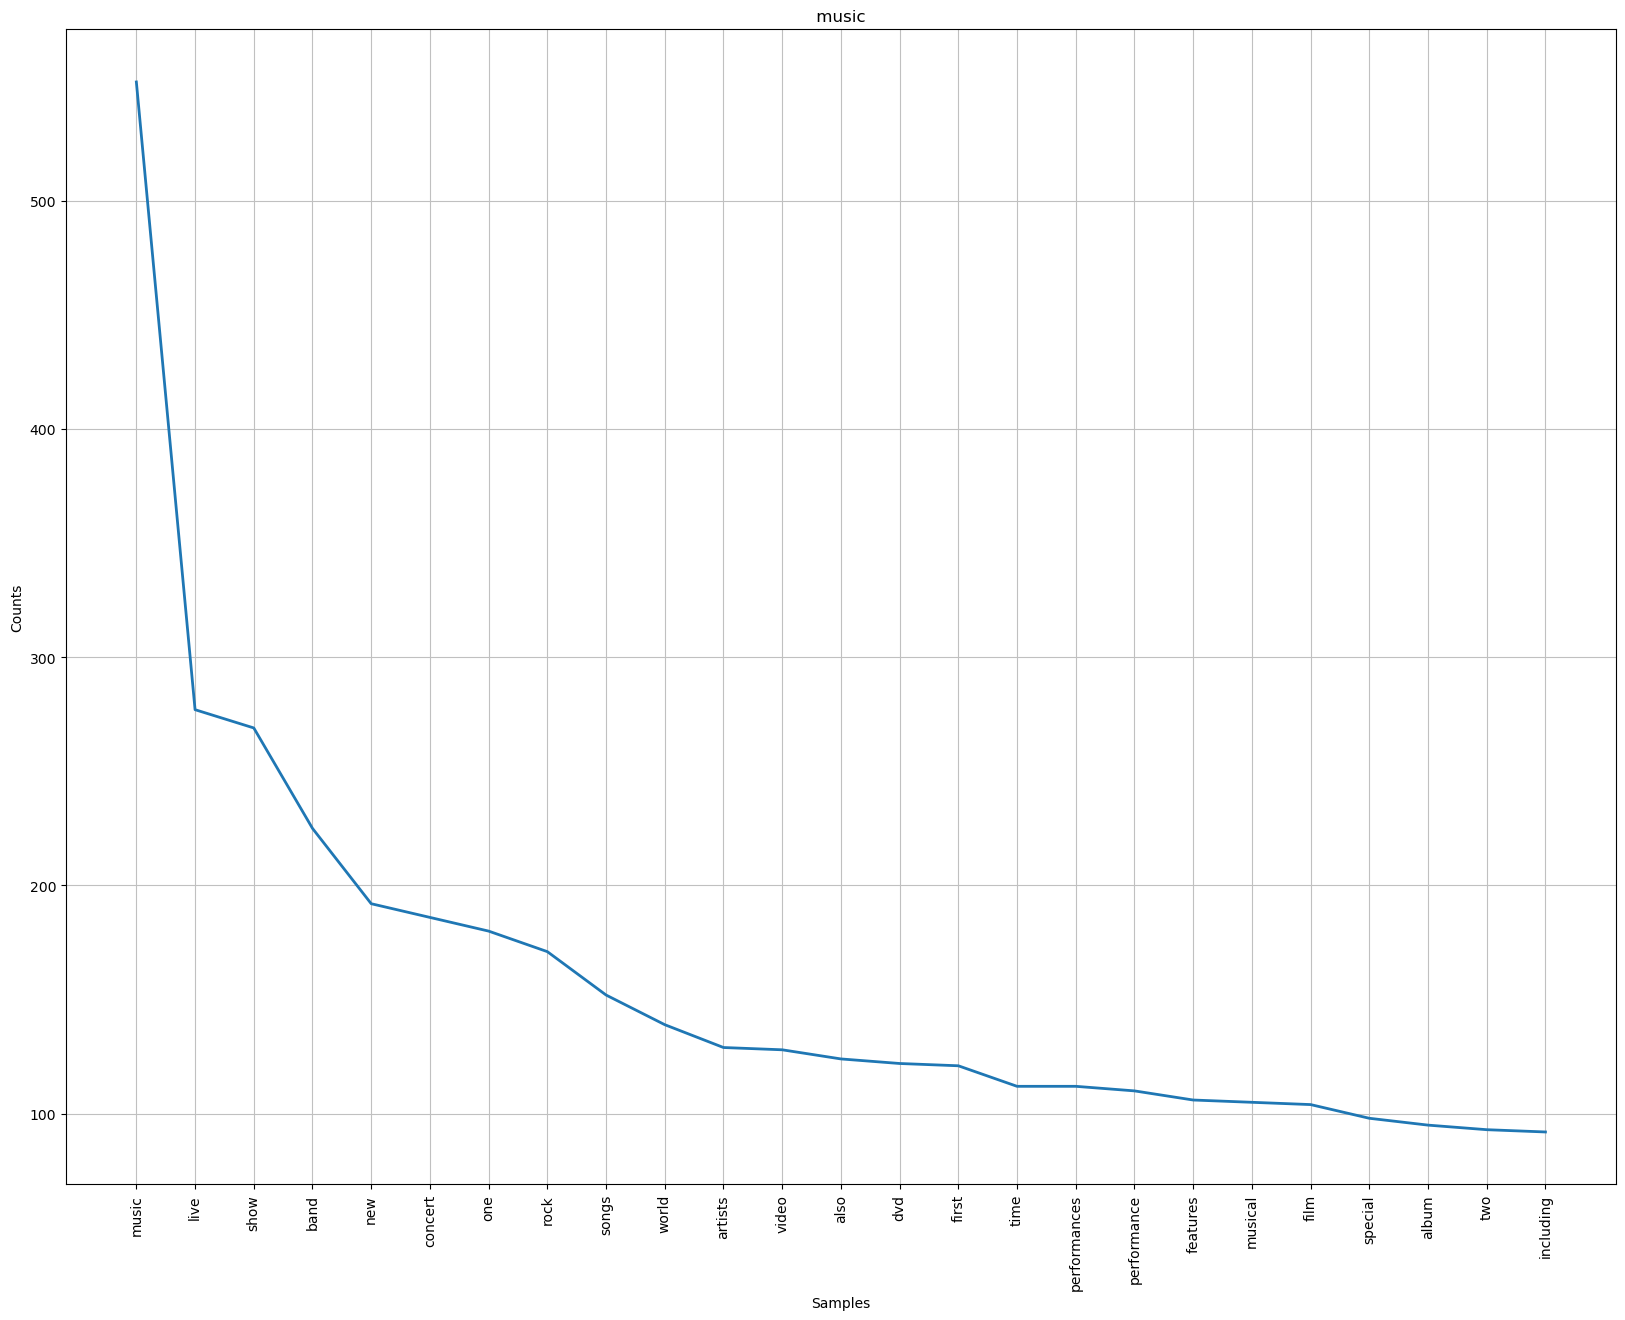

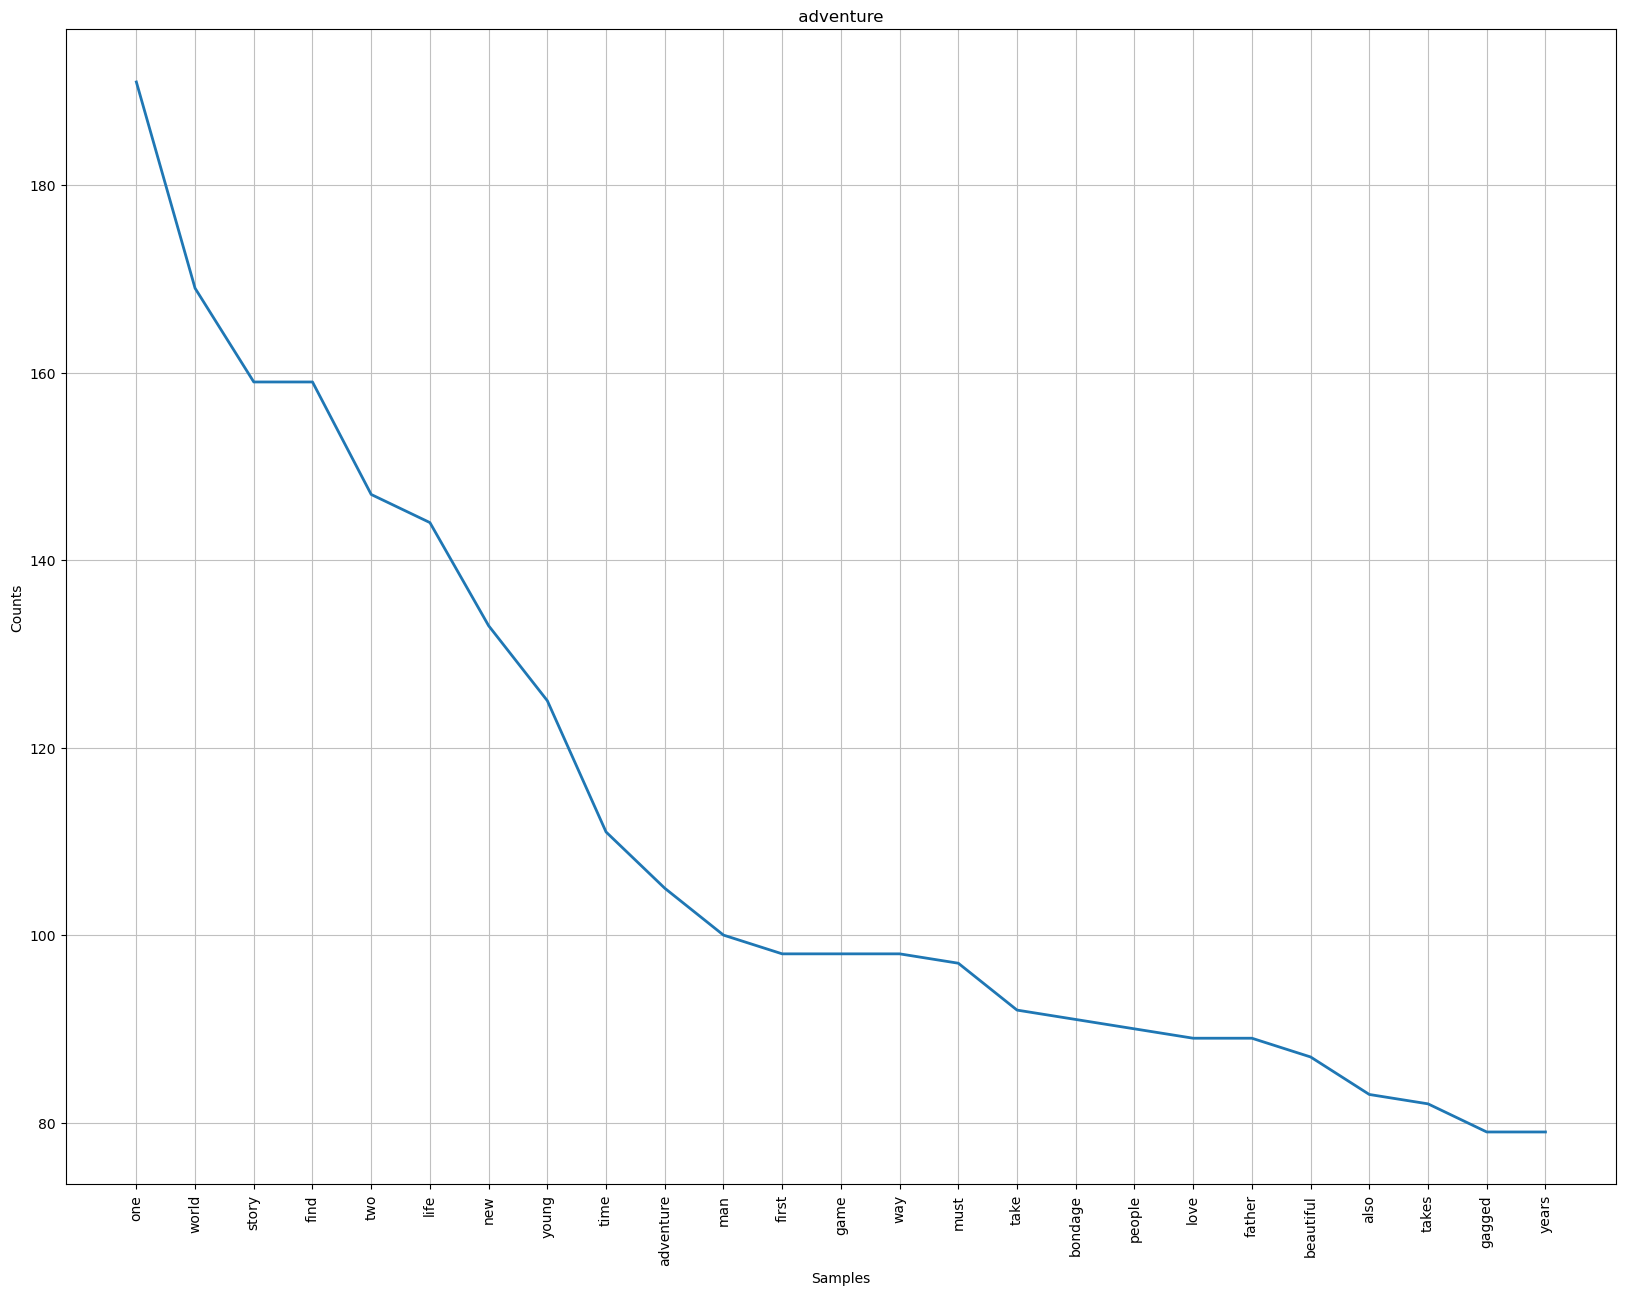

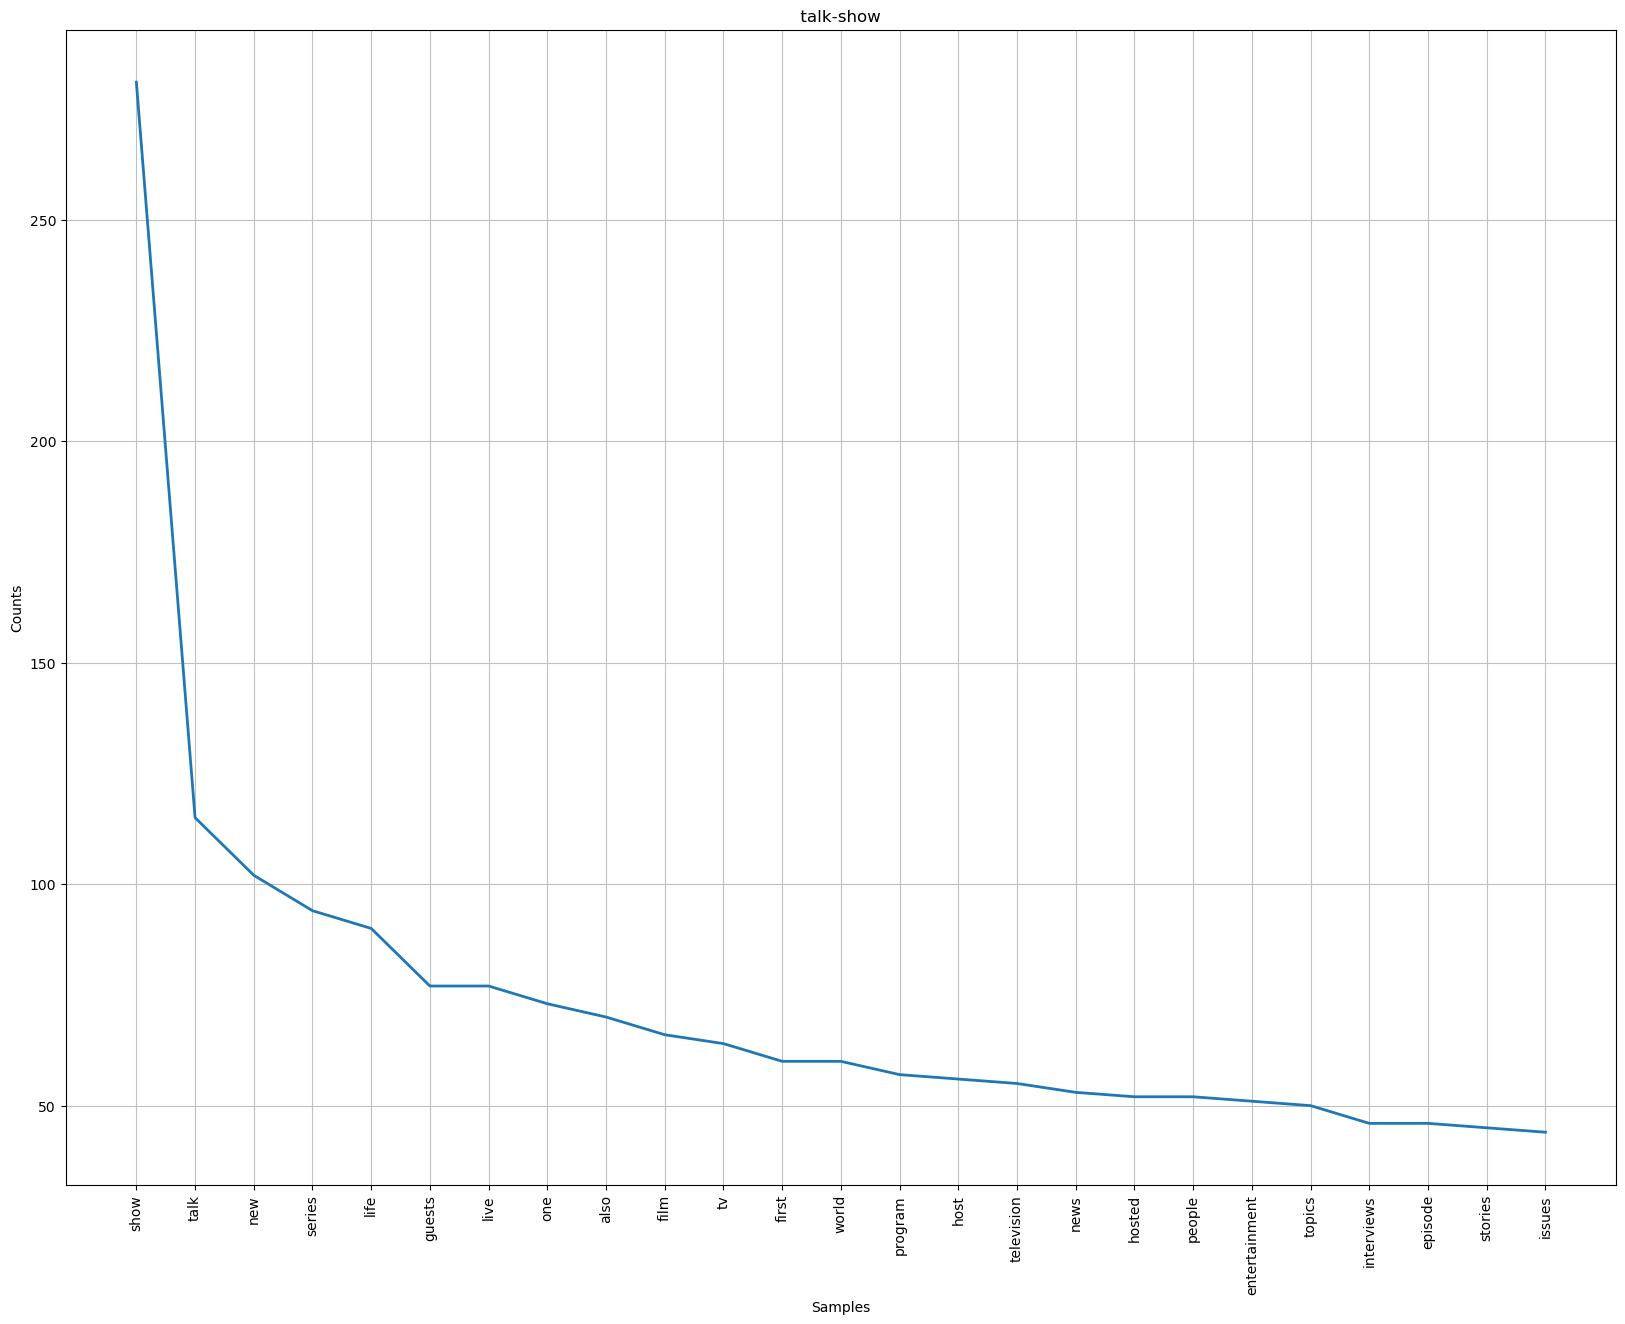

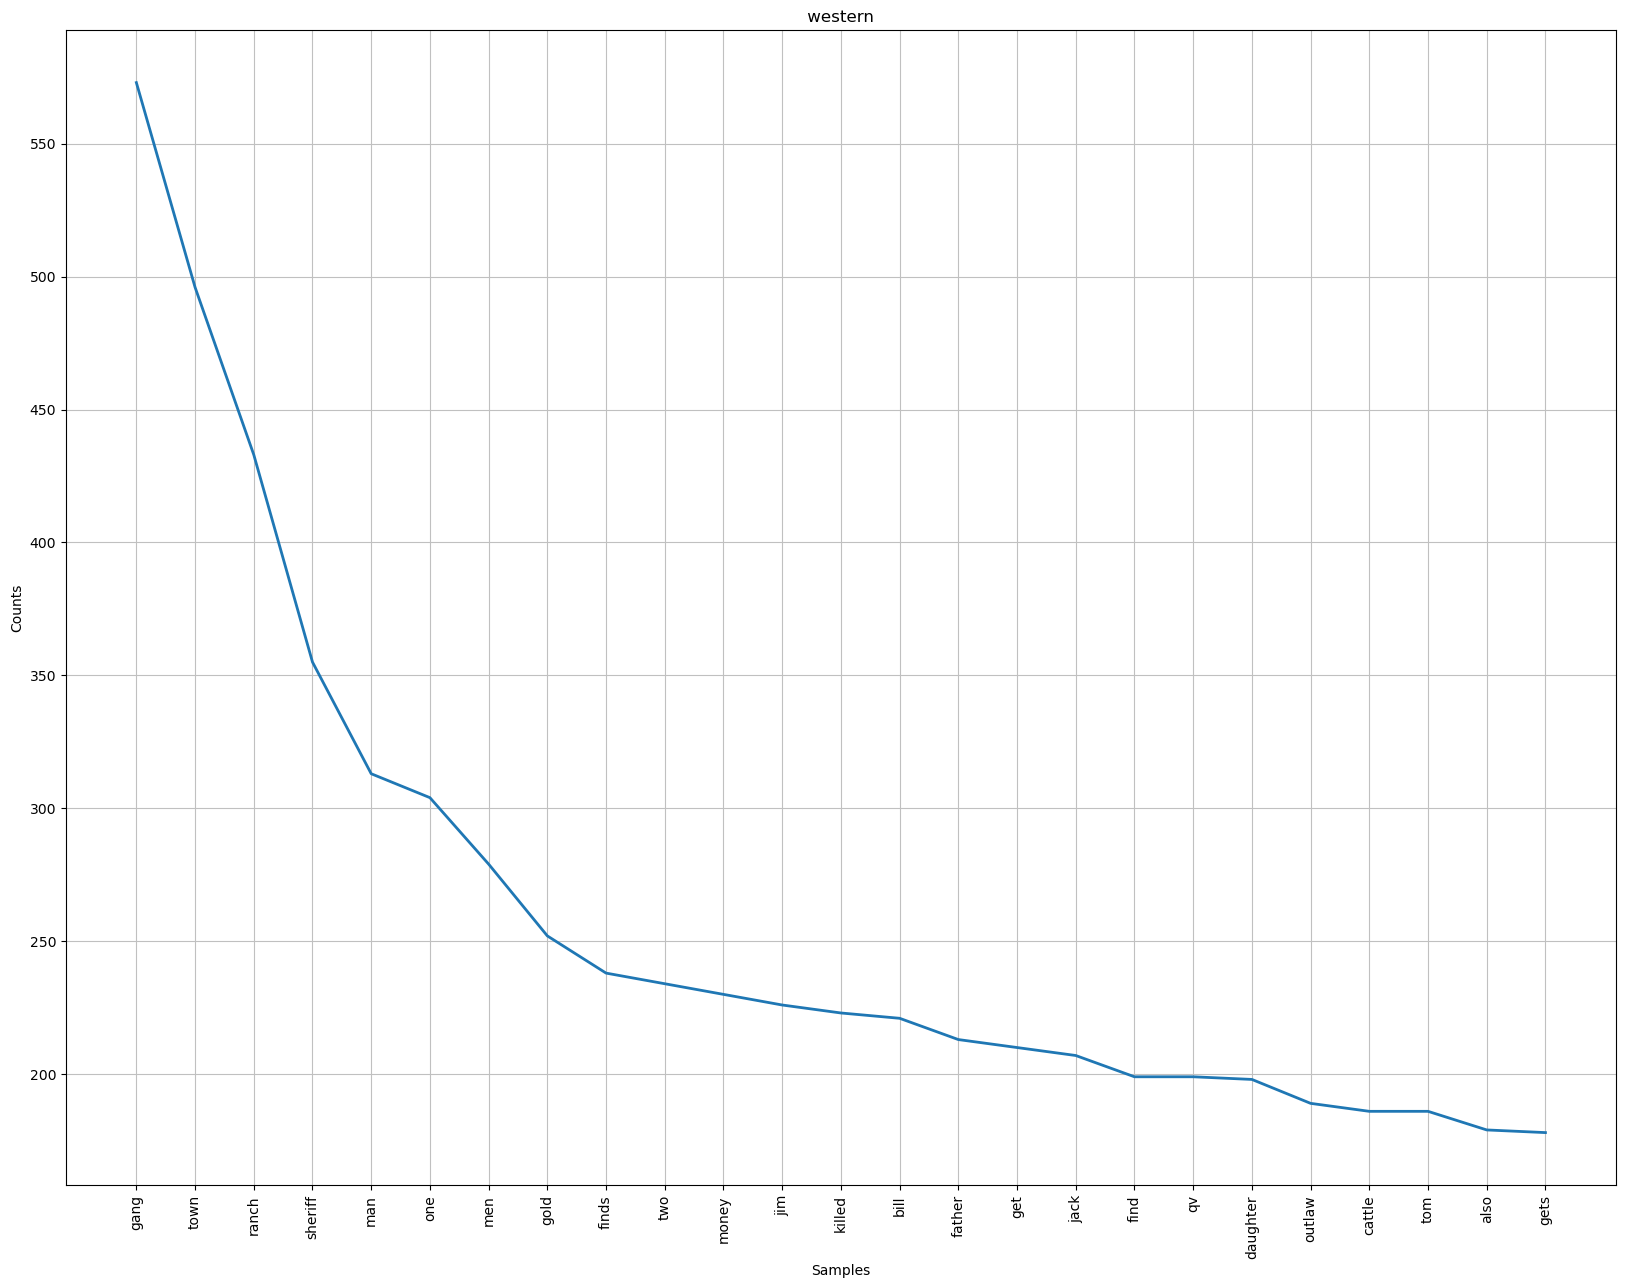

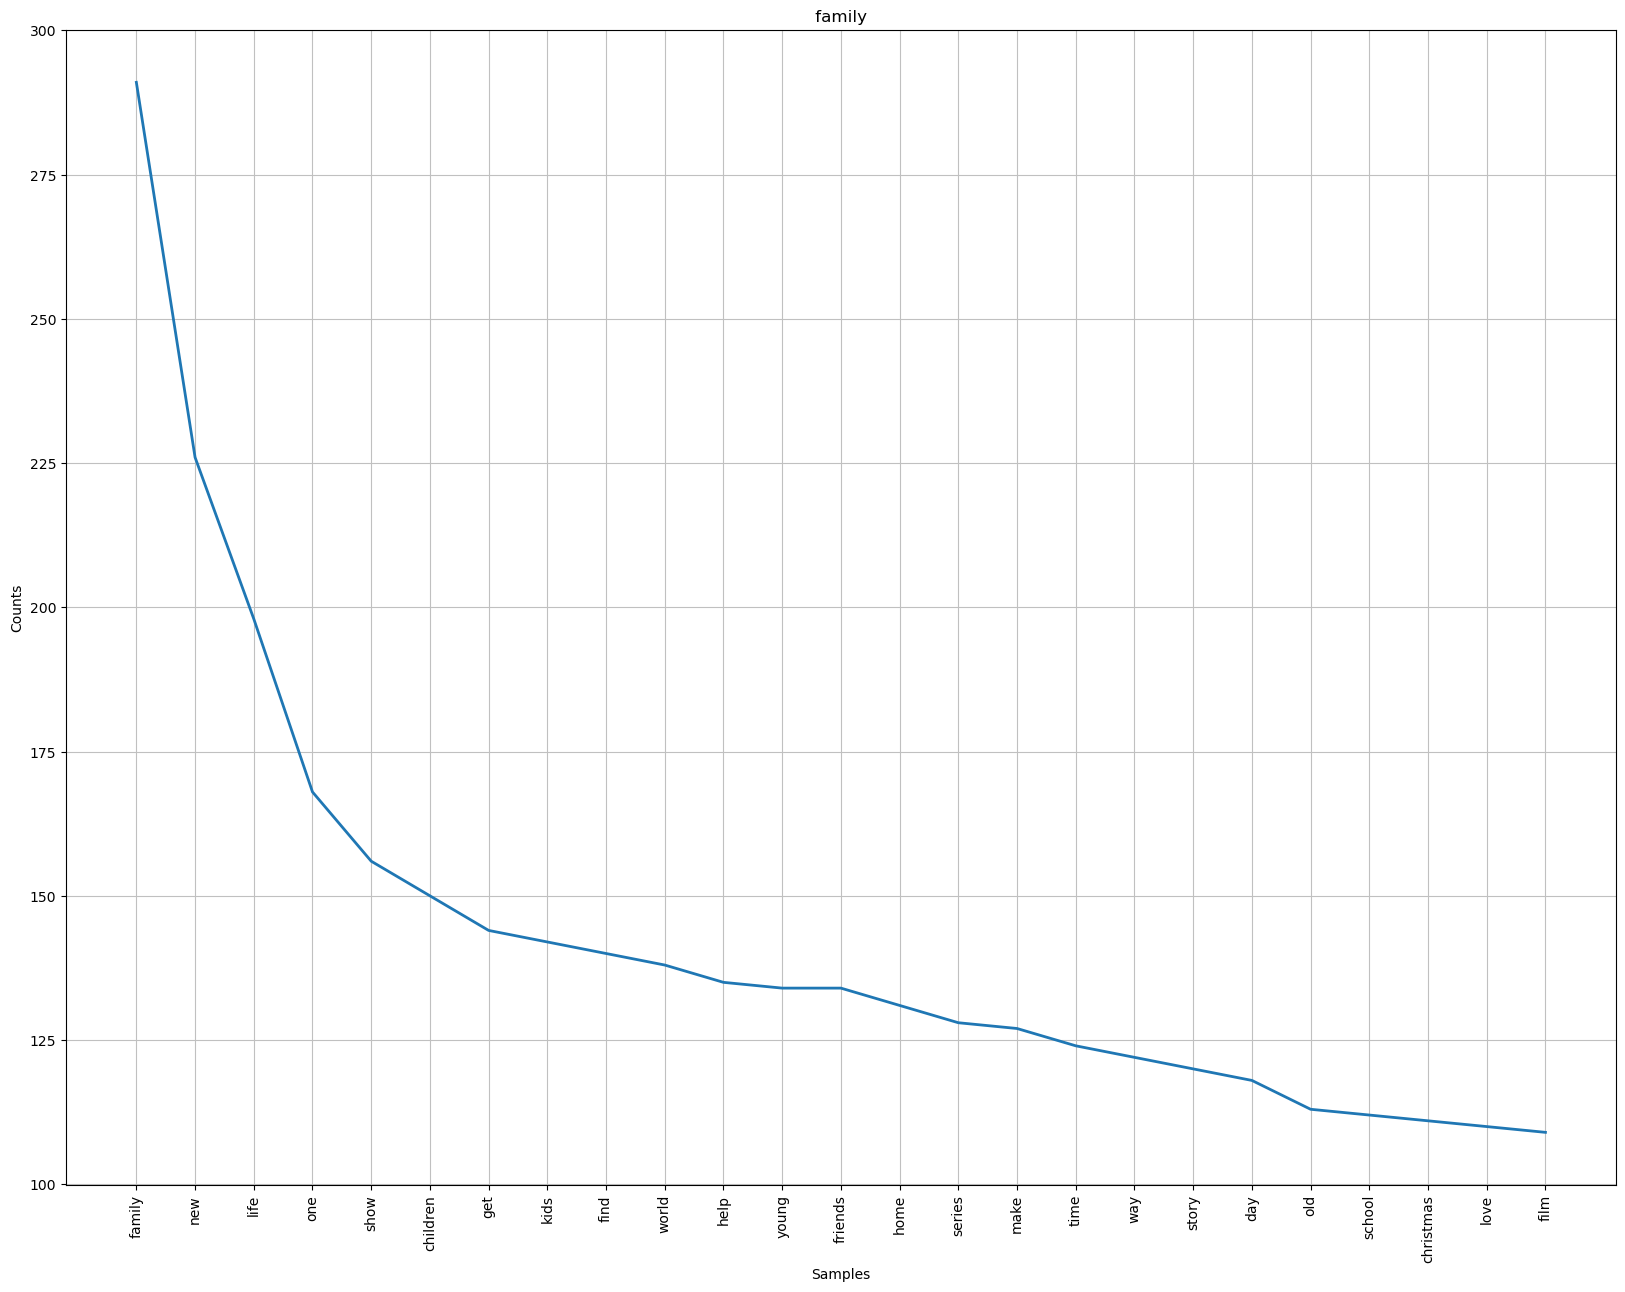

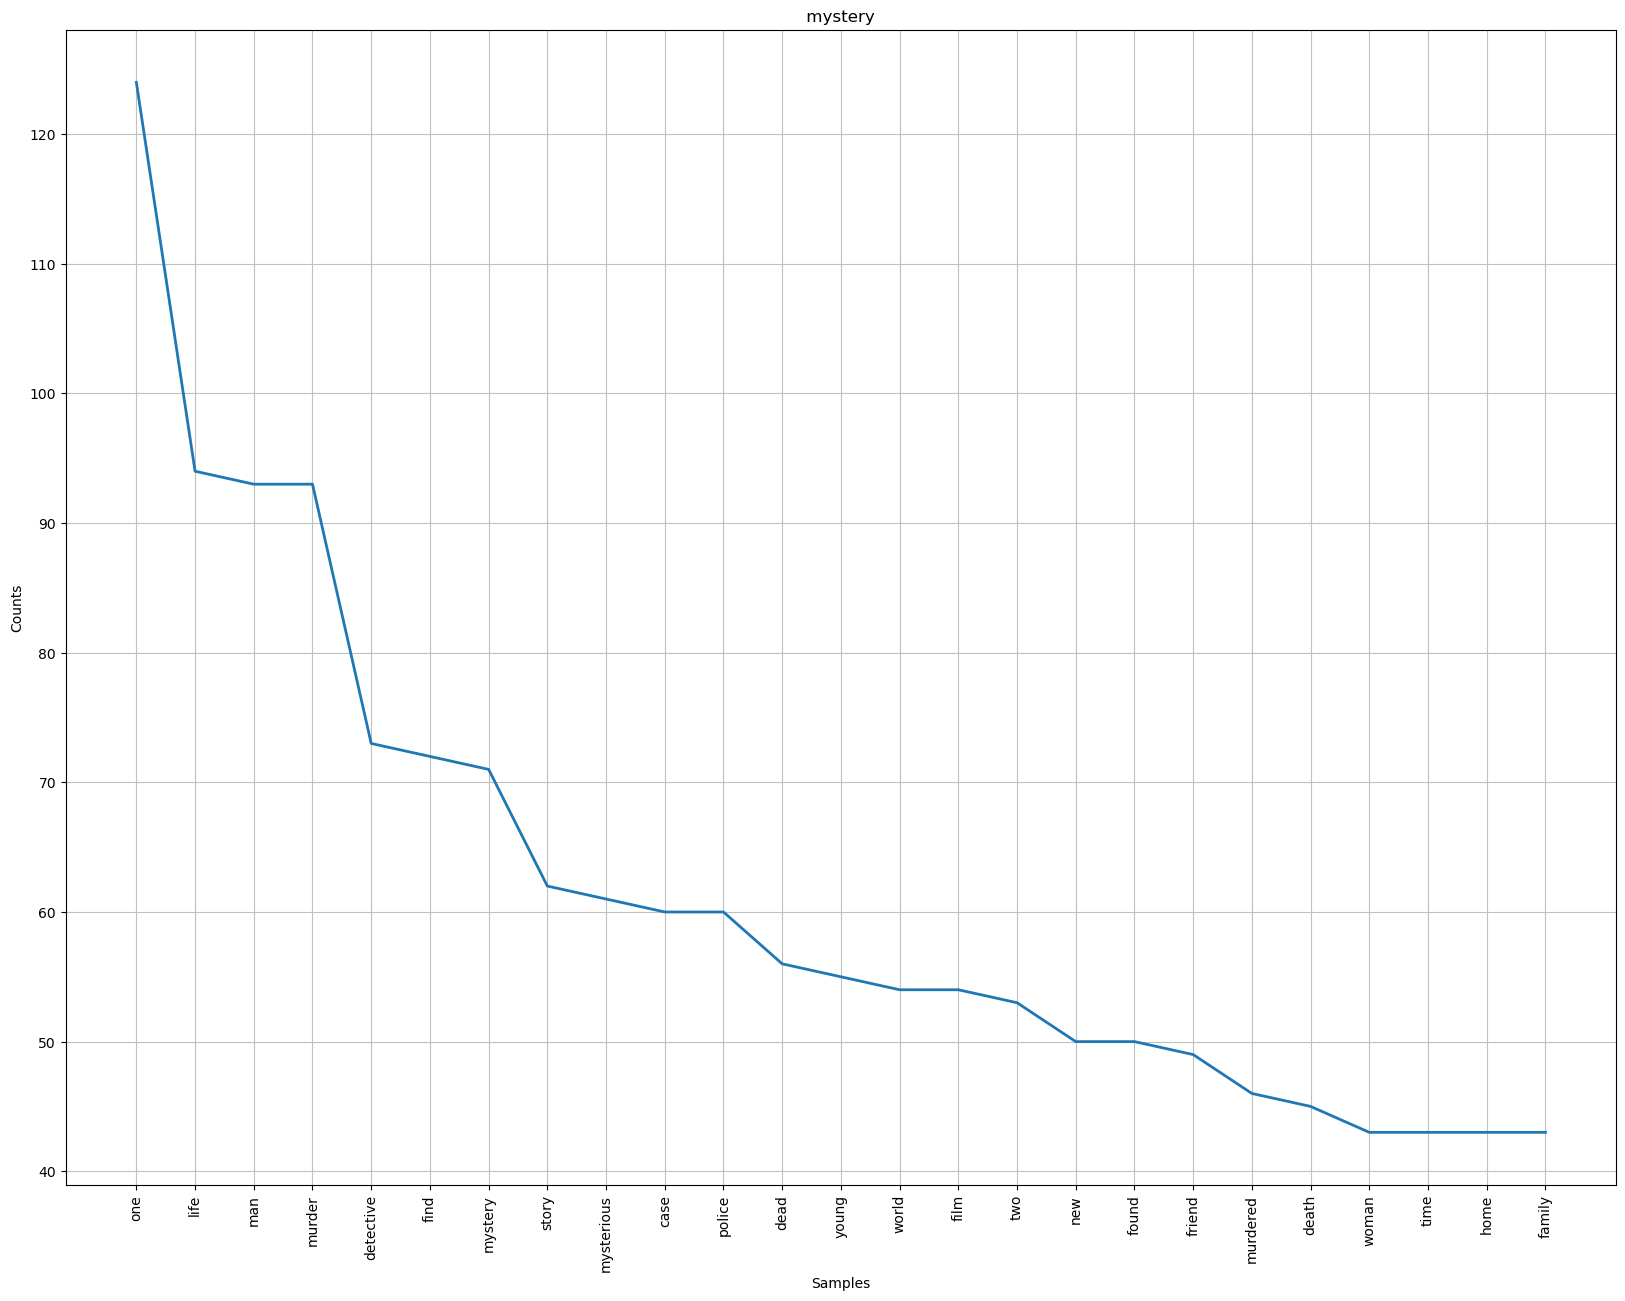

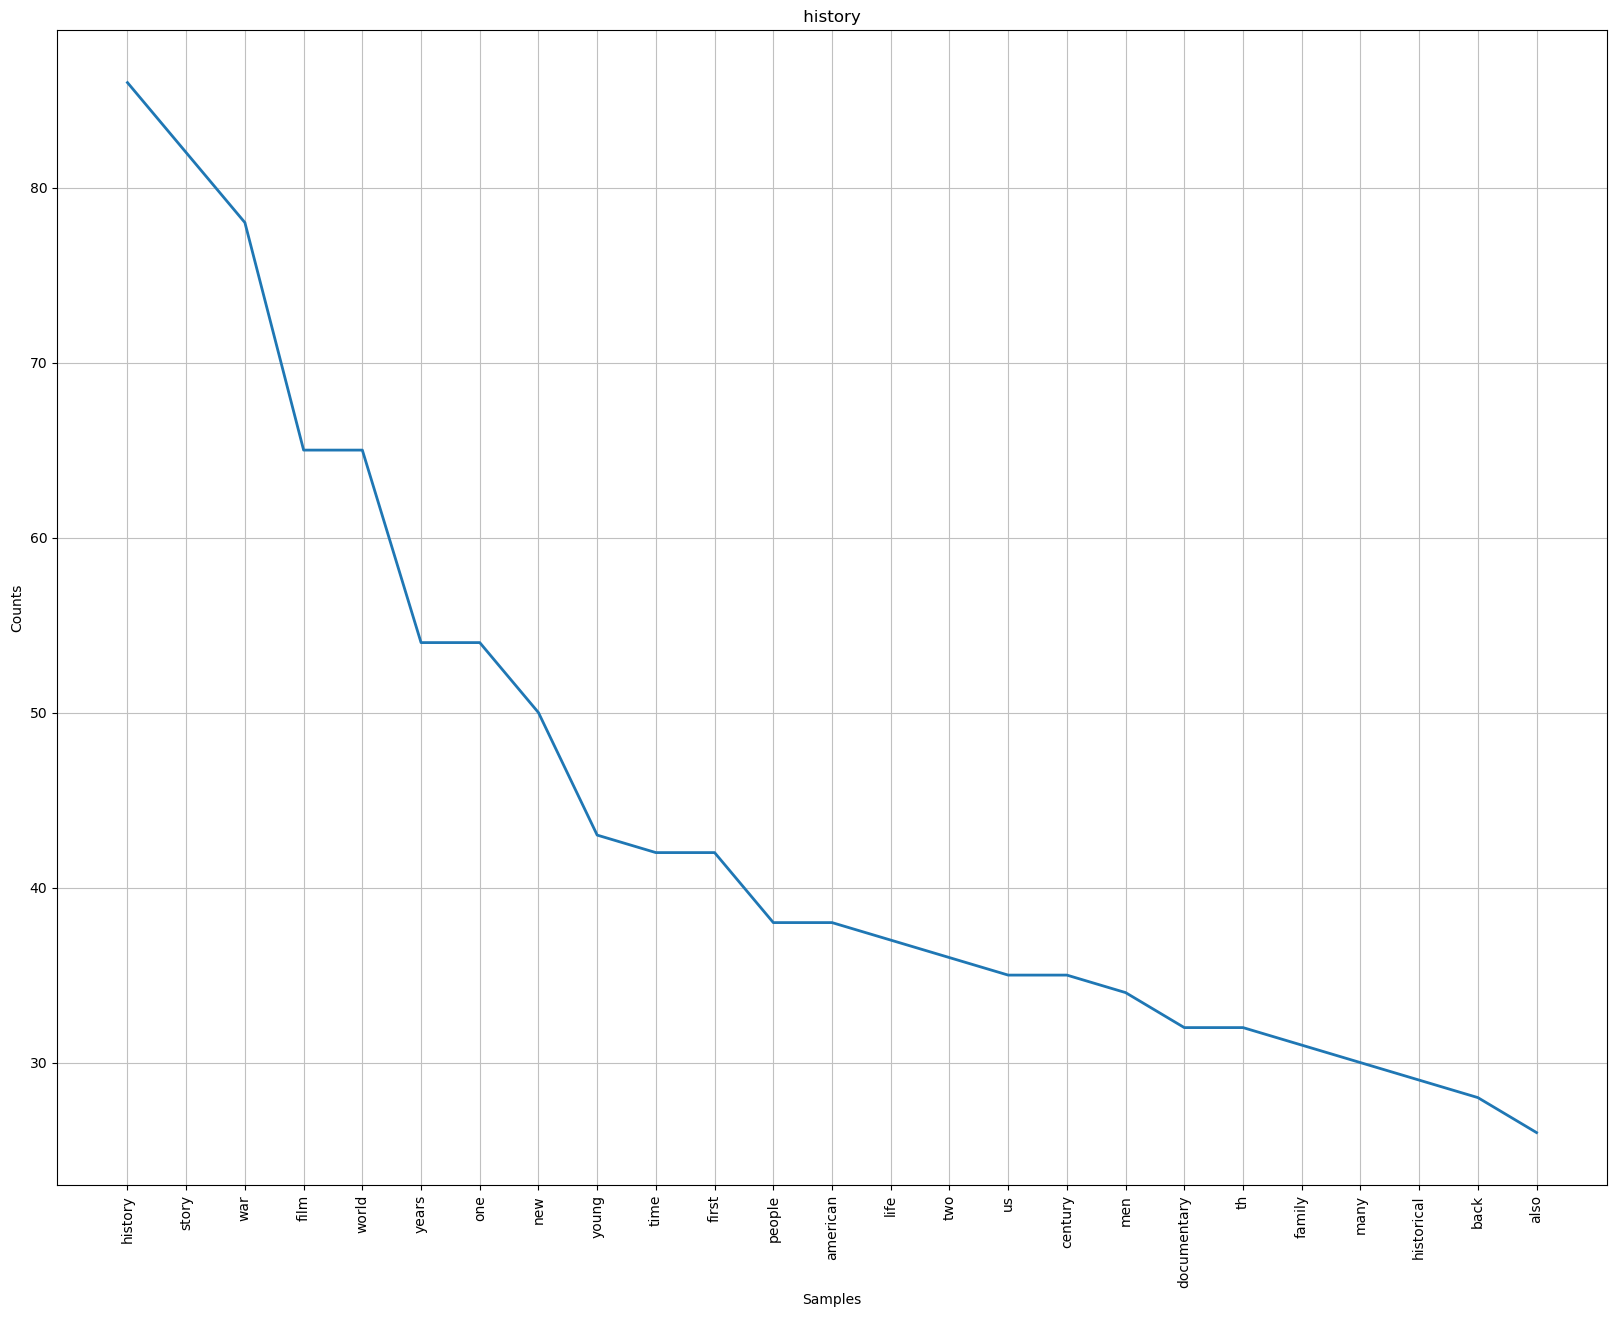

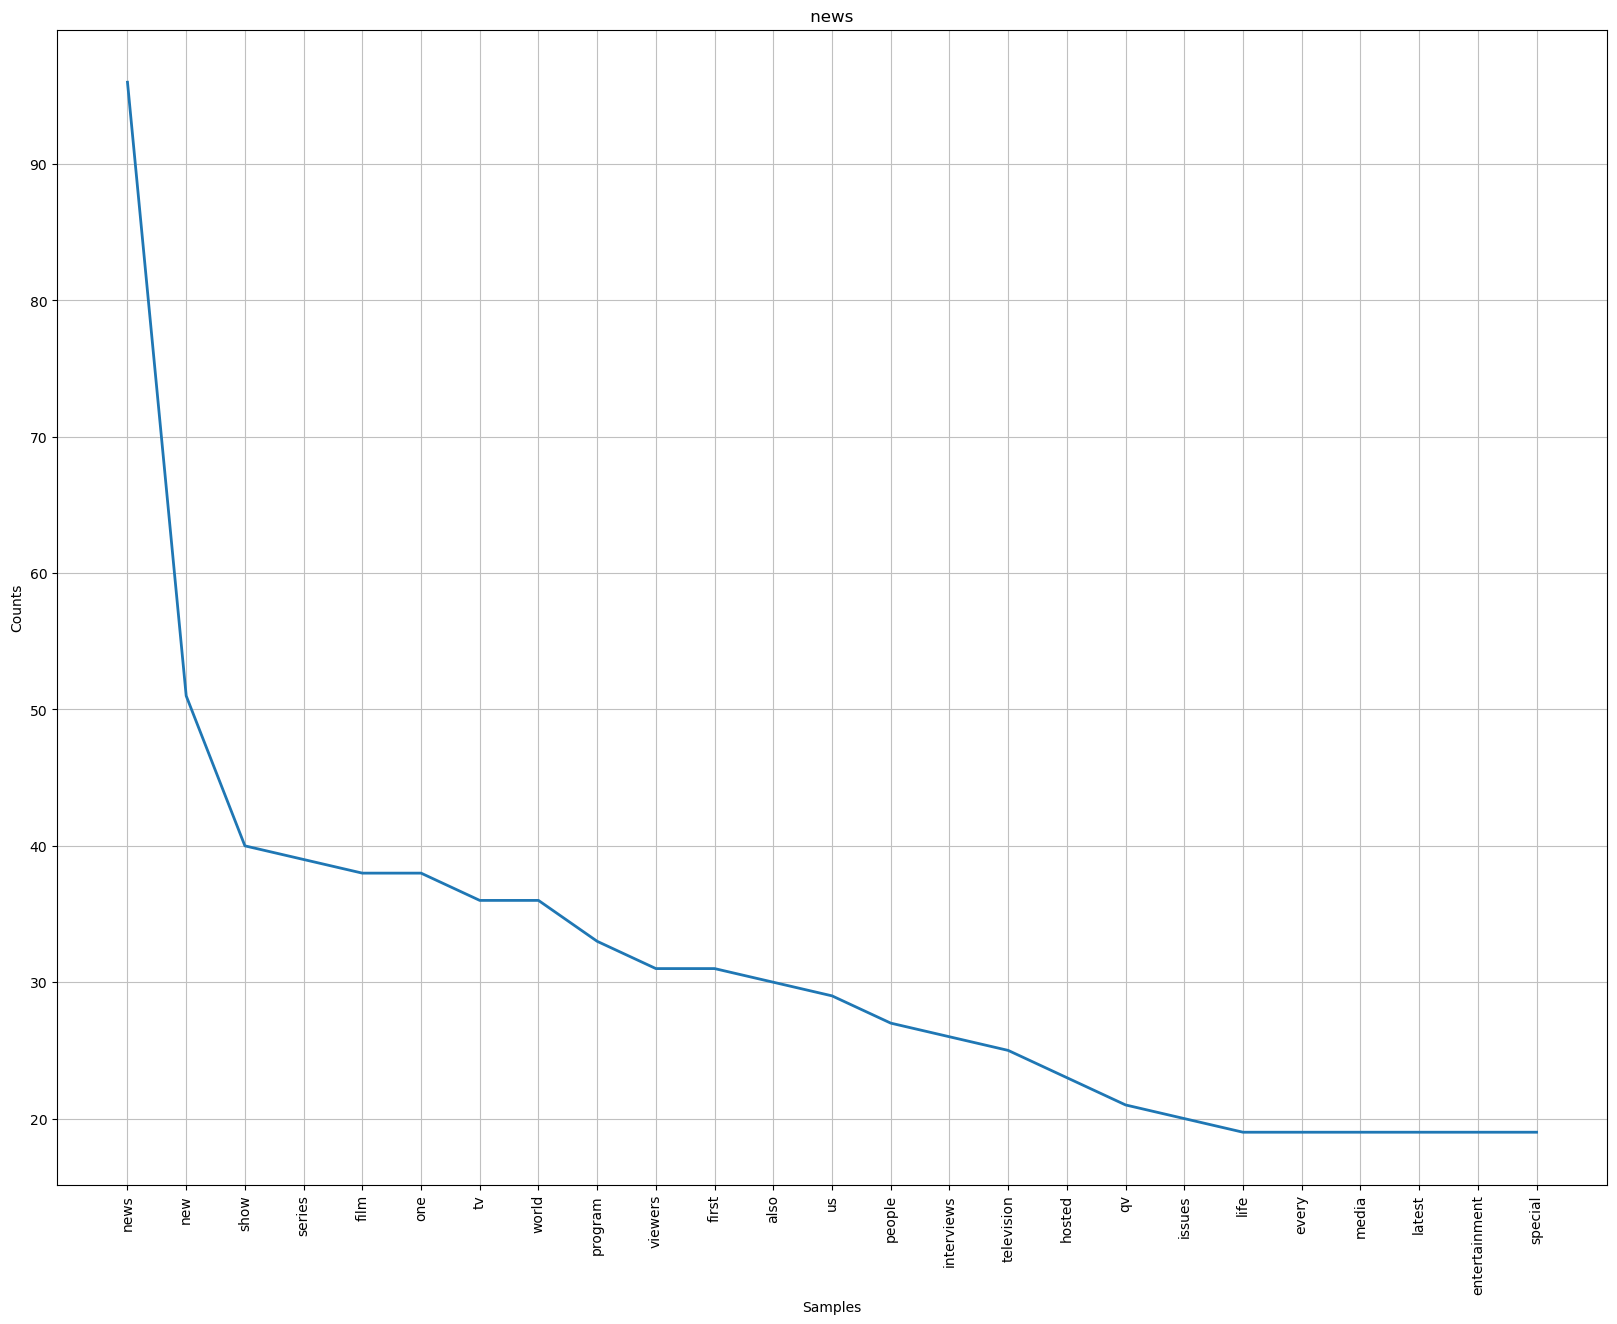

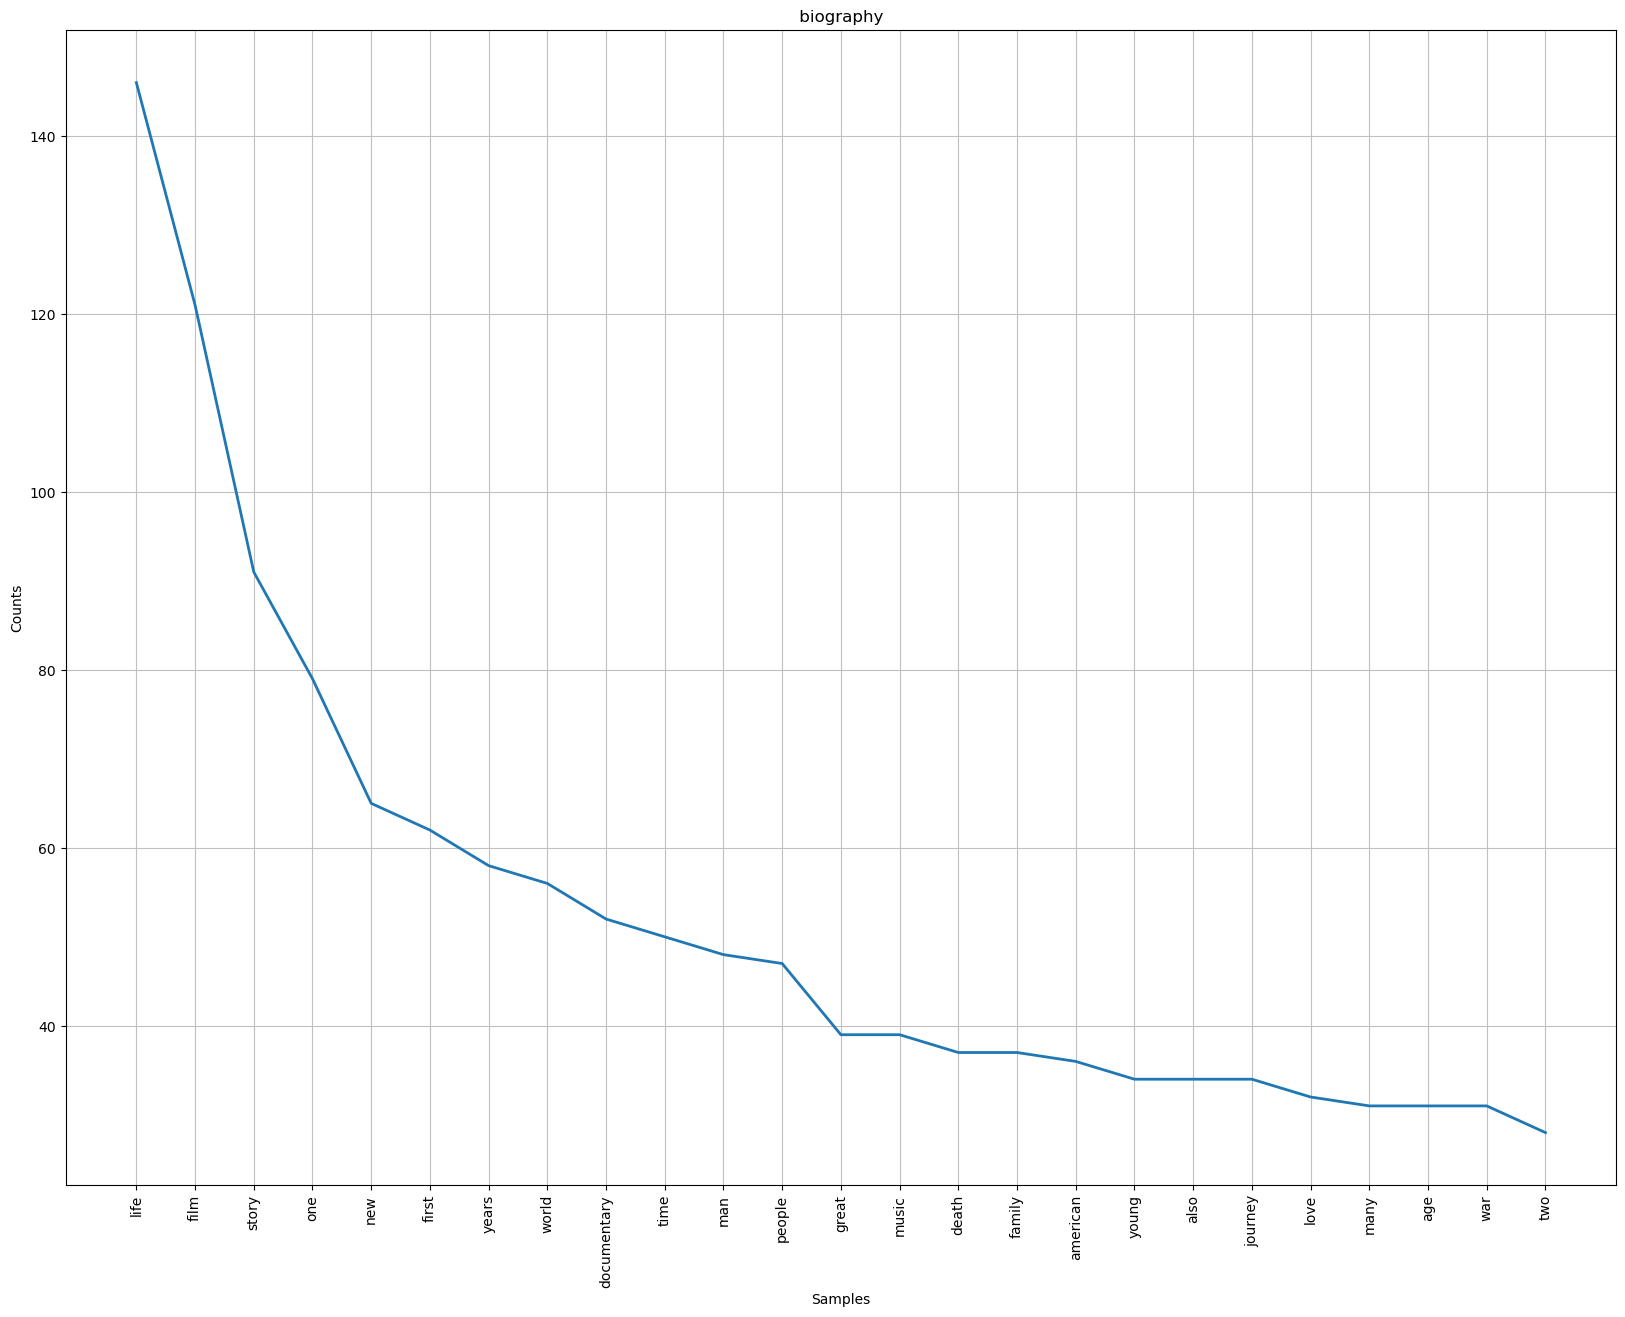

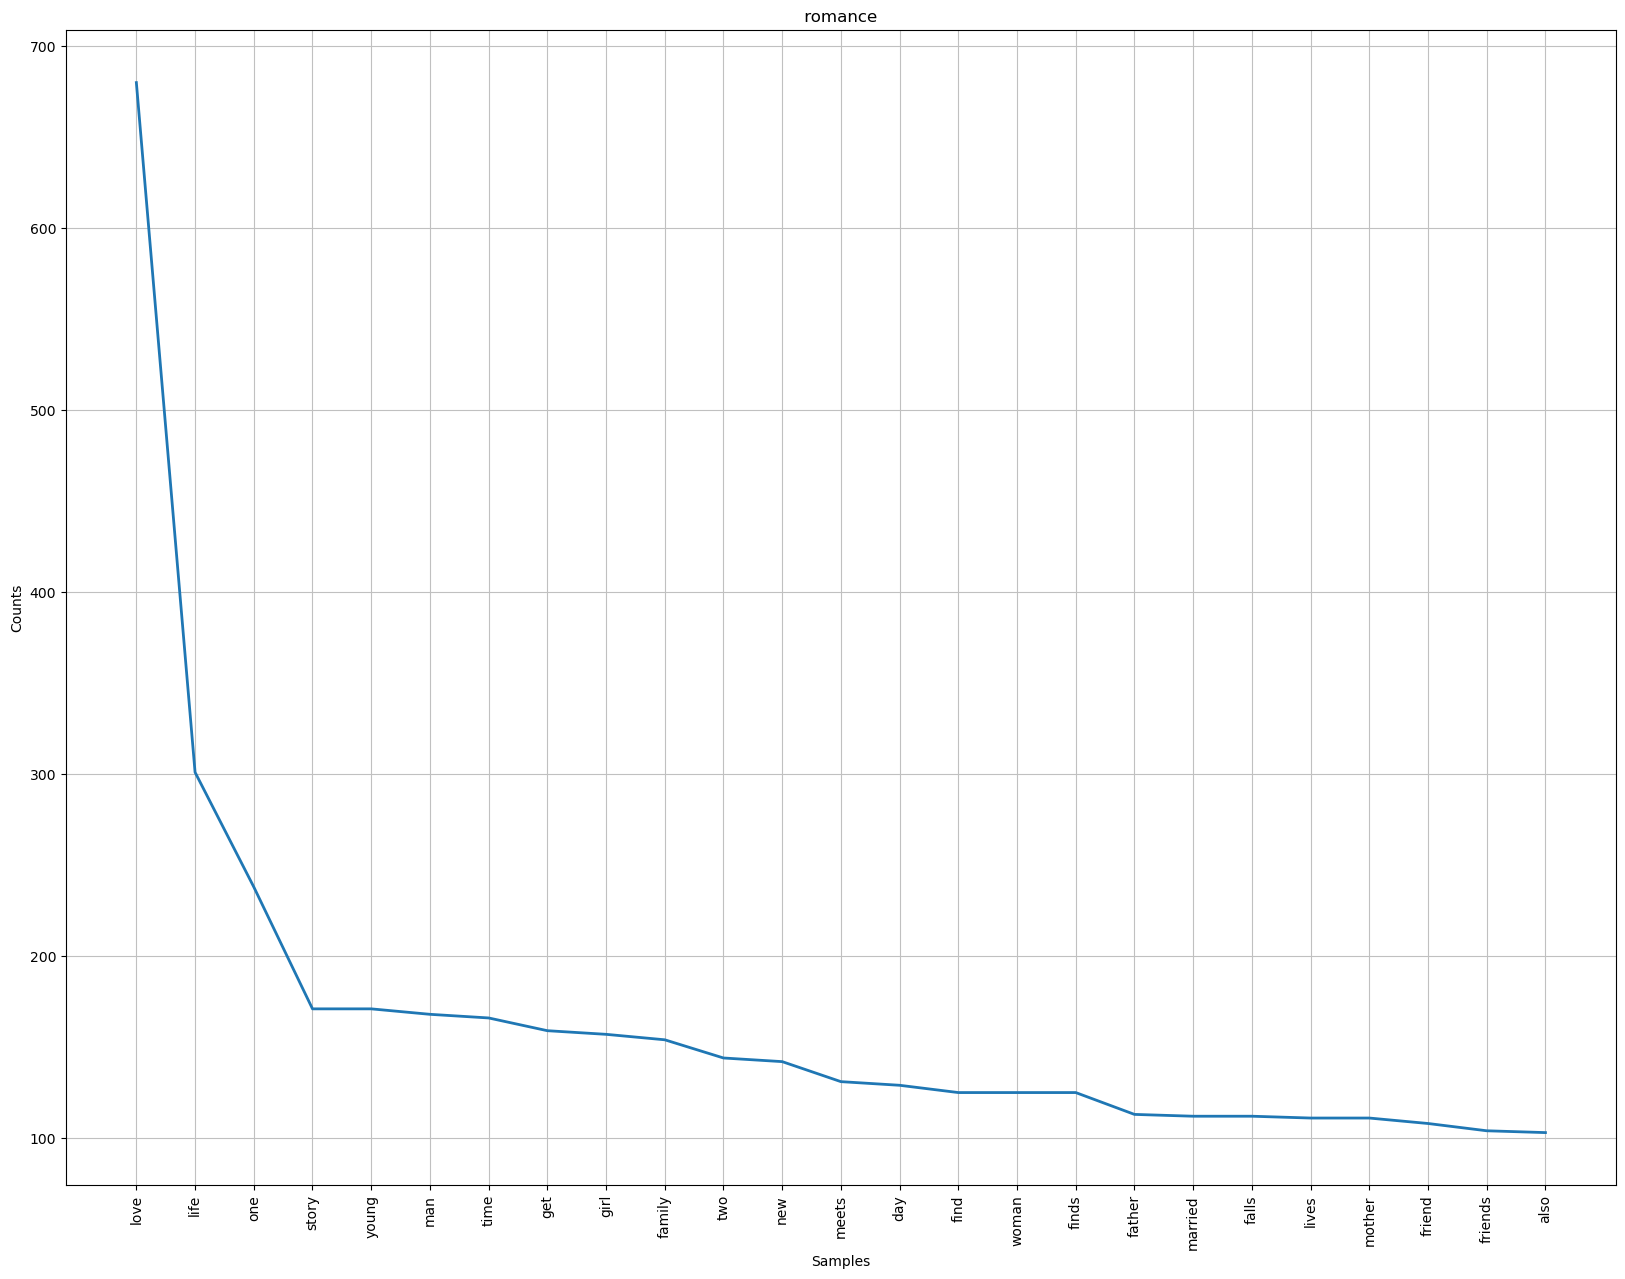

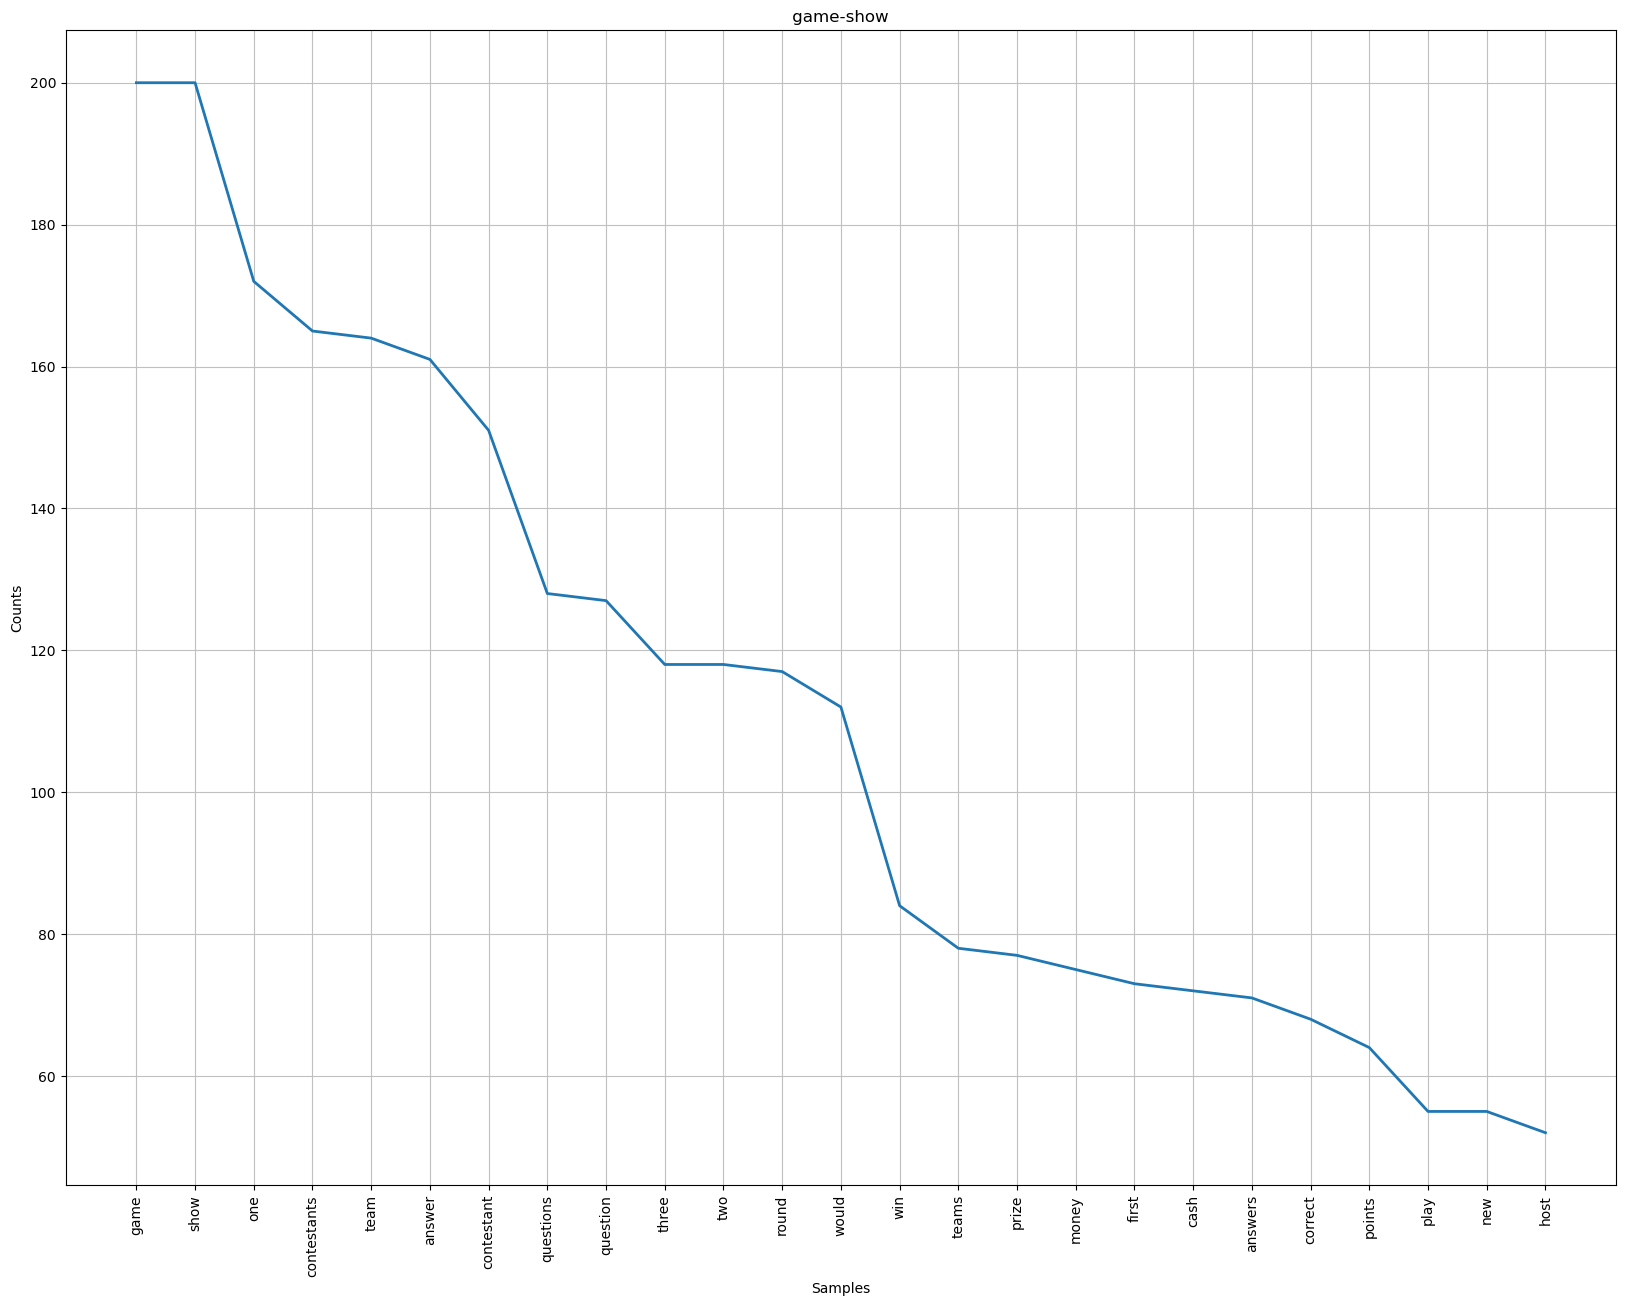

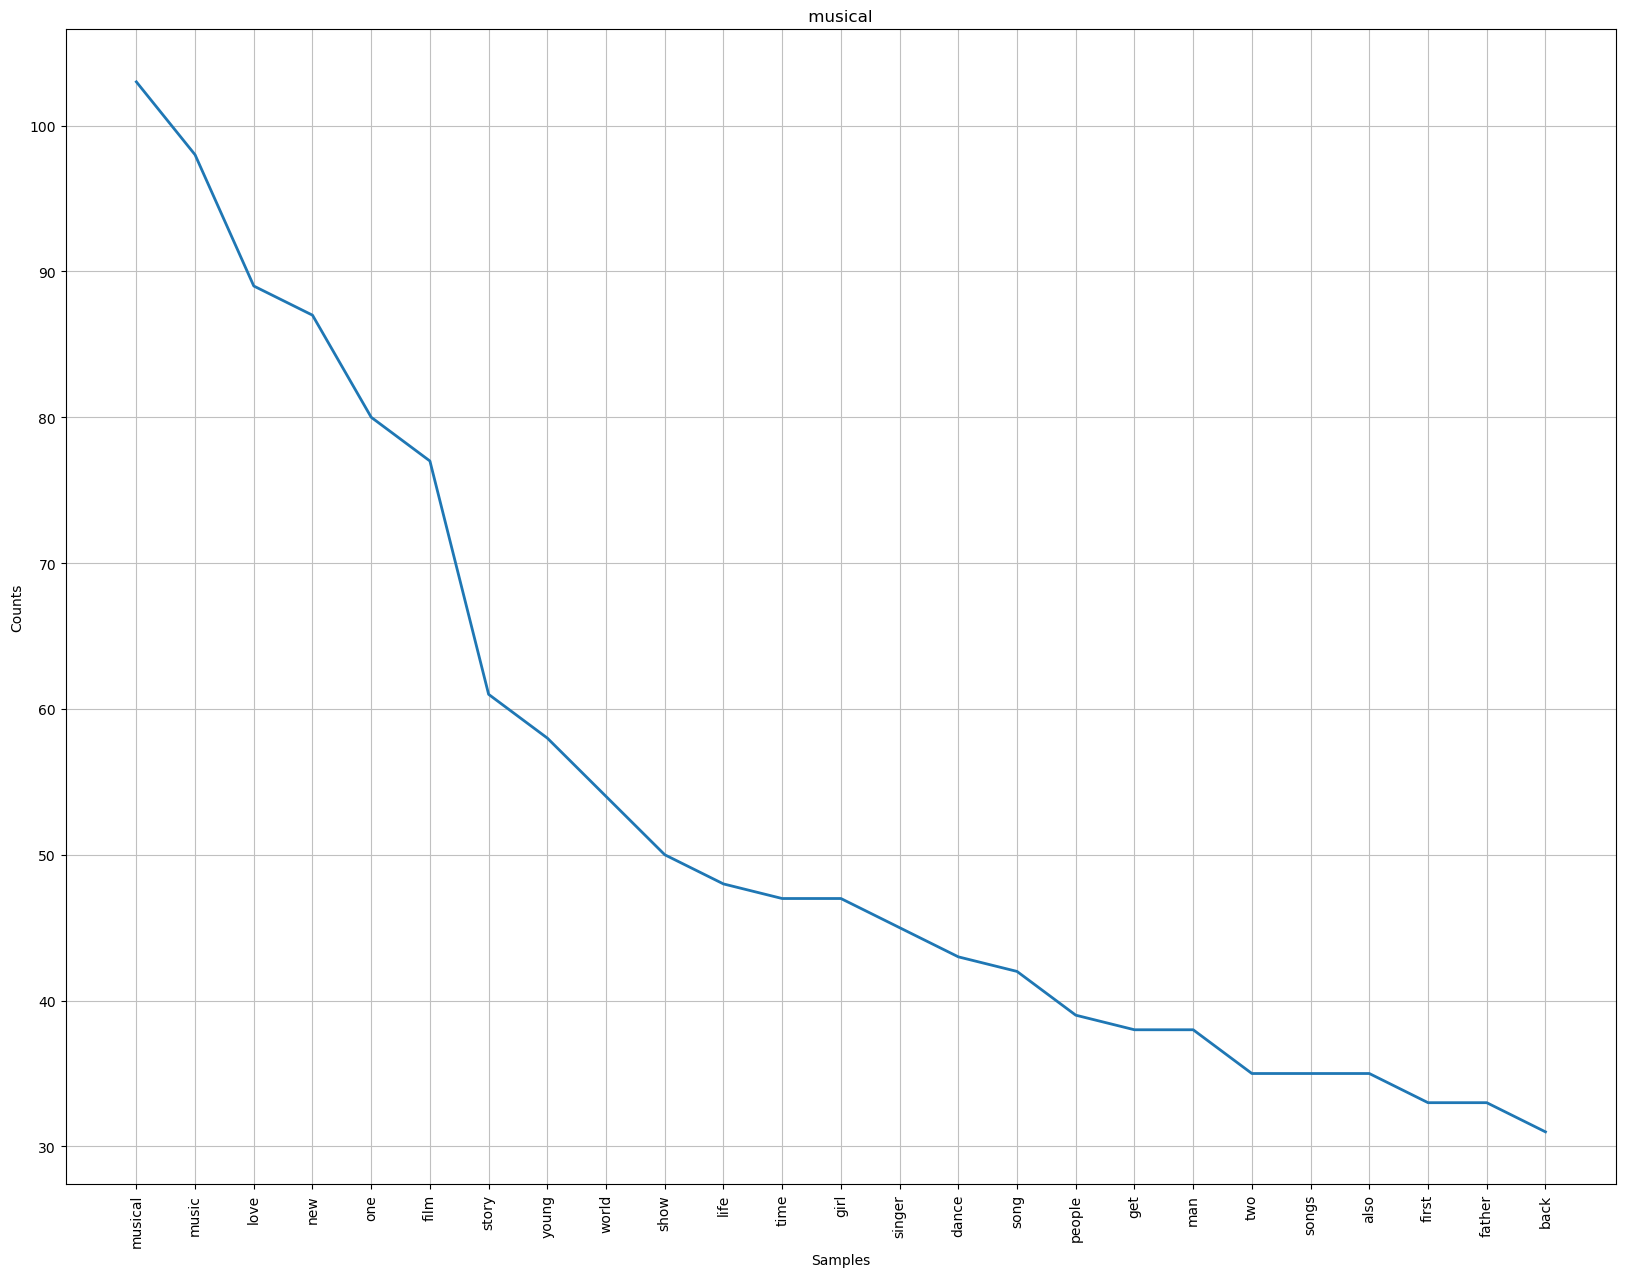

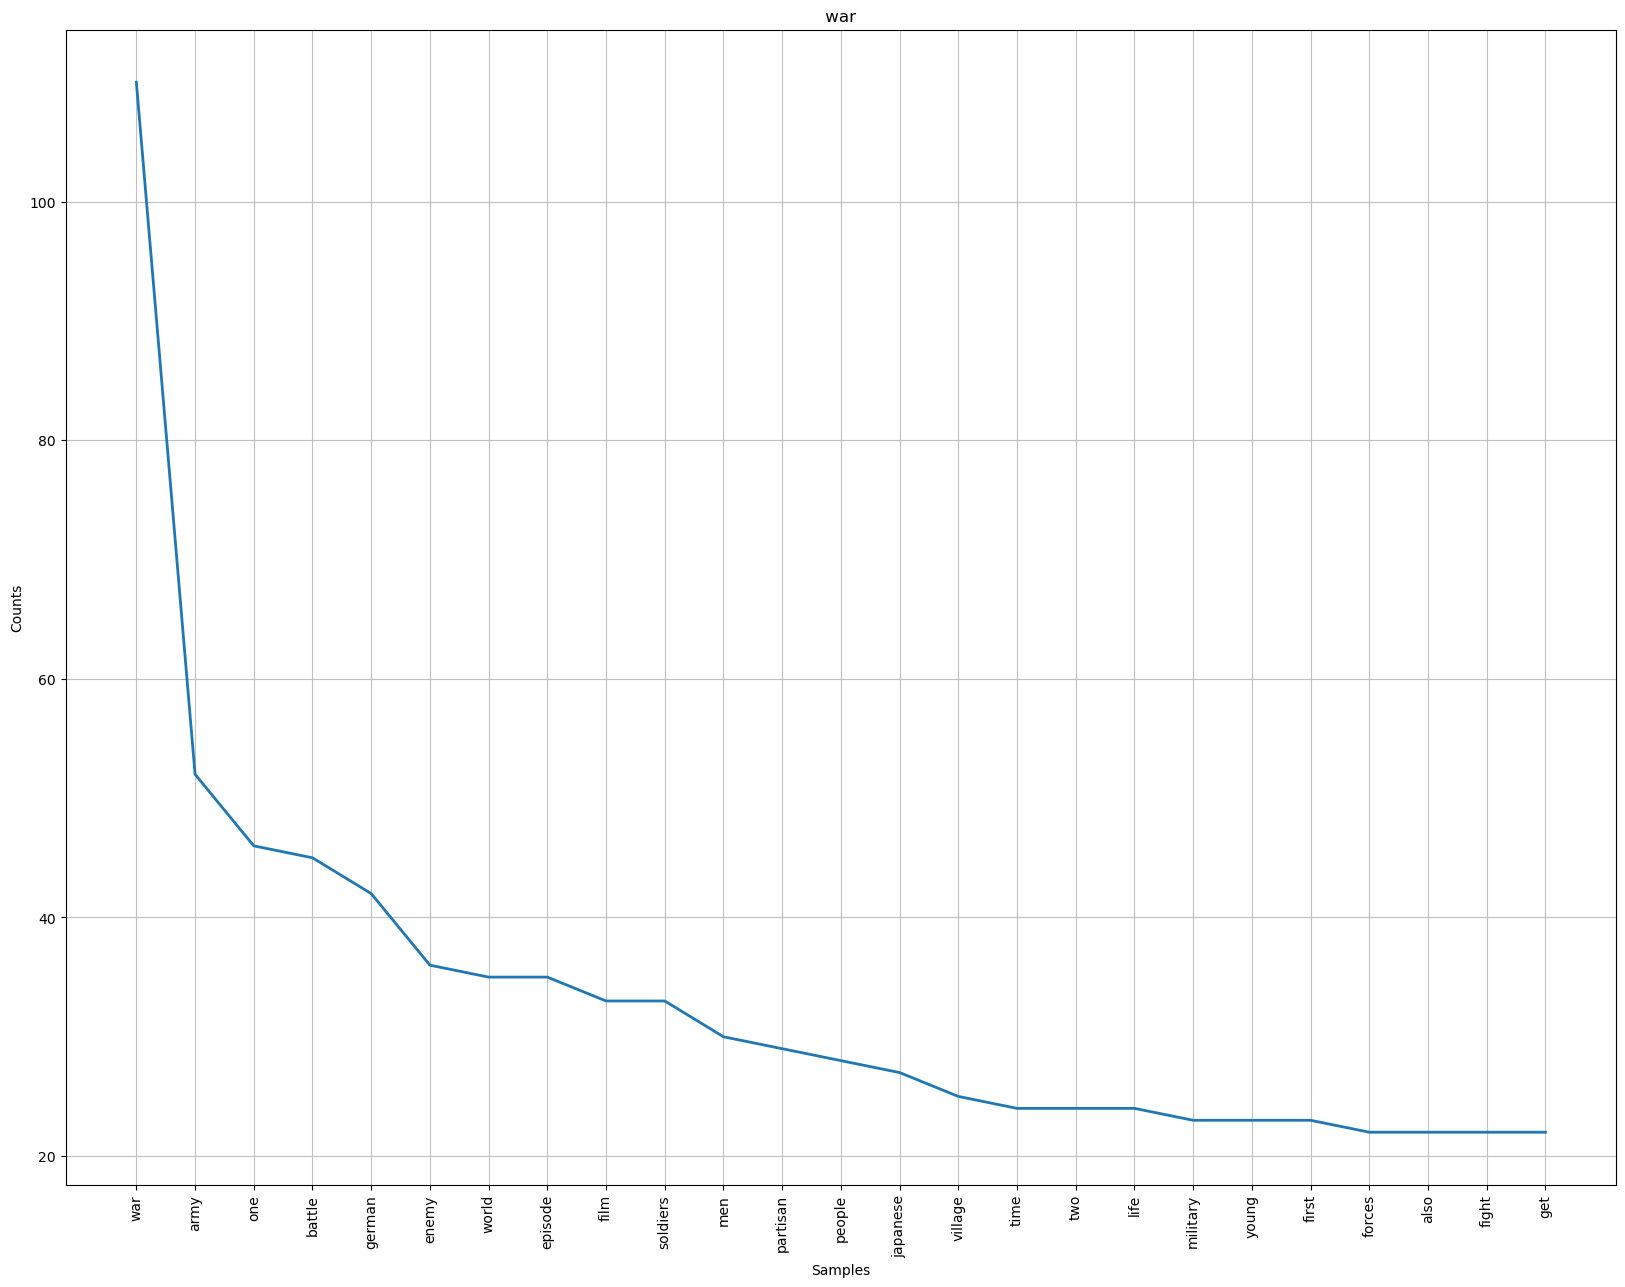

In [51]:
genres=movies.genre.unique().tolist()

for genre in genres:
    gen_data=movies.description.loc[movies.genre==genre]
    desc = gen_data.str.cat(sep=' ')
    #function to split text into word
    tokens = word_tokenize(desc)
    vocabulary = set(tokens)
    frequency_dist = nltk.FreqDist(tokens)
    plt.figure(figsize=(20,15))
    frequency_dist.plot(25,title=genre)

In [52]:
def voc_generator(n):
    vocabulary=set()
    genres=movies.genre.unique().tolist()
    for genre in genres:
        gen_data=movies.description.loc[movies.genre==genre]
        desc = gen_data.str.cat(sep=' ')
        tokens = word_tokenize(desc)
        genre_voc = set(tokens)
        frequency_dist = nltk.FreqDist(tokens)
        comm_genre_voc=set([tuple[0] for tuple in frequency_dist.most_common(n)])
        vocabulary=vocabulary.union(comm_genre_voc)
    return sorted(vocabulary)

In [53]:
X = movies.description
y = movies.genre

#Stratified sampling based on the category 'genre' for splitting data to preserve the original proportions in the
#train and test sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) #Determines splitting characteristics
for train_index, test_index in split.split(movies, movies["genre"]): 
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Example vocabulary generator function
def voc_generator(max_features):
    return [f'word{i}' for i in range(max_features)]

# Modify the model_generator function
def model_generator(X_train, y_train, X_test, y_test, vectorizer=CountVectorizer(vocabulary=voc_generator(100)), model=MultinomialNB()):
    model_pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', model),
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    vname = str(model_pipeline.get_params()['vectorizer']).split('(')[0]
    cname = str(model_pipeline.get_params()['classifier'])
    print('vectorizer: ' + vname)
    print('classifier: ' + cname)
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)
    fig, ax = plt.subplots(figsize=(15, 15))
    disp.plot(include_values=False, xticks_rotation='vertical', ax=ax)
    plt.title(vname + ' ' + cname)
    plt.show()
    return {'vectorizer': vectorizer, 'classifier': model_pipeline}

voc. size: 500
vectorizer: CountVectorizer
classifier: MultinomialNB()
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

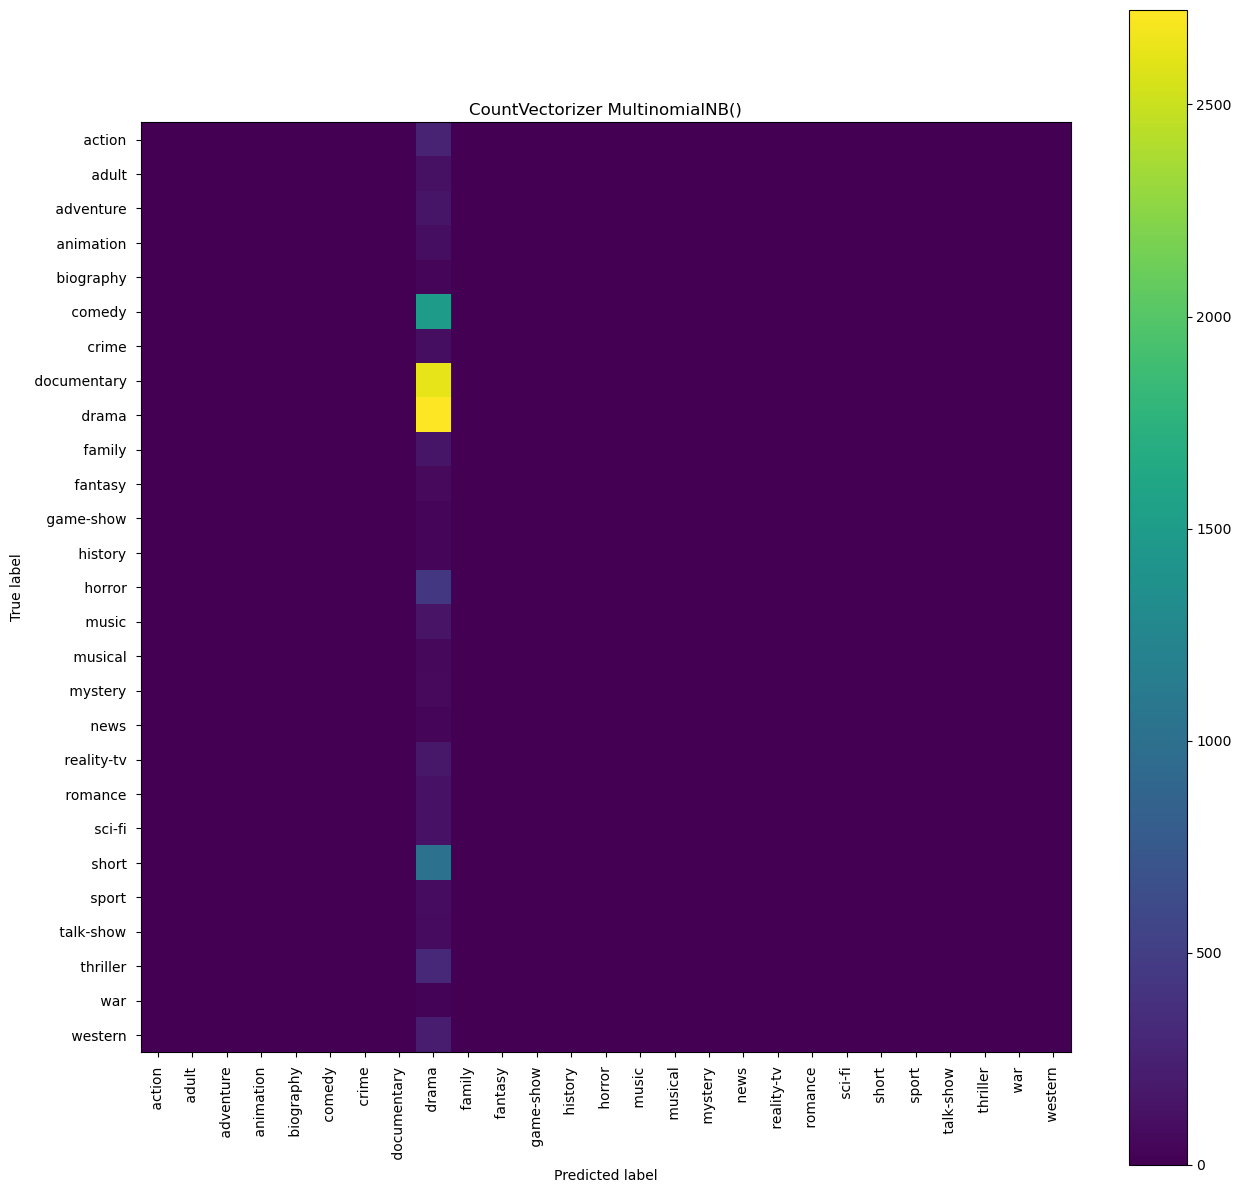

voc. size: 500
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

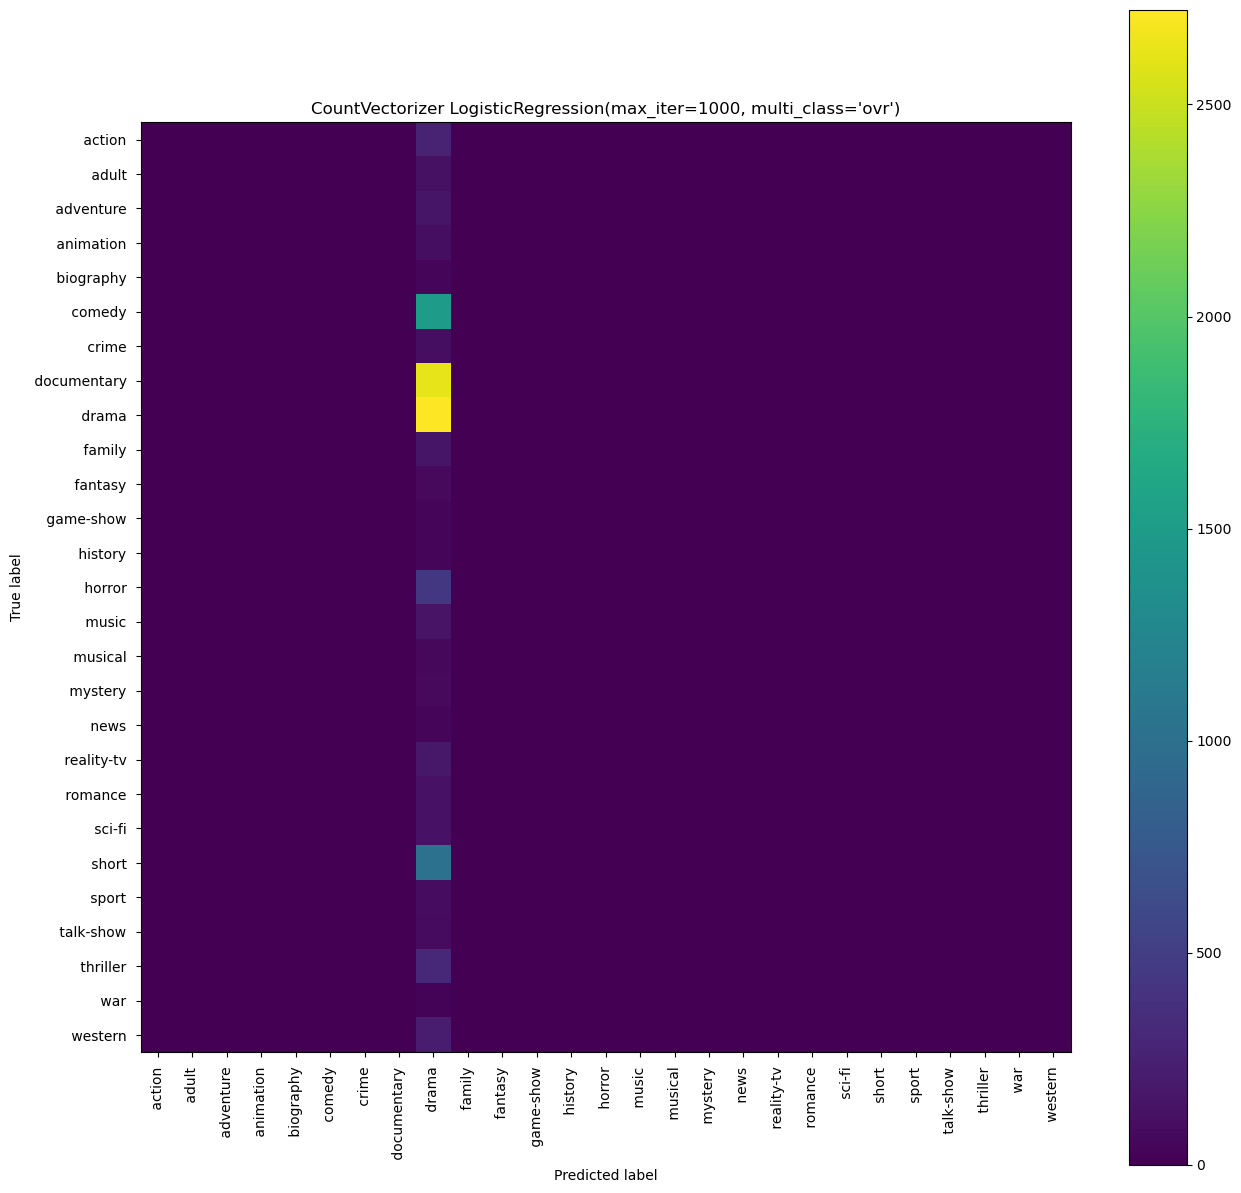

voc. size: 500
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

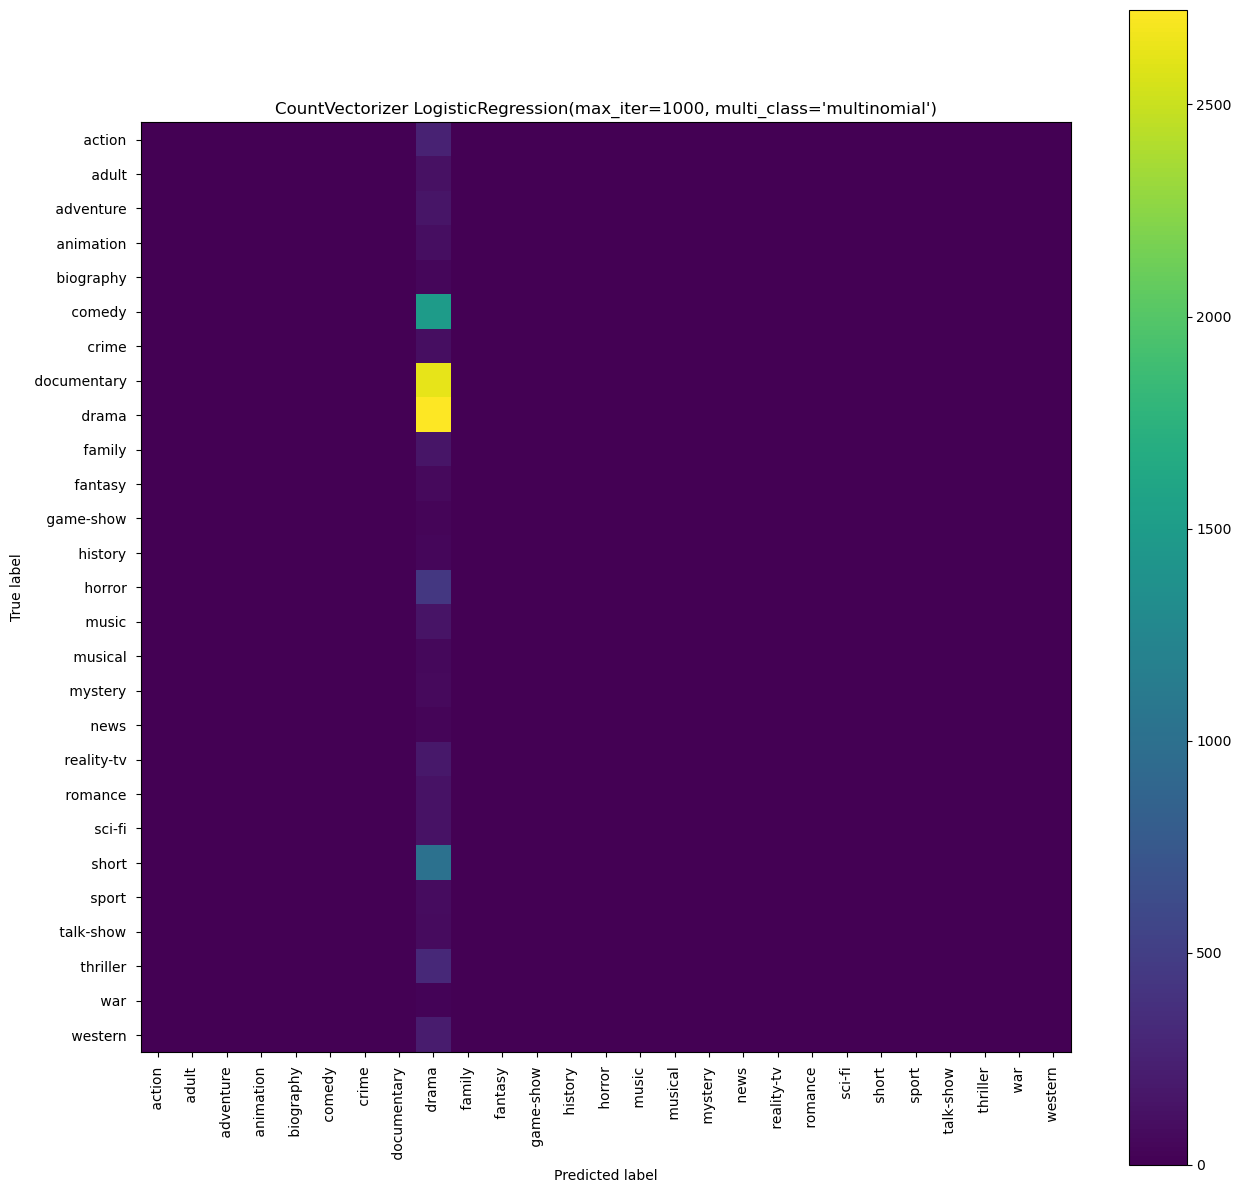

voc. size: 1000
vectorizer: CountVectorizer
classifier: MultinomialNB()
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

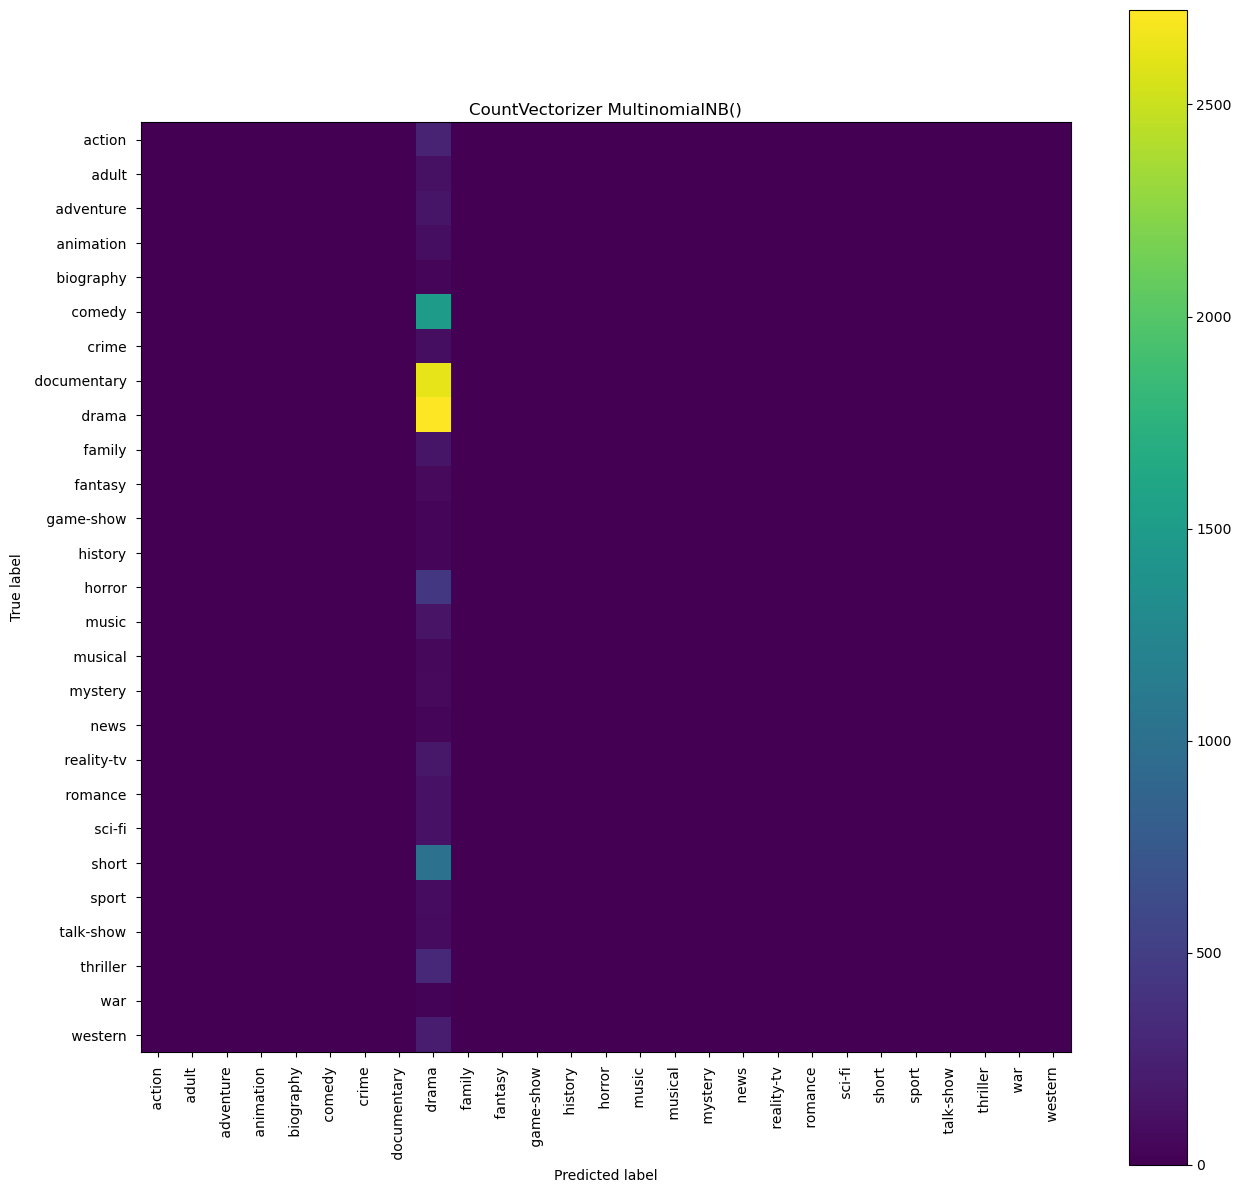

voc. size: 1000
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

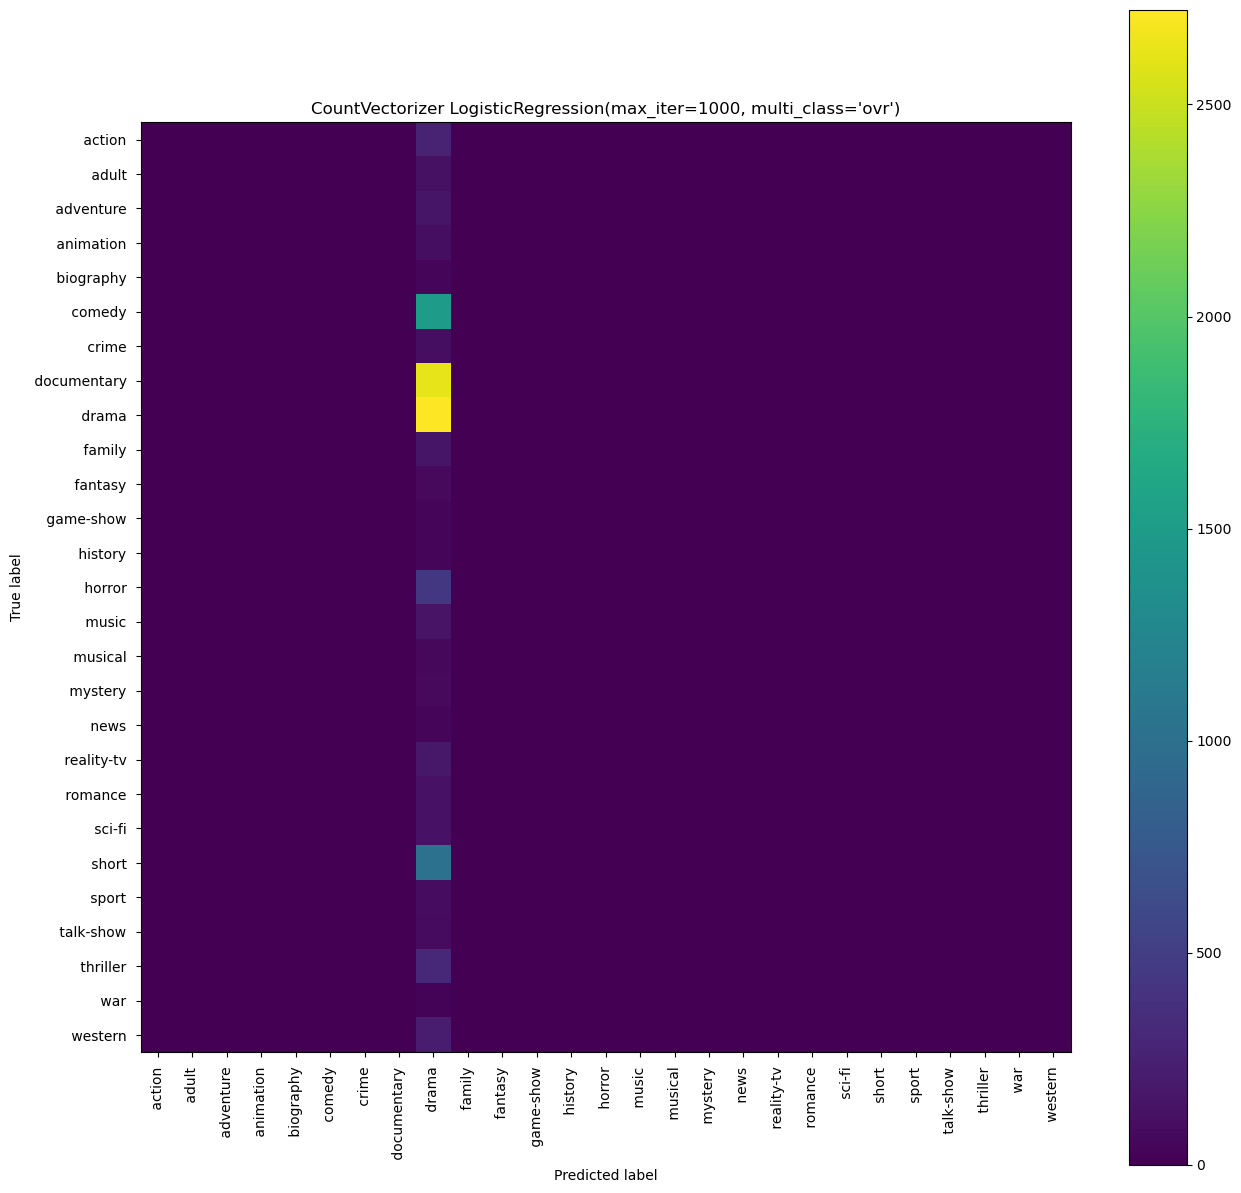

voc. size: 1000
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

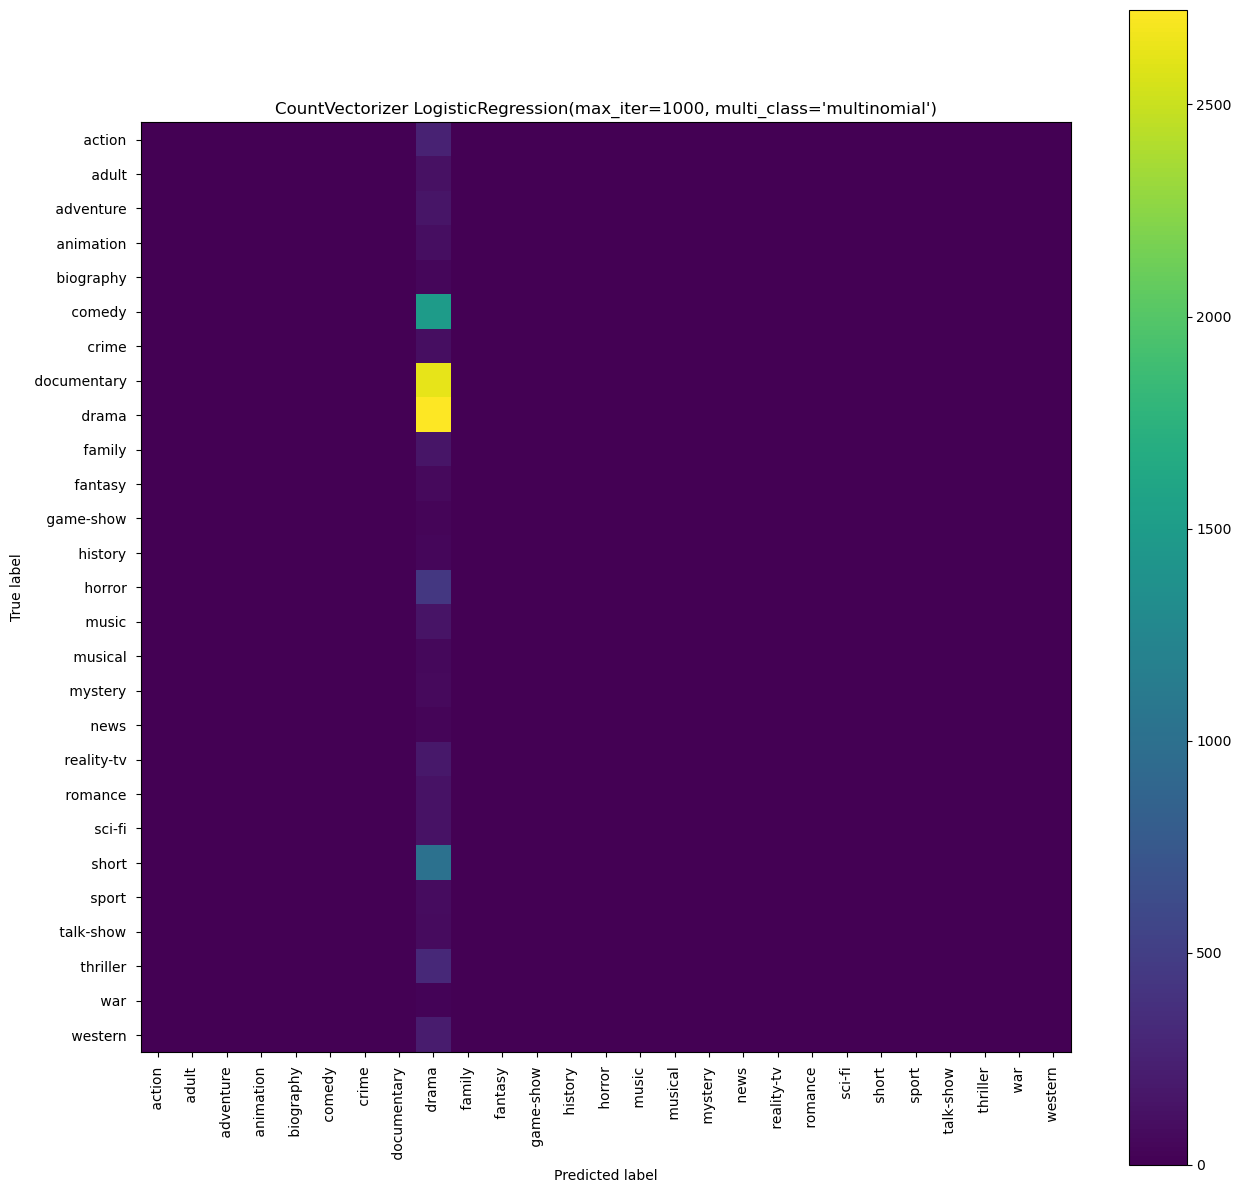

voc. size: 1500
vectorizer: CountVectorizer
classifier: MultinomialNB()
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

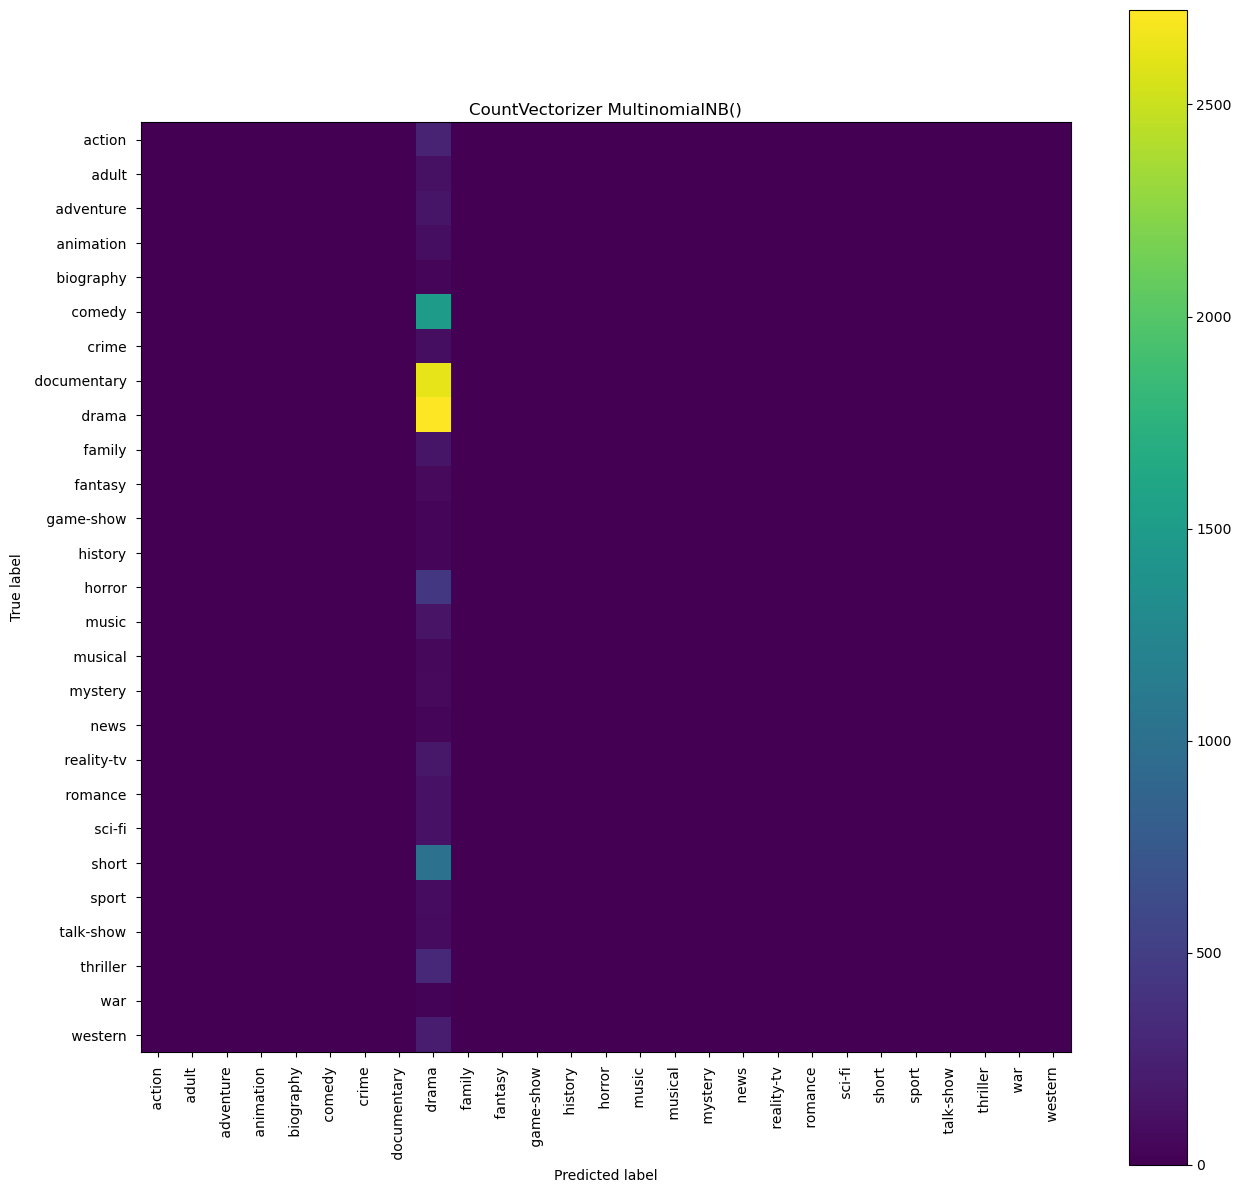

voc. size: 1500
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

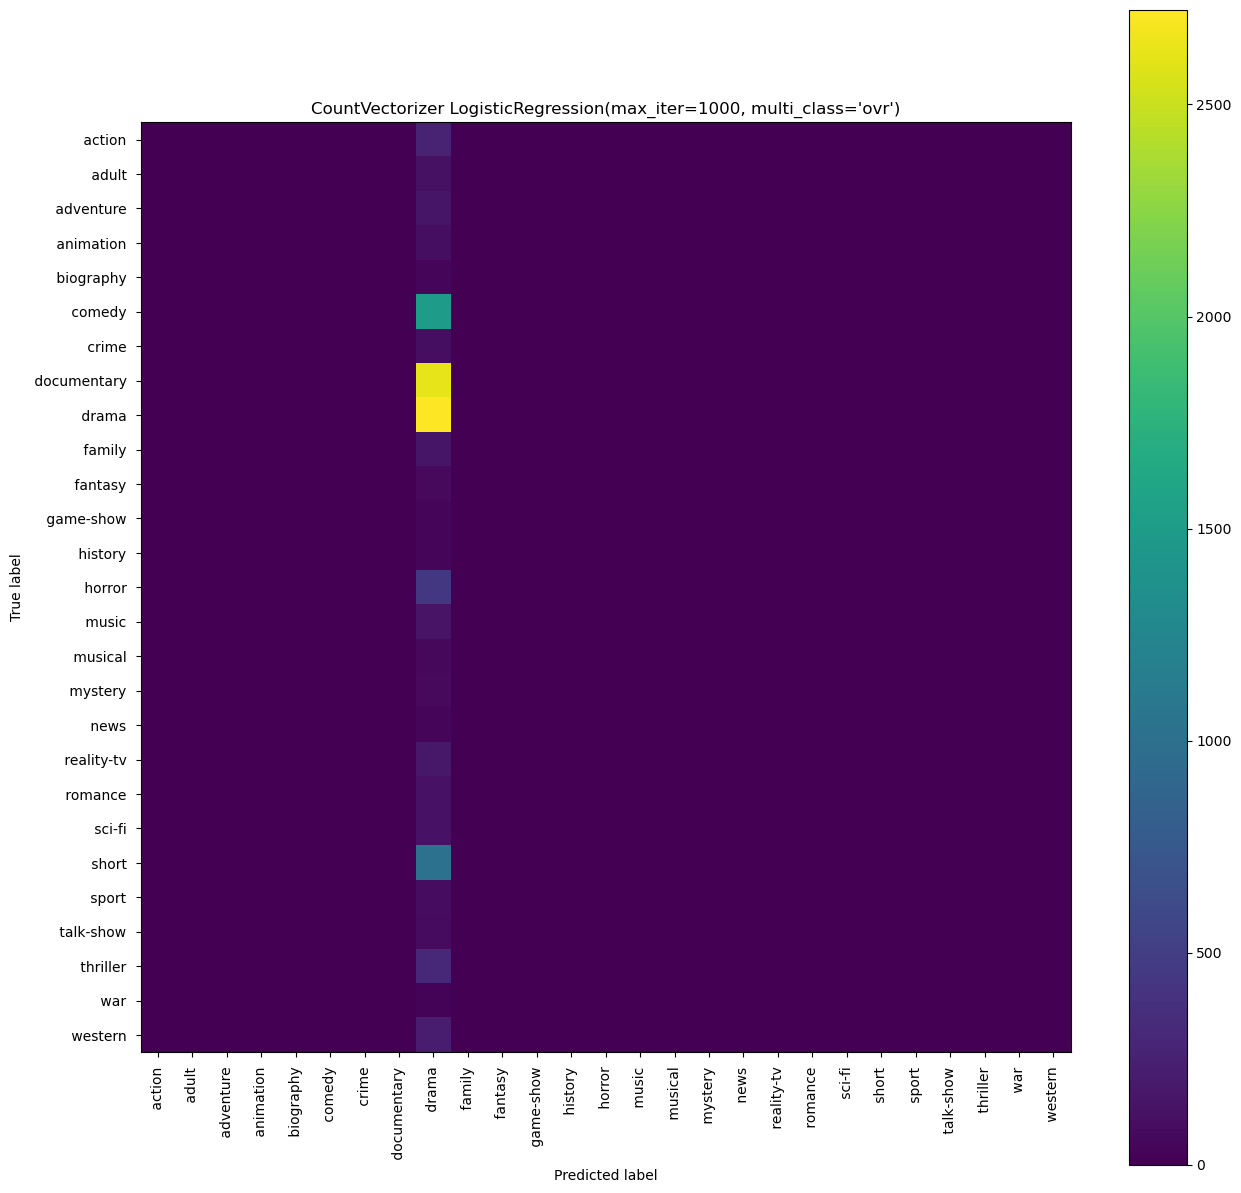

voc. size: 1500
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

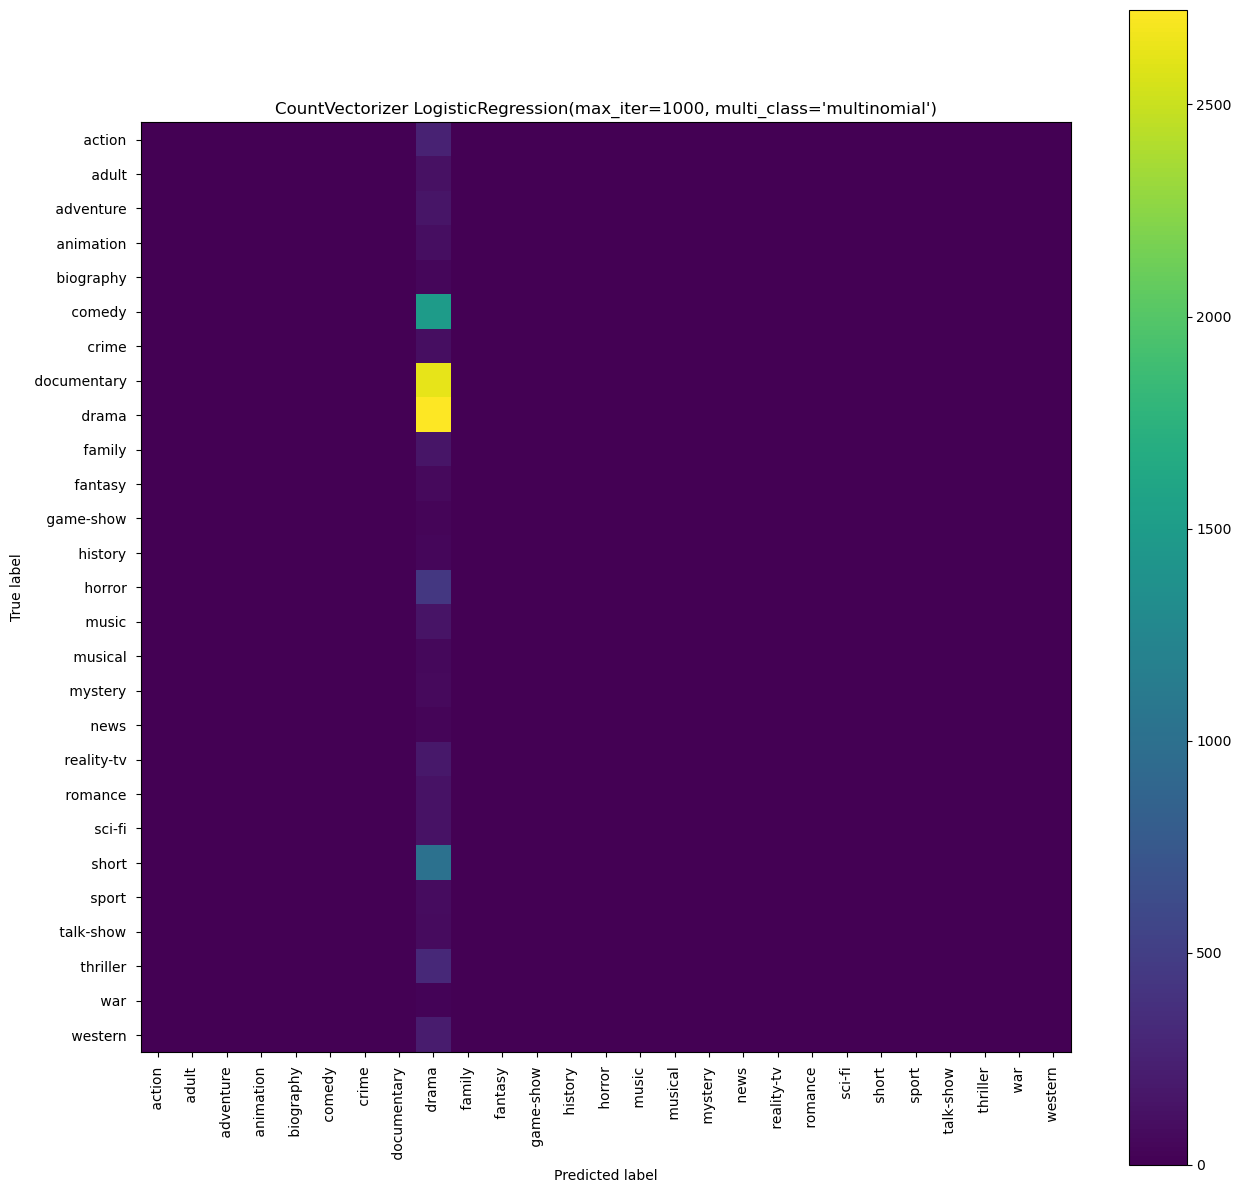

voc. size: 2000
vectorizer: CountVectorizer
classifier: MultinomialNB()
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

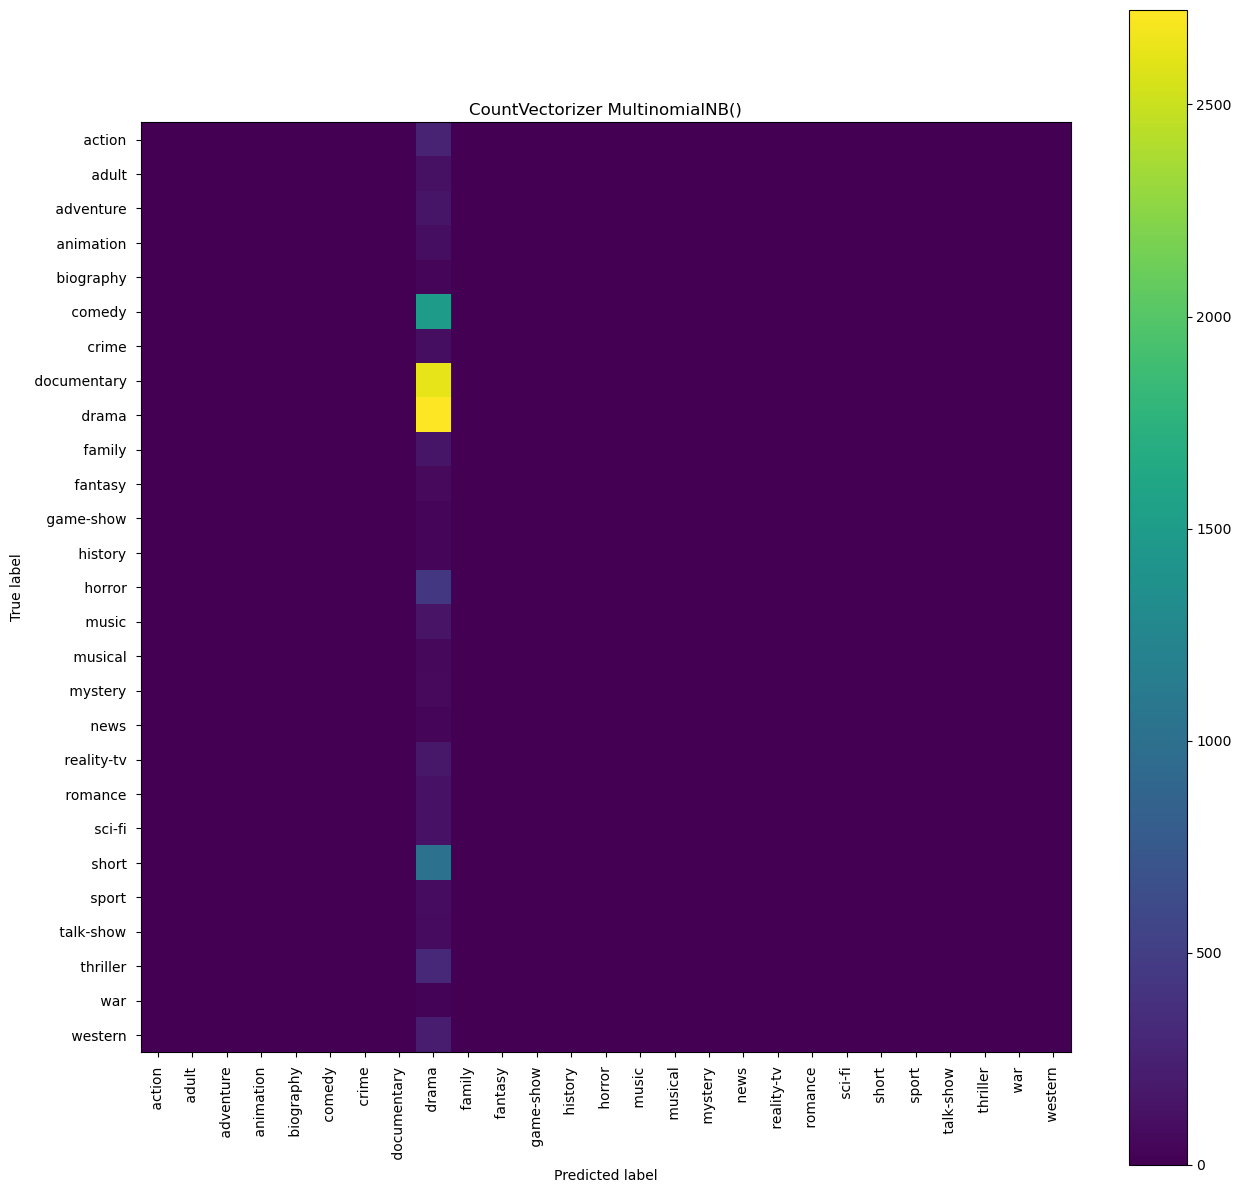

voc. size: 2000
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

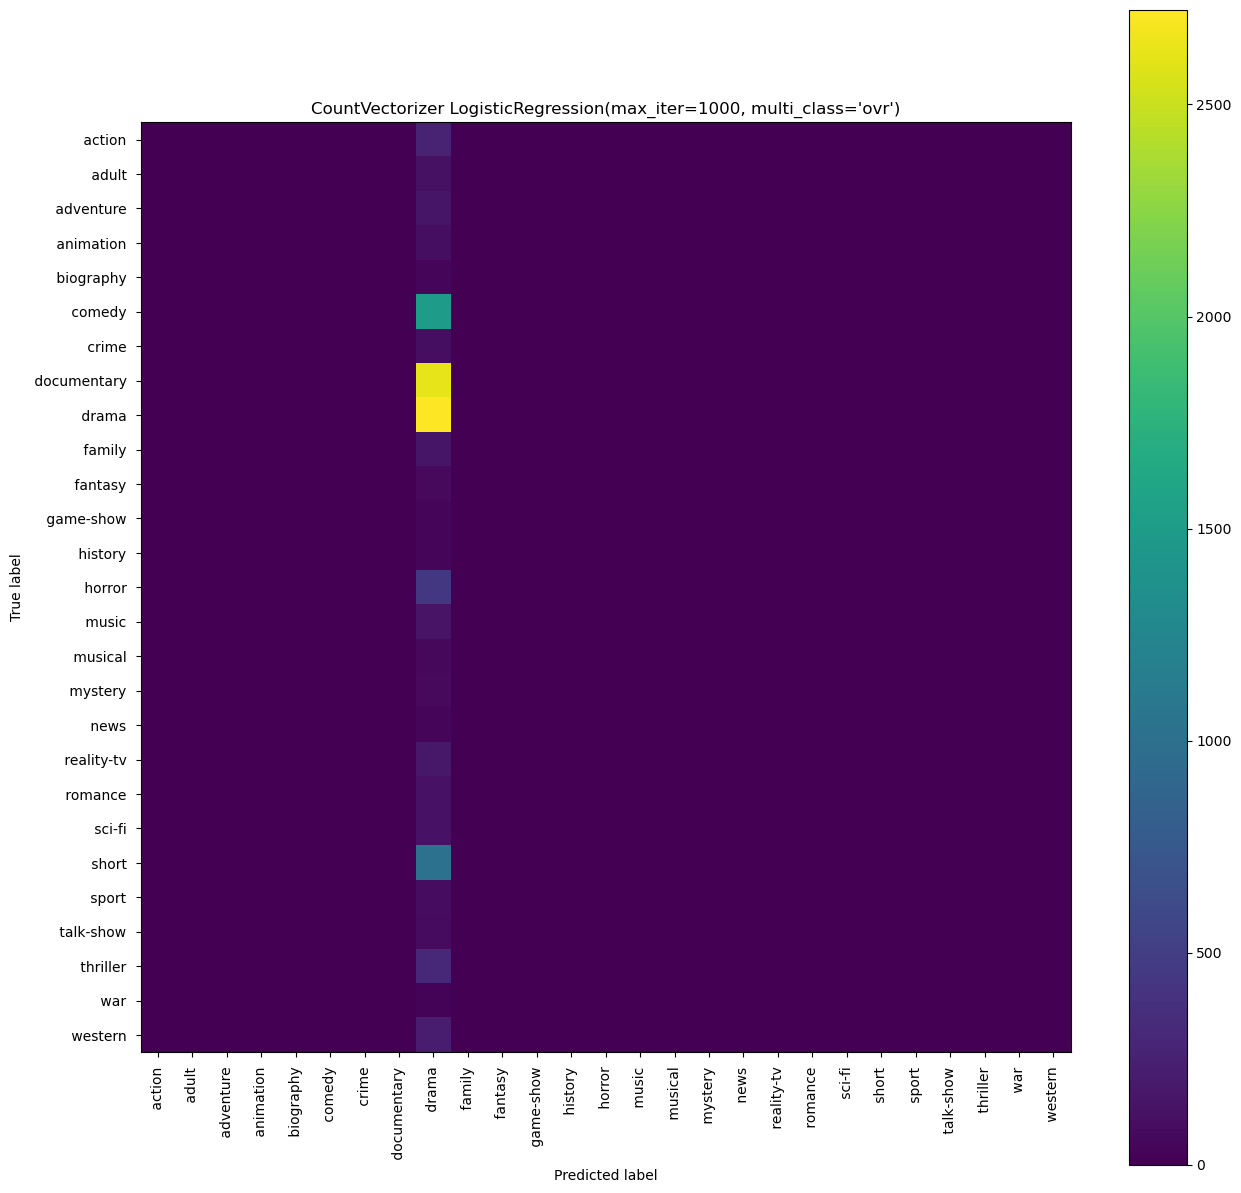

voc. size: 2000
vectorizer: CountVectorizer
classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
accuracy 0.25112976113621693


C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gugap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.00      0.00      0.00      1490
       crime        0.00      0.00      0.00       101
 documentary        0.00      0.00      0.00      2619
       drama        0.25      1.00      0.40      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        0.00      0.00      0.00        39
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       441
       music        0.00      0.00      0.00       146
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        64
        n

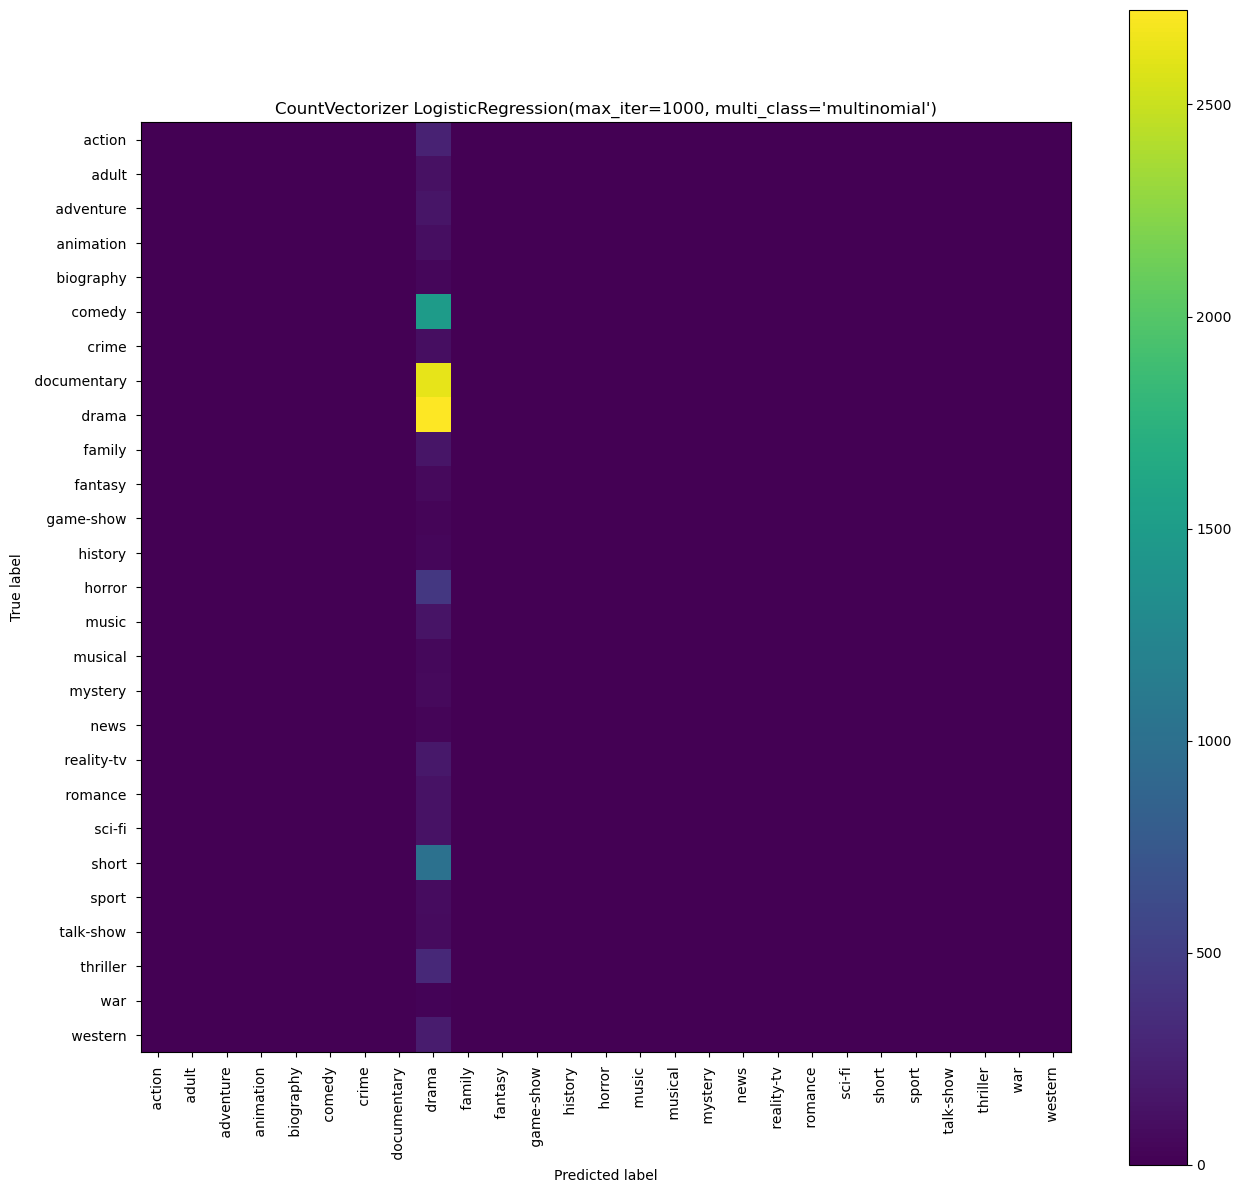

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

voc_size=[500,1000,1500,2000]
classifiers=[MultinomialNB(), LogisticRegression(max_iter=1000, multi_class='ovr'),
             LogisticRegression(max_iter=1000, multi_class='multinomial')]
models=[]
for vsize in voc_size:
    gen_voc=voc_generator(vsize)
    vectorizer=CountVectorizer(vocabulary=gen_voc)
    for clf in classifiers:
        print("voc. size: "+str(vsize))
        models.append(model_generator(X_train, y_train, X_test, y_test, vectorizer, clf))